# Projeto 2 - Ciência dos Dados

### Por: Felipe Queiroz, Leonardo Teixeira e Gustavo Germanos

### Introdução

No mundo contemporâneo, em meio à guerras, discussões políticas e manifestações ideológicas, muito têm se discutido sobre a produção e comercialização de combustíveis ao redor de todo mundo. Diante esse contexto delicado, junto à uma grande diferença socio-espacial no Brasil, têm se observado nos últimos tempos uma grande variação e volatilidade no preço de venda dos combustíveis nos últimos tempos. 

Diante disso, o grupo escolheu criar modelos preditivos que, baseados em diferentes fatores (espaciais, técnicos, tem,porais etc.), permitem uma previsão numérica do preço de venda de determinado combustível. Sendo assim, a pergunta que norteou o grupo ao longo do projeto foi: 

*Considerando a venda de combustível em determinado posto, qual o preço ideal de venda a partir de características espaciais, ténicas e temporais?*

#### Importando Bibliotecas

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Queiroz\OneDrive\Insper\Insper\2o Semestre


#### Base de Dados e Features

Tendo em mente a pergunta a ser respondida pelo projeto, os dados utilizados para realizar a análise foram obtidos no site oficial do Ministério de Minas e Energia. Dentre os diferentes intervalos temporais disponibilizados, o grupo escolheu trabalhar com aquele mais recente (1° semestre de 2023), com isso, seria possível atingir resultados mais atuais.

A tabela com todo o conjunto de dados está importada abaixo. Ao todo, foram 431.575 registros referentes à venda de combustíveis em todo o Brasil, que serão utilizados para realizar a análise de dados.

In [4]:
dados = pd.read_csv('Projeto2.csv', sep = ';', encoding = "latin1")

In [5]:
dados = dados.loc[0:431575]
dados

Regiao - Sigla Estado - Sigla  Municipio  \
0                  SE             SP   SOROCABA   
1                  SE             SP   SOROCABA   
2                  SE             SP   SOROCABA   
3                  NE             AL  ARAPIRACA   
4                  NE             AL  ARAPIRACA   
...               ...            ...        ...   
431571              S             RS    LAJEADO   
431572              S             RS    LAJEADO   
431573              S             RS    LAJEADO   
431574              S             RS    LAJEADO   
431575              S             RS    LAJEADO   

                                                  Revenda  \
0       COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   
1       COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   
2       COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...   
3       COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...   
4       COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...   
...                                                   ...   
431571                            SIM REDE DE POSTOS LTDA   
431572                            SIM REDE DE POSTOS LTDA   
431573                            SIM REDE DE POSTOS LTDA   
431574                            SIM REDE DE POSTOS LTDA   
431575                            SIM REDE DE POSTOS LTDA   

            CNPJ da Revenda                Nome da Rua Numero Rua Complemento  \
0        00.003.188/0001-21     RUA HUMBERTO DE CAMPOS        306         NaN   
1        00.003.188/0001-21     RUA HUMBERTO DE CAMPOS        306         NaN   
2        00.003.188/0001-21     RUA HUMBERTO DE CAMPOS        306         NaN   
3        02.817.655/0001-82     RODOVIA AL 220 - KM 06        S/N         NaN   
4        02.817.655/0001-82     RODOVIA AL 220 - KM 06        S/N         NaN   
...                     ...                        ...        ...         ...   
431571   07.473.735/0187-14            RODOVIA ERS-130       2285  KM    72.8   
431572   07.473.735/0188-03  AVENIDA BENJAMIN CONSTANT       2324         NaN   
431573   07.473.735/0188-03  AVENIDA BENJAMIN CONSTANT       2324         NaN   
431574   07.473.735/0188-03  AVENIDA BENJAMIN CONSTANT       2324         NaN   
431575   07.473.735/0188-03  AVENIDA BENJAMIN CONSTANT       2324         NaN   

                Bairro        Cep             Produto Data da Coleta  \
0       JARDIM ZULMIRA  18061-000              ETANOL     03/01/2023   
1       JARDIM ZULMIRA  18061-000          DIESEL S10     03/01/2023   
2       JARDIM ZULMIRA  18061-000            GASOLINA     03/01/2023   
3             PLANALTO  57308-000              ETANOL     02/01/2023   
4             PLANALTO  57308-000              DIESEL     02/01/2023   
...                ...        ...                 ...            ...   
431571     SANTO ANDRE  95912-000                 GNV     26/06/2023   
431572       FLORESTAL  95900-702              ETANOL     26/06/2023   
431573       FLORESTAL  95900-702          DIESEL S10     26/06/2023   
431574       FLORESTAL  95900-702  GASOLINA ADITIVADA     26/06/2023   
431575       FLORESTAL  95900-702            GASOLINA     26/06/2023   

       Valor de Venda  Valor de Compra Unidade de Medida       Bandeira  
0                3,39              NaN        R$ / litro         BRANCA  
1                6,21              NaN        R$ / litro         BRANCA  
2                4,39              NaN        R$ / litro         BRANCA  
3                3,89              NaN        R$ / litro  VIBRA ENERGIA  
4                6,49              NaN        R$ / litro  VIBRA ENERGIA  
...               ...              ...               ...            ...  
431571           5,79              NaN           R$ / m³        CHARRUA  
431572           4,68              NaN        R$ / litro        CHARRUA  
431573           4,68              NaN        R$ / litro        CHARRUA  
431574           5,39              NaN        R$ / litro        CHARRUA  
431575   

Tendo a base de dados selecionada, foi necessário escolher quais seriam a *target* e *features* utilizadas para realizar a análise e previsões esperadas. Em relação à *target* - ou seja, a variável principal -, o grupo identificou a coluna "Valor de Venda", que diz a respeito, justamente, do valor de comercialização do combustível. Por outro lado, em relação às features, os tipos de dado escolhidos foram: região ("Regiao - Sigla"), estado ("Estado - Sigla"), município ("Muncipio"), bairro ("Bairro"), tipo de combustível ("Produto"), data ("Data da Coleta") e bandeira da revenda ("Bandeira").

Tendo em vista as *features* escolhidas, seria possível realizar uma análise abrangente do preço de venda. Não apenas foram considerados aspectos espaciais (região, estado, município e bairro) - afinal, dentro de uma mesma cidade, os preços podem variar -, mas também, técnicos (tipo de combustível e bandeira) e temporais ("Data da Coleta").

### Minerando Dados e Características do Dataset

In [6]:
#Transformar "," em "."

dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.')

dados["Valor de Venda"].head(3)

0    3.39
1    6.21
2    4.39
Name: Valor de Venda, dtype: object

In [7]:
# Conversão de "Valor de Venda" para FLoat

dados["Valor de Venda"] = dados["Valor de Venda"].astype(float)

#### Relação Target e Produto

In [29]:
produtos = dados["Produto"]

lista_produtos = []

for produto in produtos:
    
    if produto not in lista_produtos:
        
        lista_produtos.append(produto)

ETANOL
count    95201.000000
mean         4.098658
std          0.447121
min          2.970000
25%          3.790000
50%          3.990000
75%          4.390000
max          6.960000
Name: Valor de Venda, dtype: float64


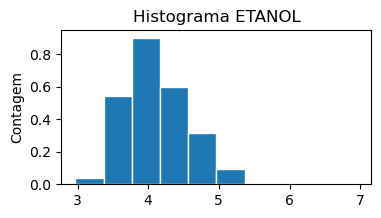


DIESEL S10
count    80240.000000
mean         5.817667
std          0.606709
min          4.390000
25%          5.390000
50%          5.820000
75%          6.190000
max          9.000000
Name: Valor de Venda, dtype: float64


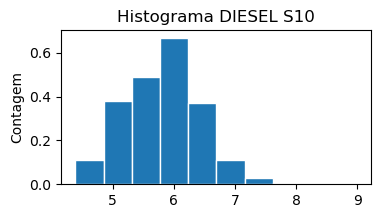


GASOLINA
count    110824.000000
mean          5.335161
std           0.395340
min           4.090000
25%           4.990000
50%           5.290000
75%           5.590000
max           8.190000
Name: Valor de Venda, dtype: float64


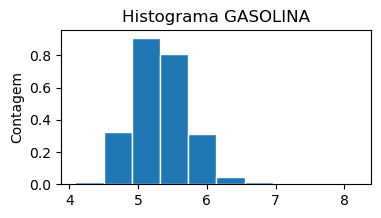


DIESEL
count    50059.000000
mean         5.718585
std          0.589107
min          3.970000
25%          5.290000
50%          5.690000
75%          6.090000
max          7.990000
Name: Valor de Venda, dtype: float64


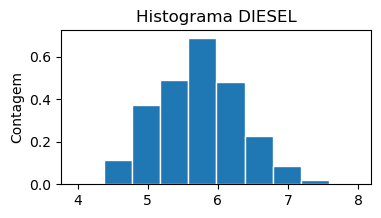


GASOLINA ADITIVADA
count    86201.000000
mean         5.517813
std          0.406781
min          3.470000
25%          5.240000
50%          5.490000
75%          5.790000
max          8.970000
Name: Valor de Venda, dtype: float64


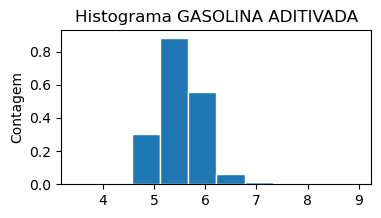


GNV
count    9051.000000
mean        4.682485
std         0.587187
min         3.090000
25%         4.290000
50%         4.650000
75%         4.990000
max         6.710000
Name: Valor de Venda, dtype: float64


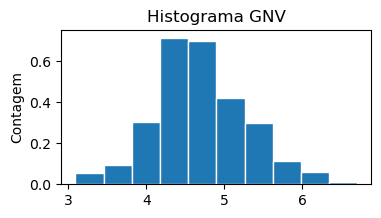

In [31]:
for produto in lista_produtos:
    
    print(produto)
    
    # Identifica a bandeira e realiza um describe da mesma
    
    infos_produtos = dados.loc[dados["Produto"] == produto]
    
    print(infos_produtos["Valor de Venda"].describe())
    
    # Cria um Histograma dos Preços 
    
    plt.figure(figsize=(4, 2))
    
    plt.hist(infos_produtos["Valor de Venda"], edgecolor='white', density = True)
    plt.title(f"Histograma {produto}")
    plt.ylabel("Contagem")
    plt.show()
    
    print()

#### Relção Target e Bandeira

In [26]:
bandeiras = dados["Bandeira"]

lista_bandeiras = []

for bandeira in bandeiras:
    
    if bandeira not in lista_bandeiras:
        
        lista_bandeiras.append(bandeira)

BRANCA
count    144415.000000
mean          5.098157
std           0.789226
min           2.970000
25%           4.690000
50%           5.190000
75%           5.630000
max           8.970000
Name: Valor de Venda, dtype: float64


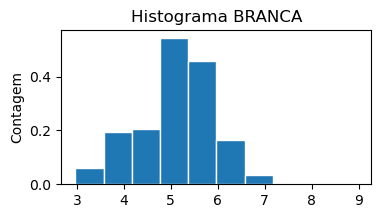


VIBRA ENERGIA
count    91748.000000
mean         5.298505
std          0.788300
min          2.990000
25%          4.890000
50%          5.390000
75%          5.790000
max          8.990000
Name: Valor de Venda, dtype: float64


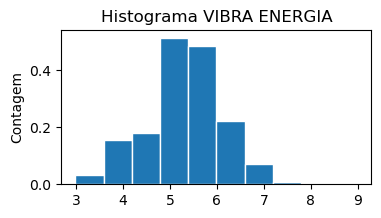


IPIRANGA
count    97415.000000
mean         5.299912
std          0.803585
min          2.990000
25%          4.890000
50%          5.390000
75%          5.790000
max          9.000000
Name: Valor de Venda, dtype: float64


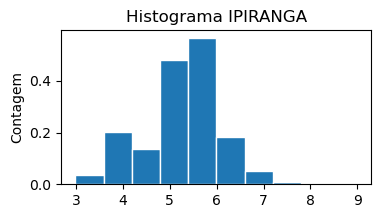


RAIZEN
count    59560.000000
mean         5.187466
std          0.790947
min          3.090000
25%          4.770000
50%          5.300000
75%          5.720000
max          8.190000
Name: Valor de Venda, dtype: float64


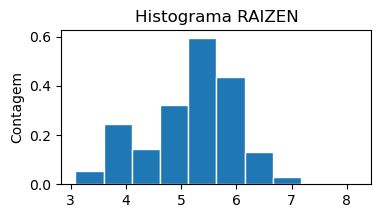


ALESAT
count    16831.000000
mean         5.244640
std          0.781257
min          3.090000
25%          4.790000
50%          5.360000
75%          5.790000
max          7.890000
Name: Valor de Venda, dtype: float64


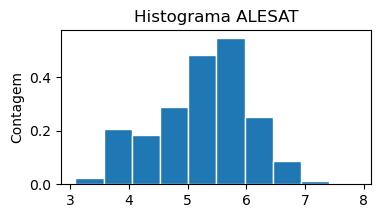


ATLÂNTICA
count    686.000000
mean       5.404869
std        0.516765
min        3.890000
25%        5.050000
50%        5.390000
75%        5.690000
max        6.790000
Name: Valor de Venda, dtype: float64


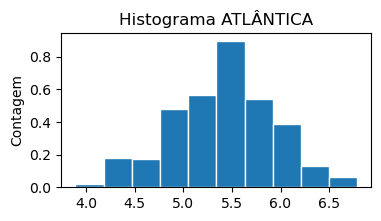


SABBÁ
count    4068.000000
mean        5.570760
std         0.683428
min         3.740000
25%         5.090000
50%         5.580000
75%         6.050000
max         7.750000
Name: Valor de Venda, dtype: float64


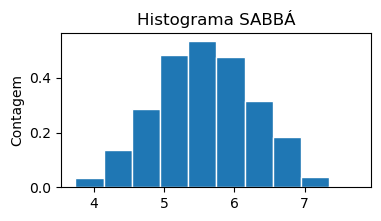


CIAPETRO
count    593.000000
mean       5.100472
std        0.789701
min        3.380000
25%        4.550000
50%        5.290000
75%        5.670000
max        6.790000
Name: Valor de Venda, dtype: float64


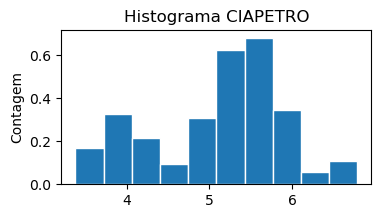


TAURUS
count    1066.000000
mean        5.161773
std         0.846893
min         3.310000
25%         4.690000
50%         5.190000
75%         5.770000
max         7.220000
Name: Valor de Venda, dtype: float64


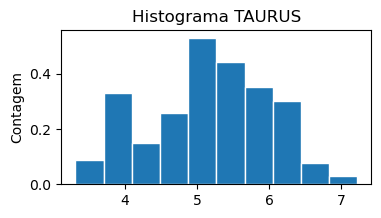


DISLUB
count    877.000000
mean       5.186374
std        0.809997
min        3.150000
25%        4.680000
50%        5.290000
75%        5.680000
max        7.550000
Name: Valor de Venda, dtype: float64


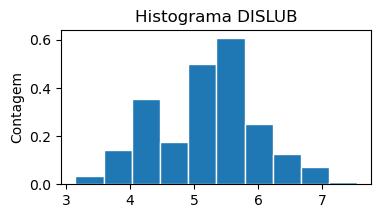


TDC DISTRIBUIDORA
count    308.000000
mean       4.959026
std        0.677342
min        3.150000
25%        4.290000
50%        4.990000
75%        5.390000
max        6.990000
Name: Valor de Venda, dtype: float64


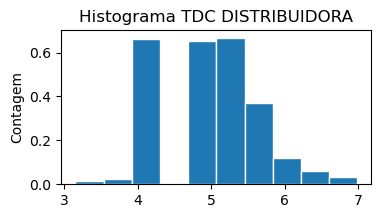


SETTA DISTRIBUIDORA
count    45.000000
mean      4.815778
std       0.611431
min       3.890000
25%       4.150000
50%       4.960000
75%       5.290000
max       6.150000
Name: Valor de Venda, dtype: float64


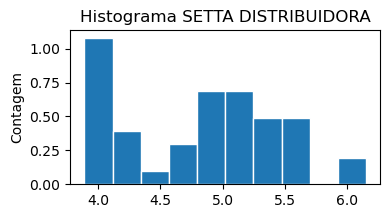


RODOIL
count    1275.000000
mean        5.464722
std         0.525649
min         3.690000
25%         5.170000
50%         5.490000
75%         5.790000
max         6.750000
Name: Valor de Venda, dtype: float64


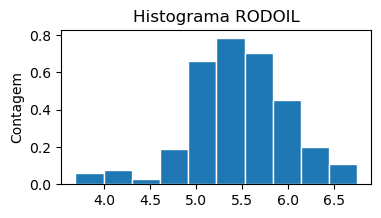


CHARRUA
count    976.000000
mean       5.409447
std        0.437480
min        4.160000
25%        5.080000
50%        5.440000
75%        5.740000
max        6.590000
Name: Valor de Venda, dtype: float64


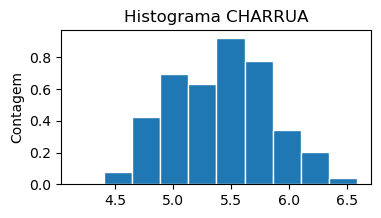


RAIZEN MIME
count    1639.000000
mean        5.525546
std         0.527068
min         4.280000
25%         5.170000
50%         5.540000
75%         5.820000
max         7.590000
Name: Valor de Venda, dtype: float64


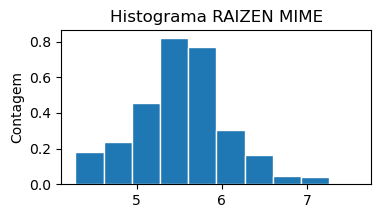


REJAILE
count    21.000000
mean      5.547619
std       0.219543
min       5.180000
25%       5.370000
50%       5.540000
75%       5.770000
max       5.770000
Name: Valor de Venda, dtype: float64


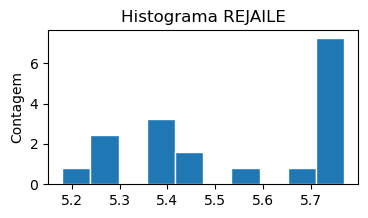


IDAZA
count    315.000000
mean       5.294984
std        0.711404
min        3.470000
25%        5.085000
50%        5.330000
75%        5.680000
max        6.990000
Name: Valor de Venda, dtype: float64


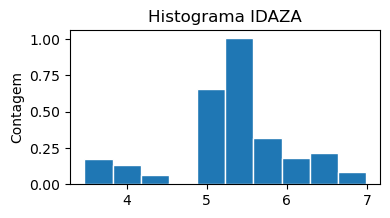


D`MAIS
count    240.000000
mean       4.977292
std        0.762379
min        3.490000
25%        4.830000
50%        5.050000
75%        5.490000
max        6.190000
Name: Valor de Venda, dtype: float64


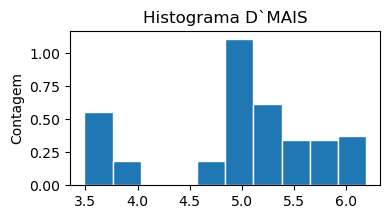


TOTALENERGIES
count    677.000000
mean       5.012216
std        0.789177
min        3.290000
25%        4.280000
50%        5.180000
75%        5.550000
max        6.780000
Name: Valor de Venda, dtype: float64


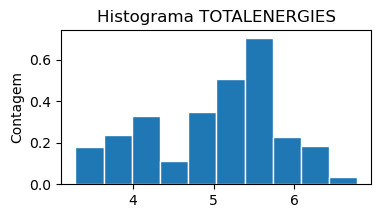


PETROBRASIL
count    83.000000
mean      4.704337
std       0.854565
min       3.190000
25%       3.690000
50%       4.890000
75%       5.360000
max       6.290000
Name: Valor de Venda, dtype: float64


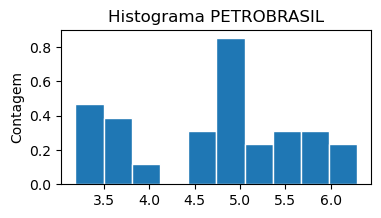


EQUADOR
count    773.000000
mean       5.996507
std        0.761401
min        3.990000
25%        5.480000
50%        5.990000
75%        6.590000
max        7.490000
Name: Valor de Venda, dtype: float64


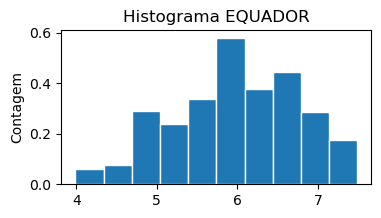


ATEM' S
count    1885.000000
mean        5.697395
std         0.898308
min         3.590000
25%         4.990000
50%         5.990000
75%         6.470000
max         7.990000
Name: Valor de Venda, dtype: float64


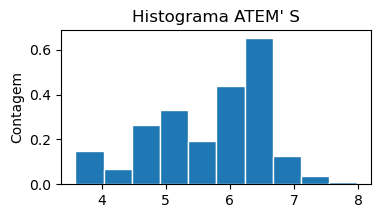


SP
count    864.000000
mean       5.526748
std        0.636717
min        4.190000
25%        4.990000
50%        5.590000
75%        5.950000
max        7.290000
Name: Valor de Venda, dtype: float64


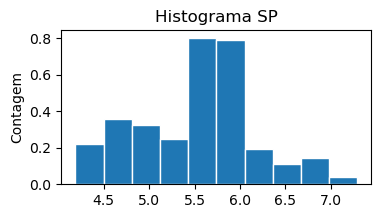


FAN
count    310.000000
mean       5.319194
std        0.723675
min        3.980000
25%        4.860000
50%        5.390000
75%        5.990000
max        6.720000
Name: Valor de Venda, dtype: float64


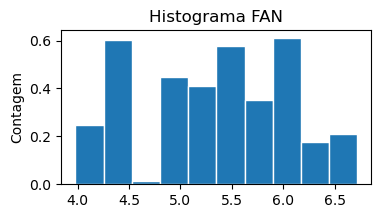


STANG
count    1124.000000
mean        5.087135
std         0.606418
min         3.480000
25%         4.710000
50%         5.200000
75%         5.490000
max         6.490000
Name: Valor de Venda, dtype: float64


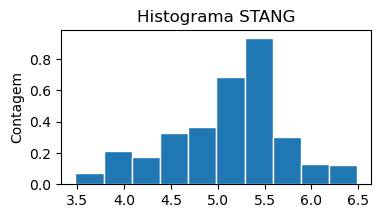


MAXSUL
count    507.000000
mean       5.375858
std        0.503571
min        3.490000
25%        5.090000
50%        5.400000
75%        5.660000
max        6.590000
Name: Valor de Venda, dtype: float64


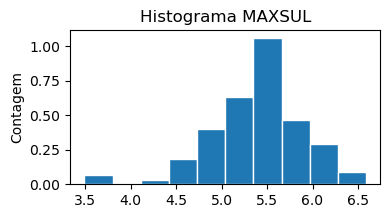


POTENCIAL
count    657.000000
mean       5.433318
std        0.759656
min        3.790000
25%        4.990000
50%        5.490000
75%        5.890000
max        7.500000
Name: Valor de Venda, dtype: float64


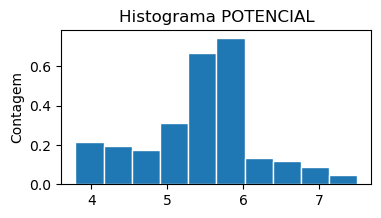


DIBRAPE
count    62.000000
mean      5.351774
std       0.346630
min       4.690000
25%       5.070000
50%       5.315000
75%       5.582500
max       6.040000
Name: Valor de Venda, dtype: float64


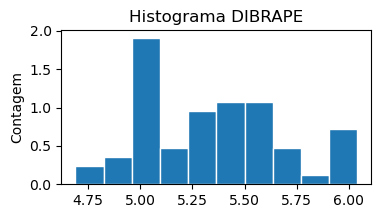


MASUT DISTRIBUIDORA
count    347.000000
mean       5.131239
std        0.789994
min        3.490000
25%        4.790000
50%        5.190000
75%        5.750000
max        6.580000
Name: Valor de Venda, dtype: float64


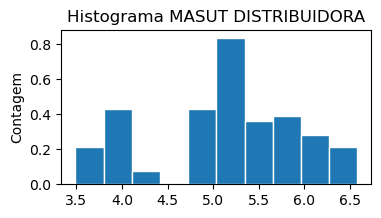


ON PETRO
count    28.000000
mean      5.227500
std       0.634009
min       4.090000
25%       4.792500
50%       5.345000
75%       5.690000
max       6.270000
Name: Valor de Venda, dtype: float64


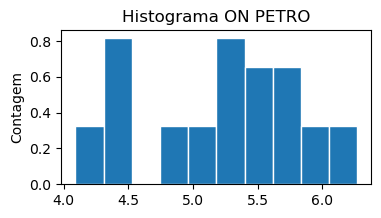


AMERICANOIL
count    50.000000
mean      5.371600
std       0.290351
min       4.590000
25%       5.290000
50%       5.340000
75%       5.565000
max       5.990000
Name: Valor de Venda, dtype: float64


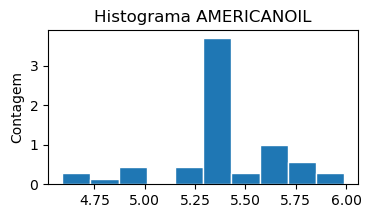


RIO BRANCO
count    299.000000
mean       5.144849
std        0.782351
min        3.470000
25%        4.430000
50%        5.290000
75%        5.690000
max        6.790000
Name: Valor de Venda, dtype: float64


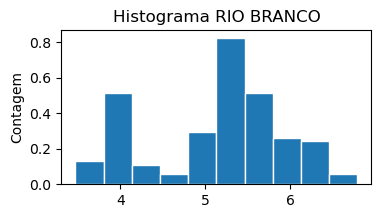


PELIKANO
count    114.000000
mean       5.193421
std        0.621058
min        3.910000
25%        4.690000
50%        5.370000
75%        5.745000
max        6.170000
Name: Valor de Venda, dtype: float64


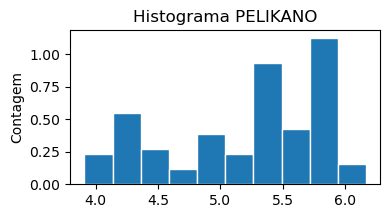


PETROX DISTRIBUIDORA
count    518.000000
mean       5.135328
std        0.679034
min        3.990000
25%        4.515000
50%        5.190000
75%        5.590000
max        6.590000
Name: Valor de Venda, dtype: float64


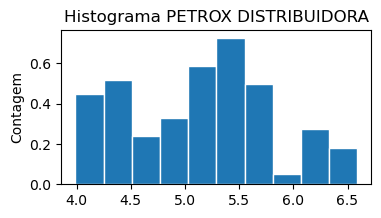


SIMARELLI
count    155.000000
mean       5.424194
std        0.923069
min        3.550000
25%        4.875000
50%        5.590000
75%        6.030000
max        7.290000
Name: Valor de Venda, dtype: float64


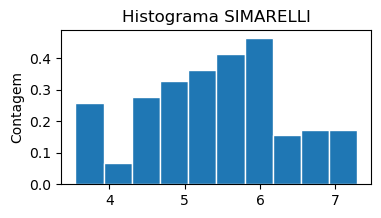


ROYAL FIC
count    64.000000
mean      5.099531
std       0.910509
min       3.490000
25%       4.760000
50%       5.080000
75%       5.990000
max       6.690000
Name: Valor de Venda, dtype: float64


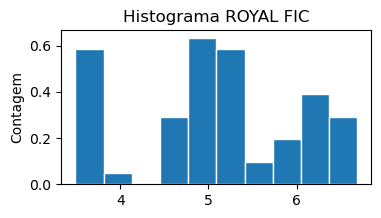


UNI
count    73.000000
mean      5.088767
std       0.621472
min       4.070000
25%       4.350000
50%       5.320000
75%       5.640000
max       5.820000
Name: Valor de Venda, dtype: float64


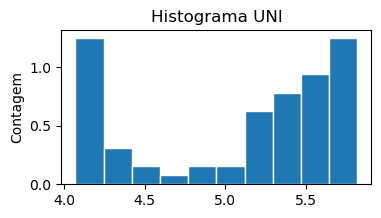


PETROBAHIA
count    331.000000
mean       5.169789
std        0.693748
min        3.890000
25%        4.660000
50%        5.190000
75%        5.690000
max        6.590000
Name: Valor de Venda, dtype: float64


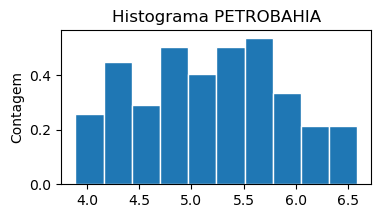


LARCO
count    188.000000
mean       5.081330
std        0.608779
min        3.870000
25%        4.630000
50%        5.190000
75%        5.540000
max        6.470000
Name: Valor de Venda, dtype: float64


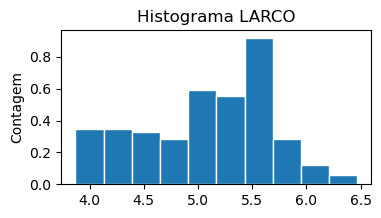


SUL COMBUSTÍVEIS
count    87.000000
mean      5.477931
std       0.477450
min       4.590000
25%       5.190000
50%       5.440000
75%       5.890000
max       6.490000
Name: Valor de Venda, dtype: float64


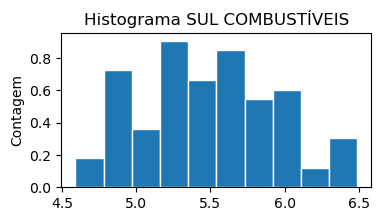


FEDERAL ENERGIA
count    74.000000
mean      4.861486
std       0.617954
min       3.890000
25%       4.190000
50%       5.035000
75%       5.190000
max       6.190000
Name: Valor de Venda, dtype: float64


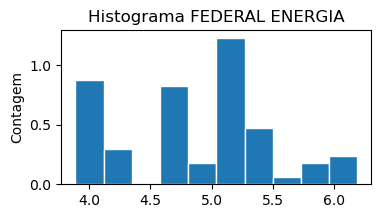


ESTRADA
count    70.000000
mean      5.213143
std       0.718569
min       3.840000
25%       5.030000
50%       5.365000
75%       5.640000
max       6.440000
Name: Valor de Venda, dtype: float64


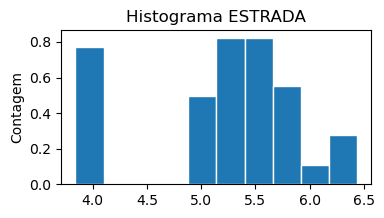


TEMAPE
count    51.000000
mean      5.334118
std       0.523898
min       4.190000
25%       5.175000
50%       5.300000
75%       5.520000
max       6.540000
Name: Valor de Venda, dtype: float64


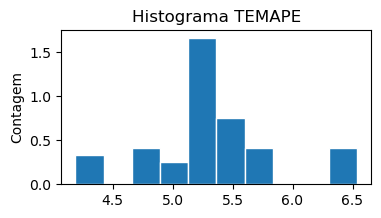


WALENDOWSKY
count    53.000000
mean      5.508679
std       0.548631
min       4.290000
25%       5.490000
50%       5.750000
75%       5.800000
max       6.520000
Name: Valor de Venda, dtype: float64


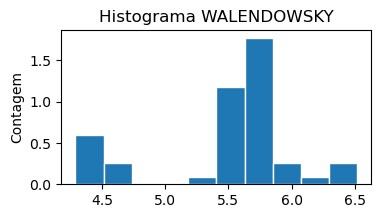


TORRAO
count    4.000000
mean     4.745000
std      0.829156
min      3.570000
25%      4.582500
50%      4.945000
75%      5.107500
max      5.520000
Name: Valor de Venda, dtype: float64


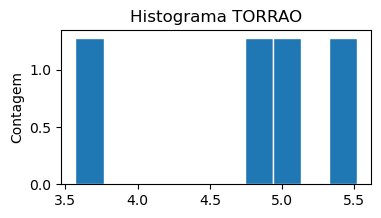


AIR BP
count    50.000000
mean      5.548800
std       0.495501
min       4.650000
25%       5.250000
50%       5.690000
75%       5.980000
max       6.230000
Name: Valor de Venda, dtype: float64


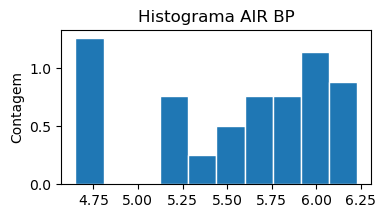

In [27]:
for bandeira in lista_bandeiras:
    
    print(bandeira)
    
    # Identifica a bandeira e realiza um describe da mesma
    
    infos_bandeira = dados.loc[dados["Bandeira"] == bandeira]
    
    print(infos_bandeira["Valor de Venda"].describe())
    
    # Cria um Histograma dos Preços 
    
    plt.figure(figsize=(4, 2))
    
    plt.hist(infos_bandeira["Valor de Venda"], edgecolor='white', density = True)
    plt.title(f"Histograma {bandeira}")
    plt.ylabel("Contagem")
    plt.show()
    
    print()

#### Relação Target e Região

In [10]:
# Cria uma lista com todas as regiões do Brasil, sem repetir

regioes = dados["Regiao - Sigla"]

lista_regioes = []

for regiao in regioes:
    
    if regiao not in lista_regioes:
        
        lista_regioes.append(regiao)

SE

count    211180.000000
mean          5.084759
std           0.828138
min           2.970000
25%           4.590000
50%           5.190000
75%           5.650000
max           9.000000
Name: Valor de Venda, dtype: float64


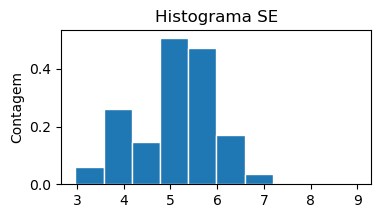

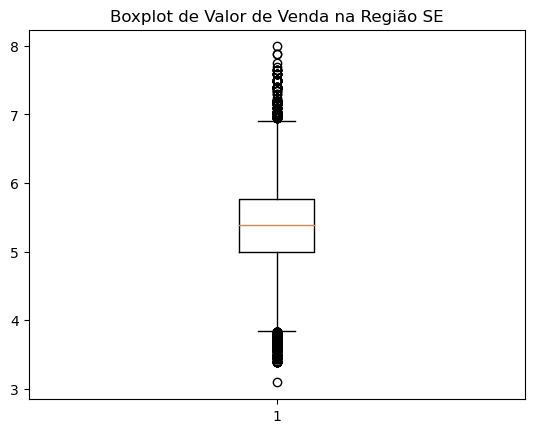


NE

count    81944.000000
mean         5.300193
std          0.725137
min          3.090000
25%          4.780000
50%          5.380000
75%          5.790000
max          8.970000
Name: Valor de Venda, dtype: float64


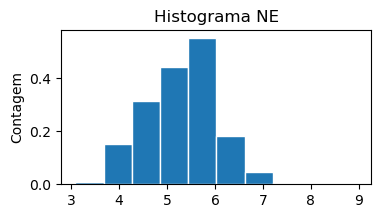

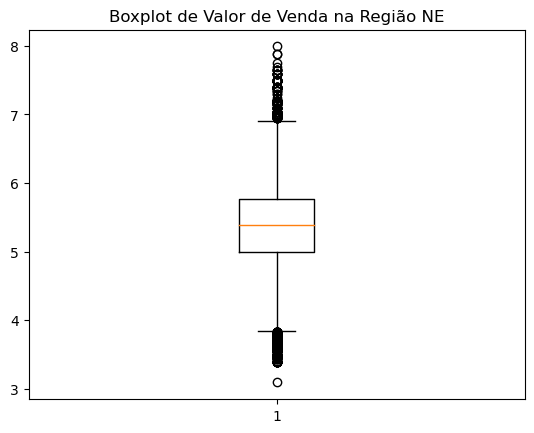


N

count    29262.000000
mean         5.761535
std          0.772120
min          3.590000
25%          5.220000
50%          5.790000
75%          6.290000
max          8.970000
Name: Valor de Venda, dtype: float64


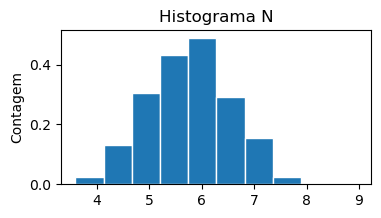

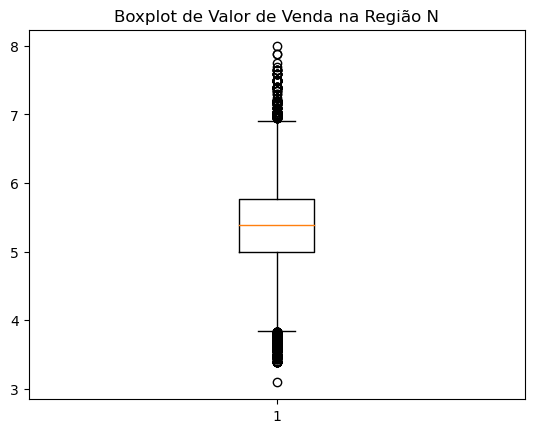


CO

count    32573.000000
mean         5.112000
std          0.855858
min          3.030000
25%          4.570000
50%          5.290000
75%          5.720000
max          8.590000
Name: Valor de Venda, dtype: float64


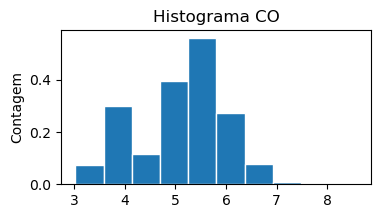

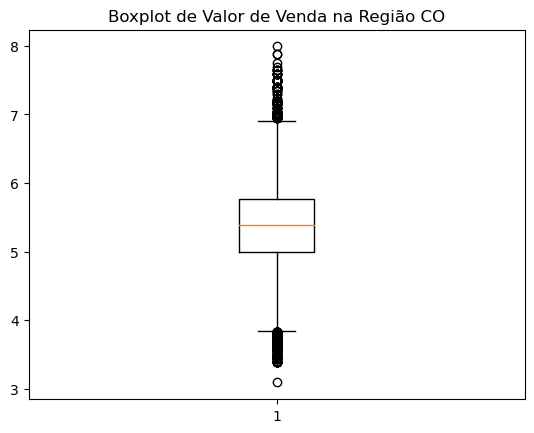


S

count    76617.000000
mean         5.342585
std          0.620152
min          3.090000
25%          4.990000
50%          5.390000
75%          5.760000
max          7.990000
Name: Valor de Venda, dtype: float64


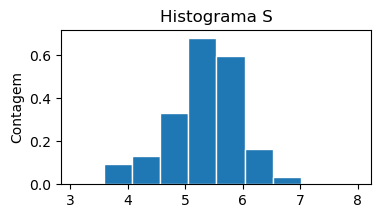

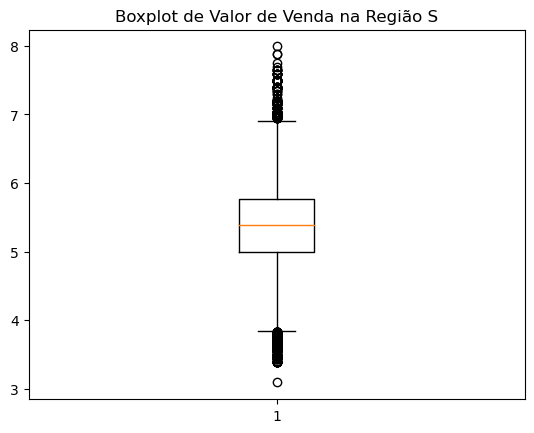

In [19]:
for regiao in lista_regioes:
    
    print(regiao)
    
    print()
    
    # Identifica a região e realiza um describe da mesma
    
    infos_regioes = dados.loc[dados["Regiao - Sigla"] == regiao]
    
    print(infos_regioes["Valor de Venda"].describe())
    
    # Cria um Histograma dos Preços 
    
    plt.figure(figsize=(4, 2))
    
    plt.hist(infos_regioes["Valor de Venda"], edgecolor='white', density = True)
    plt.title(f"Histograma {regiao}")
    plt.ylabel("Contagem")
    plt.show()
    
    # Cria um Boxplot dos Preço

    plt.boxplot(S_precos)
    plt.title(f'Boxplot de Valor de Venda na Região {regiao}')

    plt.show()
    
    print()

#### Relação Estado e Target

In [22]:
estados = dados["Estado - Sigla"]

lista_estados = []

for estado in estados:
    
    if estado not in lista_estados:
        
        lista_estados.append(estado)

SP
count    120263.000000
mean          5.030813
std           0.884950
min           2.970000
25%           4.390000
50%           5.190000
75%           5.590000
max           9.000000
Name: Valor de Venda, dtype: float64


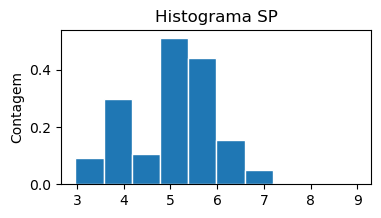


AL
count    5027.000000
mean        5.427275
std         0.849313
min         3.590000
25%         4.790000
50%         5.490000
75%         5.980000
max         7.690000
Name: Valor de Venda, dtype: float64


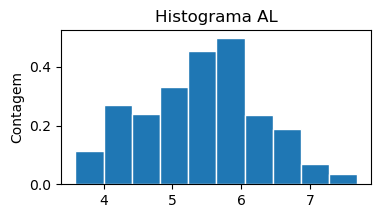


AM
count    5147.000000
mean        5.803995
std         0.945355
min         3.590000
25%         4.990000
50%         5.990000
75%         6.590000
max         8.380000
Name: Valor de Venda, dtype: float64


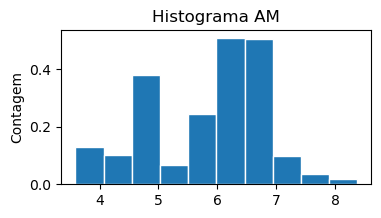


AP
count    1016.000000
mean        5.398996
std         0.651508
min         4.440000
25%         4.980000
50%         5.190000
75%         5.722500
max         7.590000
Name: Valor de Venda, dtype: float64


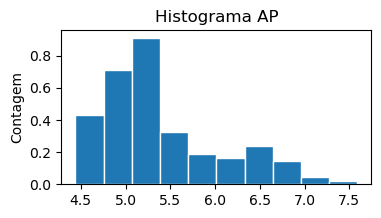


BA
count    20864.000000
mean         5.367338
std          0.710507
min          3.090000
25%          4.780000
50%          5.490000
75%          5.880000
max          8.880000
Name: Valor de Venda, dtype: float64


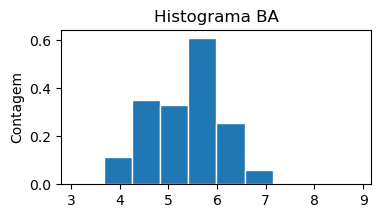


CE
count    13593.000000
mean         5.498722
std          0.663801
min          3.990000
25%          4.890000
50%          5.590000
75%          5.970000
max          7.300000
Name: Valor de Venda, dtype: float64


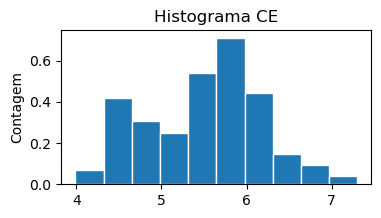


DF
count    4881.000000
mean        5.123833
std         0.783460
min         3.490000
25%         4.530000
50%         5.350000
75%         5.670000
max         8.590000
Name: Valor de Venda, dtype: float64


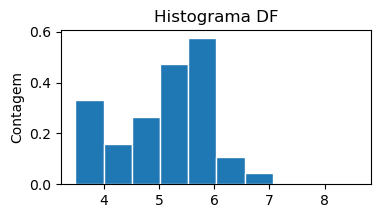


ES
count    9430.000000
mean        5.358779
std         0.573652
min         3.850000
25%         4.990000
50%         5.430000
75%         5.790000
max         7.200000
Name: Valor de Venda, dtype: float64


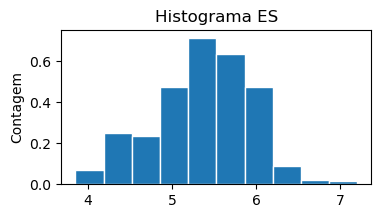


GO
count    15947.000000
mean         5.089130
std          0.813078
min          3.090000
25%          4.350000
50%          5.290000
75%          5.690000
max          8.040000
Name: Valor de Venda, dtype: float64


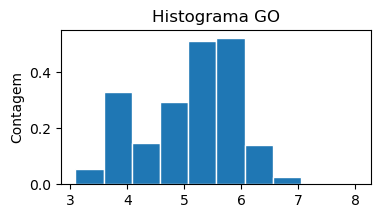


TO
count    4921.000000
mean        5.393465
std         0.580201
min         3.950000
25%         4.990000
50%         5.490000
75%         5.820000
max         8.090000
Name: Valor de Venda, dtype: float64


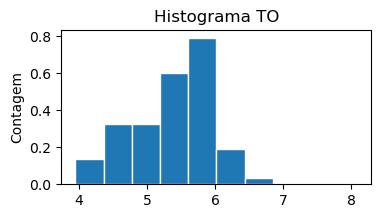


MA
count    8340.000000
mean        5.329886
std         0.570338
min         3.570000
25%         4.890000
50%         5.290000
75%         5.690000
max         8.590000
Name: Valor de Venda, dtype: float64


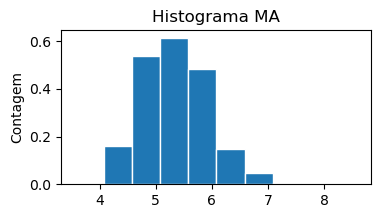


MG
count    46718.000000
mean         5.047682
std          0.799690
min          3.090000
25%          4.340000
50%          5.190000
75%          5.590000
max          8.990000
Name: Valor de Venda, dtype: float64


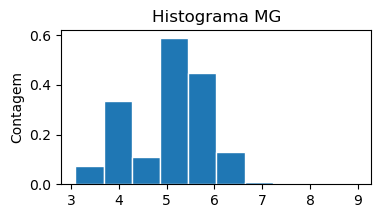


MS
count    5546.000000
mean        5.189409
std         0.853117
min         3.210000
25%         4.700000
50%         5.190000
75%         5.800000
max         7.570000
Name: Valor de Venda, dtype: float64


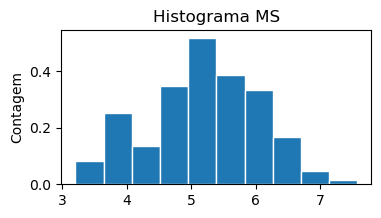


MT
count    6199.000000
mean        5.092265
std         1.003476
min         3.030000
25%         3.990000
50%         5.290000
75%         5.790000
max         7.260000
Name: Valor de Venda, dtype: float64


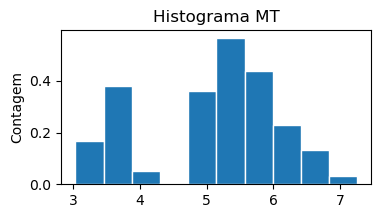


PA
count    9378.000000
mean        5.734566
std         0.737703
min         3.870000
25%         5.190000
50%         5.680000
75%         6.250000
max         8.910000
Name: Valor de Venda, dtype: float64


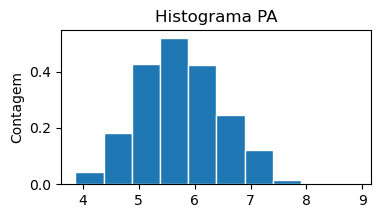


PB
count    5869.000000
mean        5.030963
std         0.762839
min         3.560000
25%         4.320000
50%         5.090000
75%         5.490000
max         6.990000
Name: Valor de Venda, dtype: float64


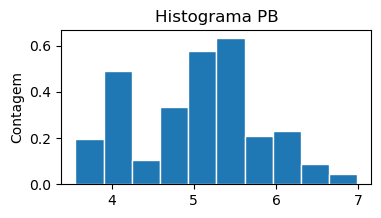


PE
count    14277.000000
mean         5.009178
std          0.714500
min          3.150000
25%          4.300000
50%          5.090000
75%          5.490000
max          6.990000
Name: Valor de Venda, dtype: float64


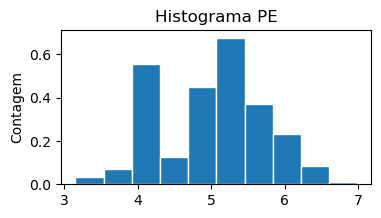


PI
count    5212.000000
mean        5.413891
std         0.712728
min         3.690000
25%         4.990000
50%         5.490000
75%         5.890000
max         7.690000
Name: Valor de Venda, dtype: float64


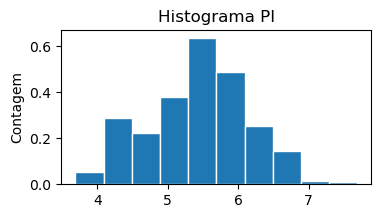


PR
count    28638.000000
mean         5.178327
std          0.745142
min          3.090000
25%          4.690000
50%          5.330000
75%          5.690000
max          7.690000
Name: Valor de Venda, dtype: float64


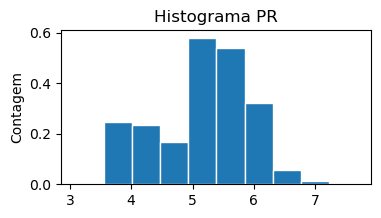


RJ
count    34769.000000
mean         5.246853
std          0.670557
min          3.690000
25%          4.690000
50%          5.290000
75%          5.780000
max          7.890000
Name: Valor de Venda, dtype: float64


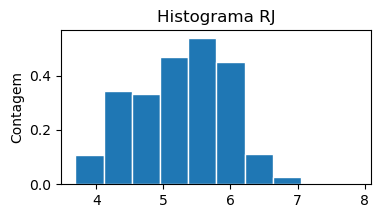


RN
count    5422.000000
mean        5.464399
std         0.742257
min         3.750000
25%         4.880000
50%         5.590000
75%         5.980000
max         8.970000
Name: Valor de Venda, dtype: float64


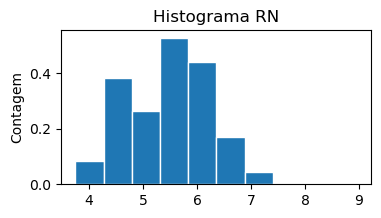


RO
count    5681.000000
mean        5.959011
std         0.666609
min         4.090000
25%         5.500000
50%         5.980000
75%         6.290000
max         8.970000
Name: Valor de Venda, dtype: float64


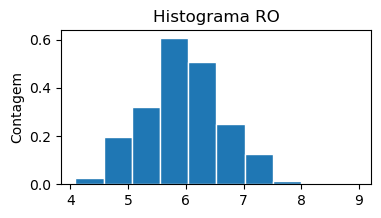


RR
count    1664.000000
mean        6.184297
std         0.672083
min         4.790000
25%         5.690000
50%         6.090000
75%         6.950000
max         7.620000
Name: Valor de Venda, dtype: float64


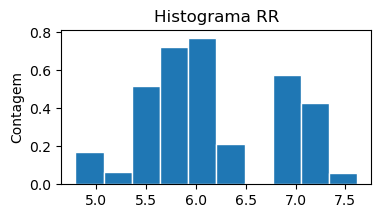


RS
count    30117.000000
mean         5.431602
std          0.494145
min          3.690000
25%          5.090000
50%          5.390000
75%          5.760000
max          7.500000
Name: Valor de Venda, dtype: float64


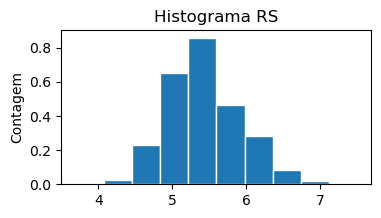


SC
count    17862.000000
mean         5.455850
std          0.527565
min          3.830000
25%          5.140000
50%          5.490000
75%          5.790000
max          7.990000
Name: Valor de Venda, dtype: float64


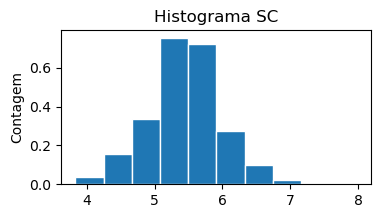


SE
count    3340.000000
mean        5.080449
std         0.590485
min         3.740000
25%         4.660000
50%         5.140000
75%         5.480000
max         6.980000
Name: Valor de Venda, dtype: float64


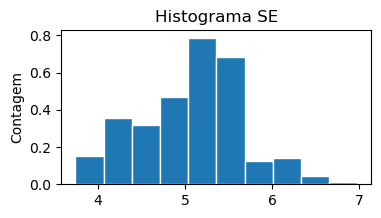


AC
count    1455.000000
mean        6.028660
std         0.804576
min         4.150000
25%         5.490000
50%         5.990000
75%         6.660000
max         7.750000
Name: Valor de Venda, dtype: float64


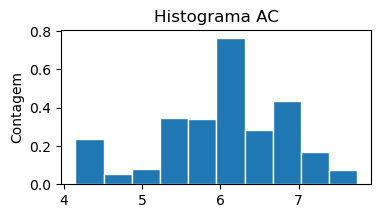

In [23]:
for estado in lista_estados:
    
    print(estado)
    
    # Identifica o estado e realiza um describe da mesma
    
    infos_estados = dados.loc[dados["Estado - Sigla"] == estado]
    
    print(infos_estados["Valor de Venda"].describe())
    
    # Cria um Histograma dos Preços 
    
    plt.figure(figsize=(4, 2))
    
    plt.hist(infos_estados["Valor de Venda"], edgecolor='white', density = True)
    plt.title(f"Histograma {estado}")
    plt.ylabel("Contagem")
    plt.show()
    
    print()

#### Relação Cidades e Target

In [24]:
cidades = dados["Municipio"]

lista_cidades = []

for cidade in cidades:
    
    if cidade not in lista_cidades:
        
        lista_cidades.append(cidade)

SOROCABA
count    1740.000000
mean        4.853983
std         0.908396
min         3.080000
25%         3.890000
50%         4.990000
75%         5.490000
max         7.690000
Name: Valor de Venda, dtype: float64


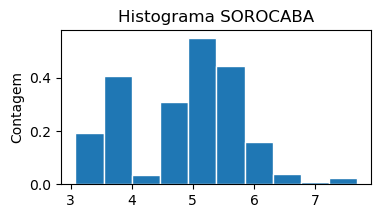


ARAPIRACA
count    1404.000000
mean        5.356959
std         0.771251
min         3.590000
25%         4.627500
50%         5.485000
75%         5.890000
max         7.190000
Name: Valor de Venda, dtype: float64


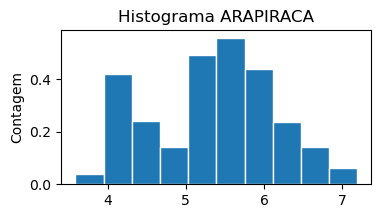


PARINTINS
count    464.000000
mean       6.956832
std        0.655191
min        5.590000
25%        6.790000
50%        6.890000
75%        7.490000
max        8.380000
Name: Valor de Venda, dtype: float64


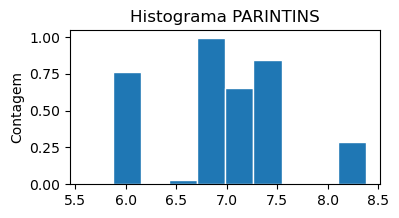


MACAPA
count    820.000000
mean       5.390159
std        0.695783
min        4.440000
25%        4.910000
50%        5.160000
75%        5.790000
max        7.590000
Name: Valor de Venda, dtype: float64


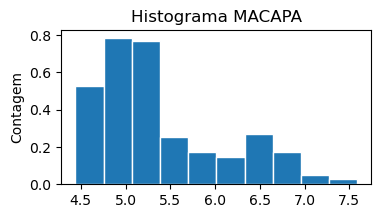


BARREIRAS
count    576.000000
mean       5.419444
std        0.845901
min        3.990000
25%        4.550000
50%        5.590000
75%        5.990000
max        7.150000
Name: Valor de Venda, dtype: float64


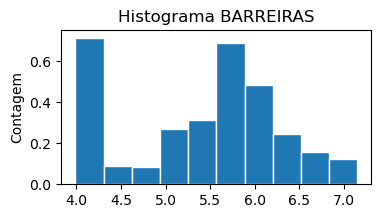


ILHEUS
count    1045.000000
mean        5.452010
std         0.729954
min         3.840000
25%         4.990000
50%         5.570000
75%         5.790000
max         7.200000
Name: Valor de Venda, dtype: float64


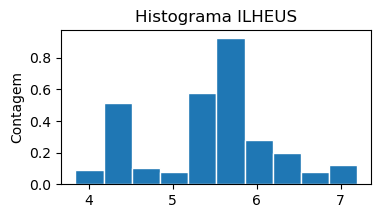


ITABUNA
count    927.000000
mean       5.298177
std        0.684801
min        3.790000
25%        4.790000
50%        5.470000
75%        5.690000
max        7.080000
Name: Valor de Venda, dtype: float64


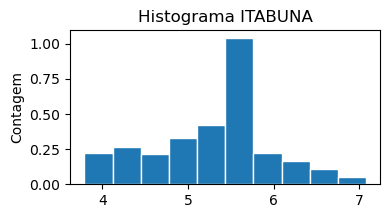


ITAMARAJU
count    393.000000
mean       5.627532
std        0.673821
min        3.940000
25%        4.940000
50%        5.790000
75%        6.110000
max        6.990000
Name: Valor de Venda, dtype: float64


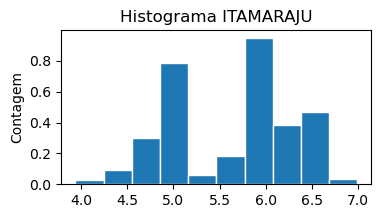


POCOES
count    642.000000
mean       5.293458
std        0.659829
min        4.190000
25%        4.500000
50%        5.490000
75%        5.787500
max        6.890000
Name: Valor de Venda, dtype: float64


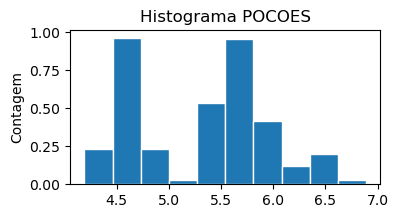


SALVADOR
count    2728.000000
mean        5.226140
std         0.757521
min         3.090000
25%         4.512500
50%         5.370000
75%         5.770000
max         7.990000
Name: Valor de Venda, dtype: float64


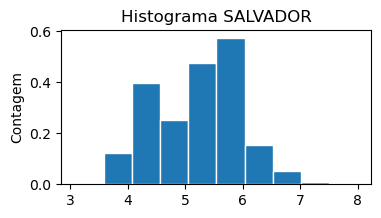


CANINDE
count    472.000000
mean       5.544004
std        0.678403
min        4.550000
25%        4.990000
50%        5.570000
75%        5.890000
max        6.990000
Name: Valor de Venda, dtype: float64


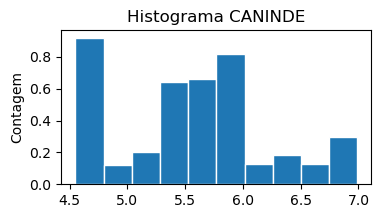


CRATO
count    729.000000
mean       5.501701
std        0.649657
min        3.990000
25%        5.300000
50%        5.590000
75%        5.970000
max        6.890000
Name: Valor de Venda, dtype: float64


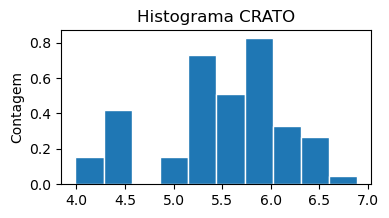


ITAPIPOCA
count    717.000000
mean       5.779930
std        0.708509
min        4.640000
25%        4.980000
50%        5.870000
75%        6.050000
max        7.300000
Name: Valor de Venda, dtype: float64


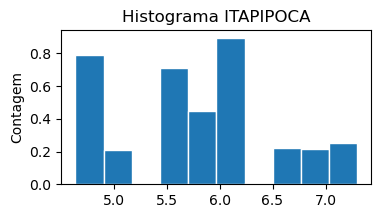


JUAZEIRO DO NORTE
count    564.000000
mean       5.564574
std        0.649857
min        4.190000
25%        5.250000
50%        5.570000
75%        5.950000
max        7.190000
Name: Valor de Venda, dtype: float64


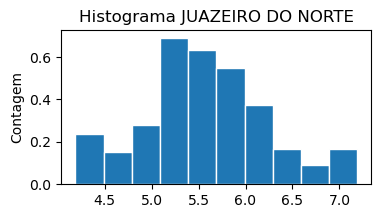


LIMOEIRO DO NORTE
count    1177.000000
mean        5.607298
std         0.670011
min         4.190000
25%         5.190000
50%         5.820000
75%         5.990000
max         6.890000
Name: Valor de Venda, dtype: float64


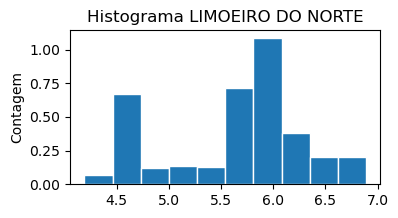


FORTALEZA
count    4500.000000
mean        5.408376
std         0.670086
min         3.990000
25%         4.690000
50%         5.590000
75%         5.890000
max         7.190000
Name: Valor de Venda, dtype: float64


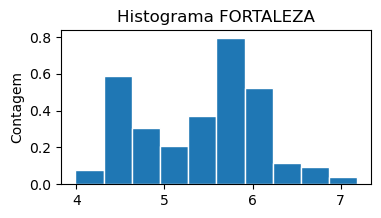


MARACANAU
count    1181.000000
mean        5.341499
std         0.677914
min         4.170000
25%         4.650000
50%         5.570000
75%         5.790000
max         6.990000
Name: Valor de Venda, dtype: float64


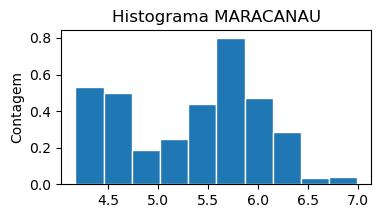


SOBRAL
count    1170.000000
mean        5.686291
std         0.640291
min         4.390000
25%         5.190000
50%         5.680000
75%         6.090000
max         7.090000
Name: Valor de Venda, dtype: float64


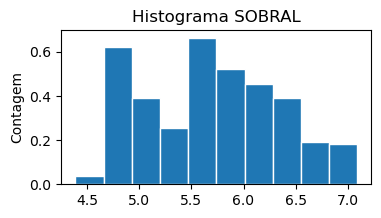


BRASILIA
count    4881.000000
mean        5.123833
std         0.783460
min         3.490000
25%         4.530000
50%         5.350000
75%         5.670000
max         8.590000
Name: Valor de Venda, dtype: float64


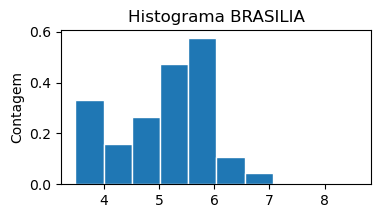


GUARAPARI
count    683.000000
mean       5.571391
std        0.543095
min        4.290000
25%        5.290000
50%        5.690000
75%        5.970000
max        6.690000
Name: Valor de Venda, dtype: float64


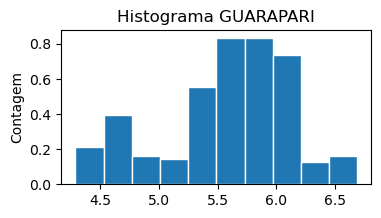


LINHARES
count    983.000000
mean       5.491851
std        0.556083
min        4.090000
25%        5.190000
50%        5.590000
75%        5.990000
max        6.390000
Name: Valor de Venda, dtype: float64


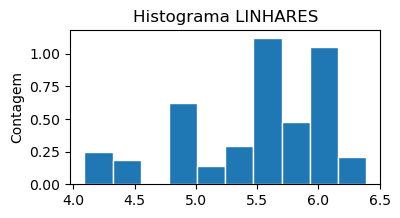


VILA VELHA
count    1609.000000
mean        5.243201
std         0.566499
min         3.850000
25%         4.890000
50%         5.300000
75%         5.590000
max         7.200000
Name: Valor de Venda, dtype: float64


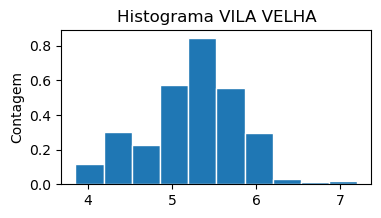


VITORIA
count    1143.000000
mean        5.249204
std         0.641464
min         3.890000
25%         4.890000
50%         5.280000
75%         5.550000
max         6.990000
Name: Valor de Venda, dtype: float64


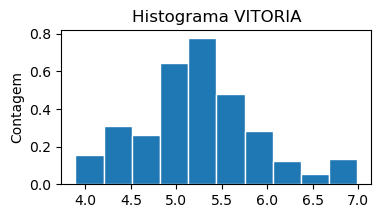


ANAPOLIS
count    1695.000000
mean        4.987658
std         0.812208
min         3.250000
25%         4.590000
50%         5.090000
75%         5.490000
max         6.990000
Name: Valor de Venda, dtype: float64


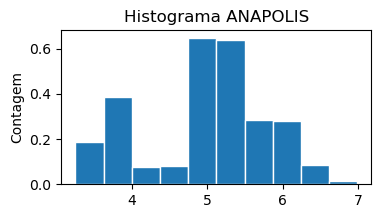


ARAGUAINA
count    1072.000000
mean        5.351007
std         0.561319
min         3.950000
25%         4.990000
50%         5.470000
75%         5.790000
max         6.670000
Name: Valor de Venda, dtype: float64


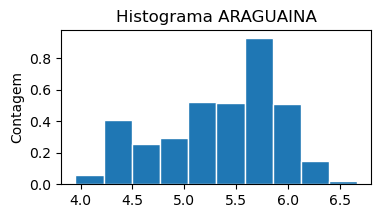


CATALAO
count    815.000000
mean       5.014528
std        0.780827
min        3.390000
25%        4.115000
50%        5.190000
75%        5.490000
max        6.490000
Name: Valor de Venda, dtype: float64


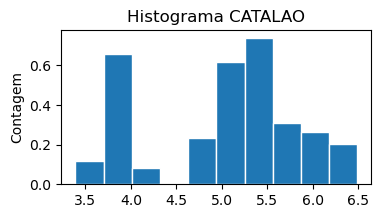


ITUMBIARA
count    987.000000
mean       4.933191
std        0.826601
min        3.170000
25%        4.190000
50%        5.070000
75%        5.490000
max        6.530000
Name: Valor de Venda, dtype: float64


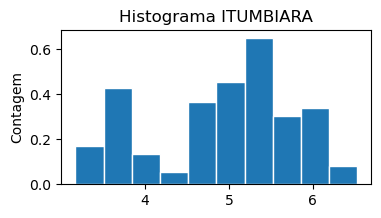


PARAISO DO TOCANTINS
count    804.000000
mean       5.385585
std        0.528869
min        4.190000
25%        4.990000
50%        5.490000
75%        5.790000
max        8.090000
Name: Valor de Venda, dtype: float64


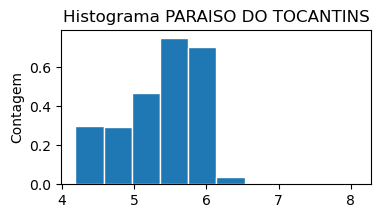


RIO VERDE
count    884.000000
mean       4.923009
std        0.831070
min        3.390000
25%        3.990000
50%        5.090000
75%        5.450000
max        6.690000
Name: Valor de Venda, dtype: float64


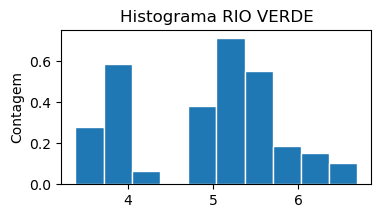


TRINDADE
count    286.000000
mean       5.090280
std        0.796259
min        3.350000
25%        4.240000
50%        5.365000
75%        5.700000
max        6.290000
Name: Valor de Venda, dtype: float64


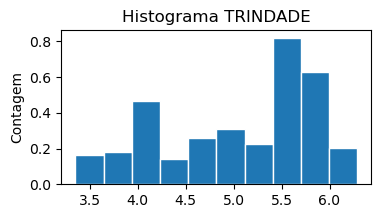


CODO
count    642.000000
mean       5.607399
std        0.608096
min        4.650000
25%        5.200000
50%        5.590000
75%        5.897500
max        6.990000
Name: Valor de Venda, dtype: float64


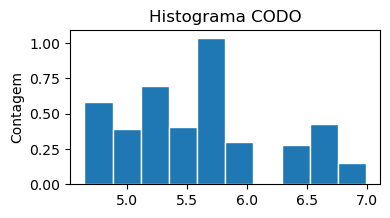


SAO LUIS
count    1811.000000
mean        5.128929
std         0.560244
min         4.180000
25%         4.690000
50%         5.060000
75%         5.490000
max         8.590000
Name: Valor de Venda, dtype: float64


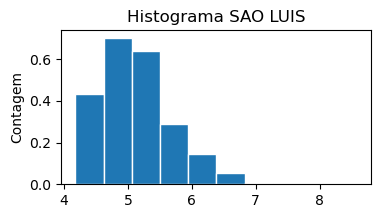


BARBACENA
count    772.000000
mean       5.132668
std        0.799471
min        3.480000
25%        4.650000
50%        5.390000
75%        5.790000
max        6.640000
Name: Valor de Venda, dtype: float64


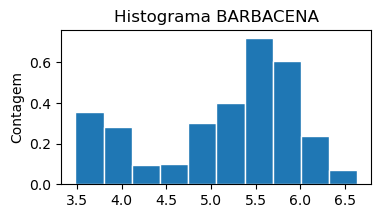


BETIM
count    1487.000000
mean        4.977909
std         0.745333
min         3.450000
25%         4.640000
50%         5.090000
75%         5.580000
max         6.490000
Name: Valor de Venda, dtype: float64


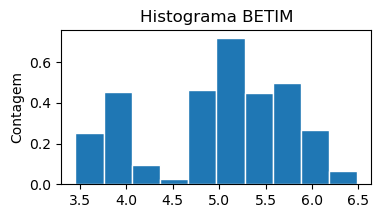


CARATINGA
count    786.000000
mean       5.233766
std        0.781041
min        3.830000
25%        4.390000
50%        5.390000
75%        5.790000
max        6.590000
Name: Valor de Venda, dtype: float64


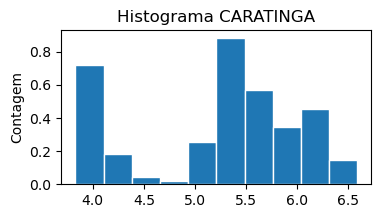


CONSELHEIRO LAFAIETE
count    823.000000
mean       5.097108
std        0.832157
min        3.470000
25%        4.490000
50%        5.190000
75%        5.690000
max        6.980000
Name: Valor de Venda, dtype: float64


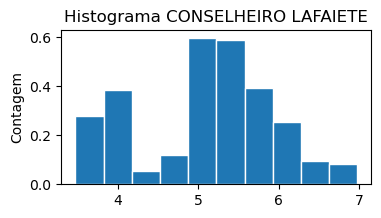


CONTAGEM
count    1687.000000
mean        4.847487
std         0.770390
min         3.450000
25%         3.990000
50%         4.990000
75%         5.390000
max         6.770000
Name: Valor de Venda, dtype: float64


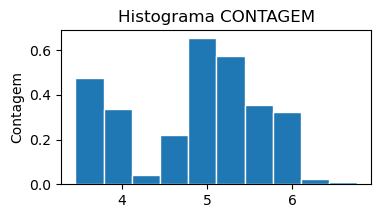


CURVELO
count    308.000000
mean       5.228019
std        0.746565
min        3.840000
25%        4.690000
50%        5.490000
75%        5.790000
max        6.590000
Name: Valor de Venda, dtype: float64


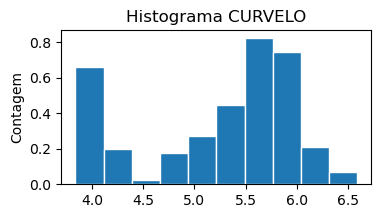


DIVINOPOLIS
count    1154.000000
mean        4.923059
std         0.801018
min         3.450000
25%         3.990000
50%         5.090000
75%         5.490000
max         6.990000
Name: Valor de Venda, dtype: float64


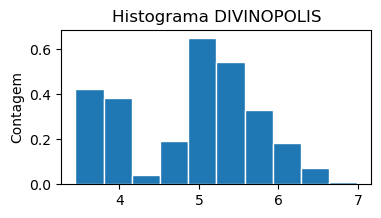


FORMIGA
count    691.000000
mean       5.113198
std        0.729938
min        3.630000
25%        4.385000
50%        5.290000
75%        5.690000
max        6.690000
Name: Valor de Venda, dtype: float64


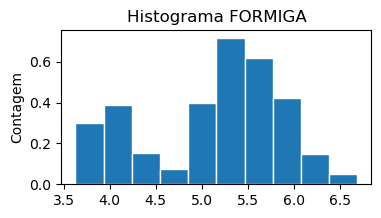


FRUTAL
count    721.000000
mean       5.110083
std        0.888487
min        3.480000
25%        4.160000
50%        5.240000
75%        5.840000
max        7.390000
Name: Valor de Venda, dtype: float64


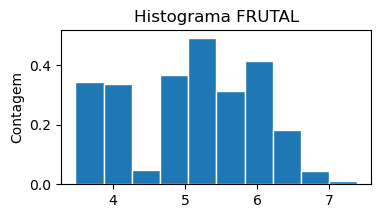


GOVERNADOR VALADARES
count    1408.000000
mean        5.062614
std         0.776923
min         3.490000
25%         4.190000
50%         5.250000
75%         5.570000
max         6.570000
Name: Valor de Venda, dtype: float64


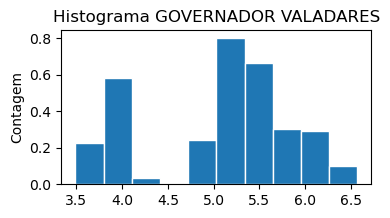


IPATINGA
count    1015.000000
mean        4.949202
std         0.743639
min         3.570000
25%         4.090000
50%         5.120000
75%         5.490000
max         6.990000
Name: Valor de Venda, dtype: float64


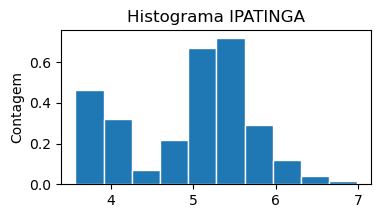


ITAUNA
count    806.000000
mean       5.038325
std        0.781643
min        3.290000
25%        4.190000
50%        5.190000
75%        5.590000
max        6.590000
Name: Valor de Venda, dtype: float64


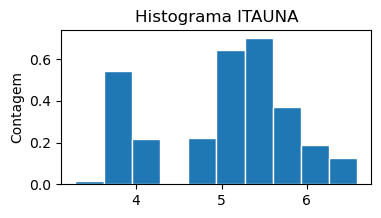


ITUIUTABA
count    1002.000000
mean        5.035928
std         0.837606
min         3.440000
25%         4.180000
50%         5.190000
75%         5.680000
max         6.980000
Name: Valor de Venda, dtype: float64


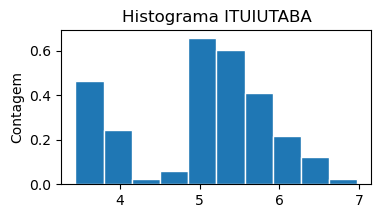


LAVRAS
count    769.000000
mean       4.970819
std        0.757586
min        3.390000
25%        4.190000
50%        5.150000
75%        5.530000
max        6.840000
Name: Valor de Venda, dtype: float64


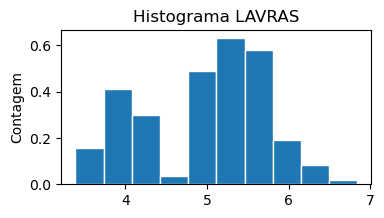


MONTES CLAROS
count    1339.000000
mean        5.027028
std         0.859669
min         3.330000
25%         4.590000
50%         5.280000
75%         5.590000
max         7.890000
Name: Valor de Venda, dtype: float64


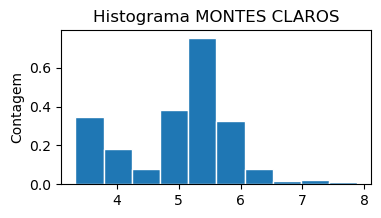


PARA DE MINAS
count    771.000000
mean       5.102827
std        0.837945
min        3.420000
25%        4.790000
50%        5.190000
75%        5.590000
max        6.890000
Name: Valor de Venda, dtype: float64


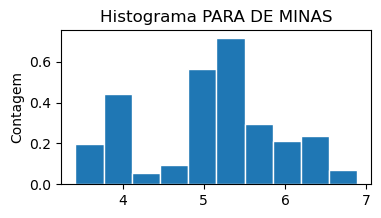


PATOS DE MINAS
count    1037.000000
mean        5.022150
std         0.794356
min         3.410000
25%         4.690000
50%         5.180000
75%         5.590000
max         6.690000
Name: Valor de Venda, dtype: float64


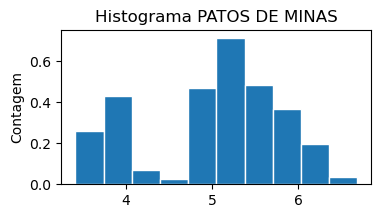


POCOS DE CALDAS
count    861.000000
mean       4.934146
std        0.834138
min        3.280000
25%        4.650000
50%        4.990000
75%        5.390000
max        6.990000
Name: Valor de Venda, dtype: float64


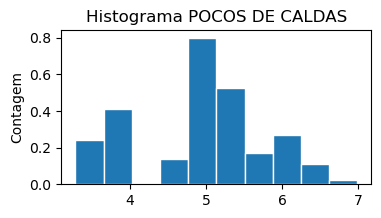


SAO JOAO DEL REI
count    807.000000
mean       5.065874
std        0.804171
min        3.650000
25%        4.690000
50%        5.150000
75%        5.685000
max        6.810000
Name: Valor de Venda, dtype: float64


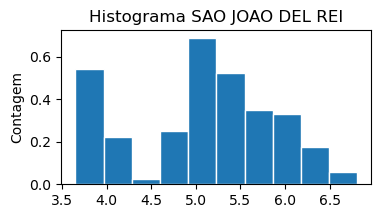


SETE LAGOAS
count    1445.000000
mean        4.935640
std         0.722295
min         3.540000
25%         4.290000
50%         5.090000
75%         5.450000
max         6.790000
Name: Valor de Venda, dtype: float64


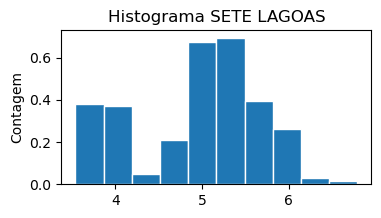


TIMOTEO
count    391.000000
mean       4.951535
std        0.723938
min        3.640000
25%        4.090000
50%        5.090000
75%        5.490000
max        6.290000
Name: Valor de Venda, dtype: float64


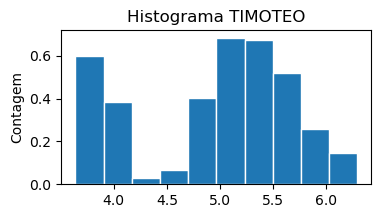


UBERLANDIA
count    2023.000000
mean        4.952279
std         0.796111
min         3.250000
25%         4.680000
50%         5.090000
75%         5.490000
max         6.690000
Name: Valor de Venda, dtype: float64


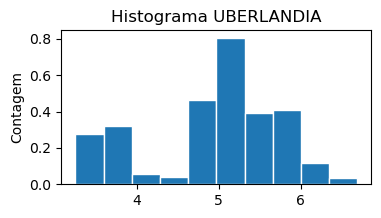


CAMPO GRANDE
count    1939.000000
mean        4.941779
std         0.808805
min         3.210000
25%         4.650000
50%         4.990000
75%         5.390000
max         6.790000
Name: Valor de Venda, dtype: float64


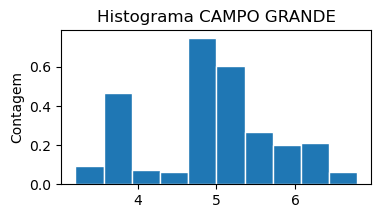


DOURADOS
count    1406.000000
mean        5.040526
std         0.778290
min         3.310000
25%         4.650000
50%         5.040000
75%         5.557500
max         7.090000
Name: Valor de Venda, dtype: float64


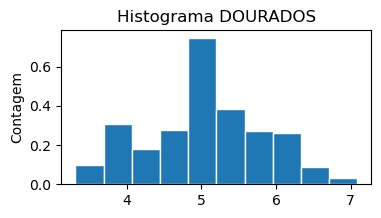


TRES LAGOAS
count    689.000000
mean       5.261582
std        0.917641
min        3.520000
25%        4.590000
50%        5.390000
75%        5.950000
max        6.990000
Name: Valor de Venda, dtype: float64


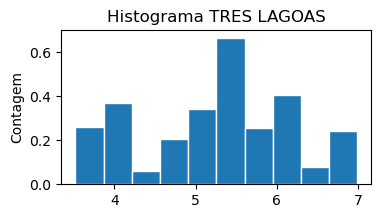


CACERES
count    873.000000
mean       5.211306
std        0.960304
min        3.390000
25%        4.930000
50%        5.450000
75%        5.900000
max        6.970000
Name: Valor de Venda, dtype: float64


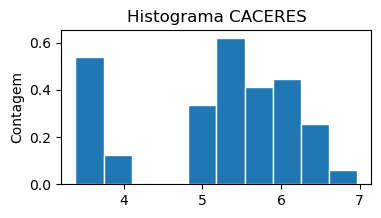


CUIABA
count    1759.000000
mean        4.965389
std         1.005577
min         3.030000
25%         3.790000
50%         5.170000
75%         5.590000
max         6.990000
Name: Valor de Venda, dtype: float64


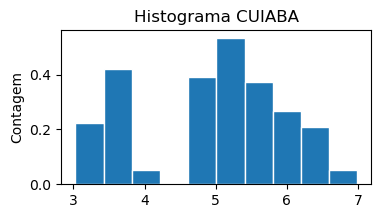


SINOP
count    738.000000
mean       5.133604
std        1.018121
min        3.190000
25%        3.990000
50%        5.390000
75%        5.890000
max        7.190000
Name: Valor de Venda, dtype: float64


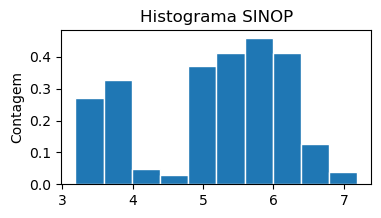


ALTAMIRA
count    835.000000
mean       6.073377
std        0.604381
min        4.680000
25%        5.690000
50%        6.050000
75%        6.490000
max        7.490000
Name: Valor de Venda, dtype: float64


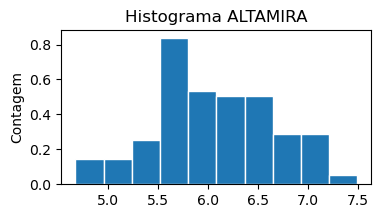


ANANINDEUA
count    1008.000000
mean        5.120893
std         0.685619
min         3.870000
25%         4.690000
50%         5.090000
75%         5.590000
max         7.680000
Name: Valor de Venda, dtype: float64


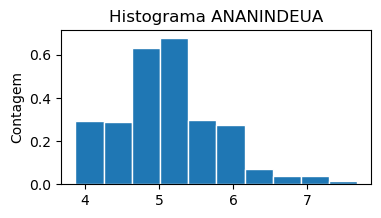


BELEM
count    1261.000000
mean        5.321824
std         0.688711
min         3.950000
25%         4.840000
50%         5.160000
75%         5.660000
max         7.790000
Name: Valor de Venda, dtype: float64


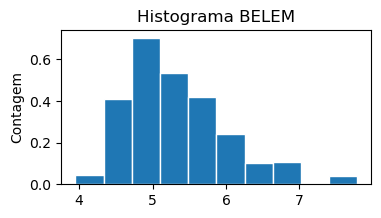


CASTANHAL
count    625.000000
mean       5.278992
std        0.589474
min        4.290000
25%        4.890000
50%        5.190000
75%        5.590000
max        7.140000
Name: Valor de Venda, dtype: float64


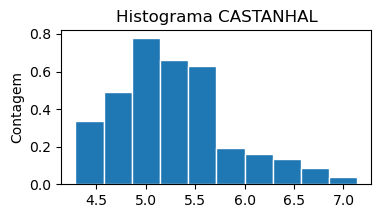


MARABA
count    494.000000
mean       5.655587
std        0.667540
min        4.350000
25%        5.150000
50%        5.570000
75%        6.290000
max        7.200000
Name: Valor de Venda, dtype: float64


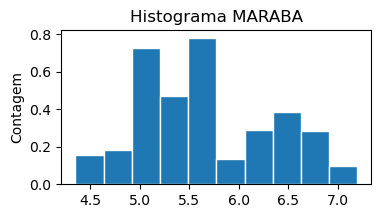


BAYEUX
count    532.000000
mean       4.995602
std        0.830007
min        3.590000
25%        4.240000
50%        5.050000
75%        5.530000
max        6.790000
Name: Valor de Venda, dtype: float64


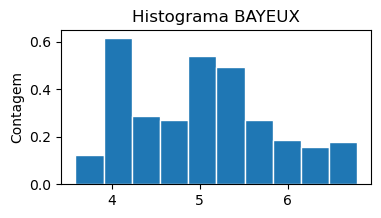


CABEDELO
count    708.000000
mean       4.937585
std        0.766950
min        3.590000
25%        4.190000
50%        4.990000
75%        5.390000
max        6.790000
Name: Valor de Venda, dtype: float64


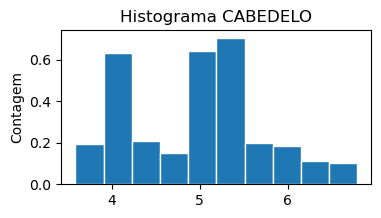


CAMPINA GRANDE
count    1860.000000
mean        5.018194
std         0.737396
min         3.670000
25%         4.500000
50%         5.090000
75%         5.490000
max         6.780000
Name: Valor de Venda, dtype: float64


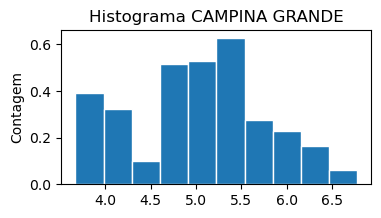


ARARIPINA
count    682.000000
mean       5.604868
std        0.525392
min        4.250000
25%        5.350000
50%        5.770000
75%        5.980000
max        6.980000
Name: Valor de Venda, dtype: float64


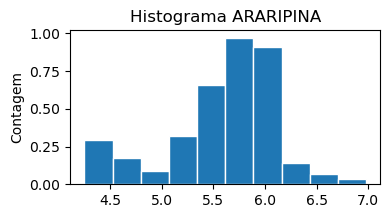


CARUARU
count    1535.000000
mean        4.917257
std         0.620625
min         3.660000
25%         4.280000
50%         4.970000
75%         5.370000
max         6.430000
Name: Valor de Venda, dtype: float64


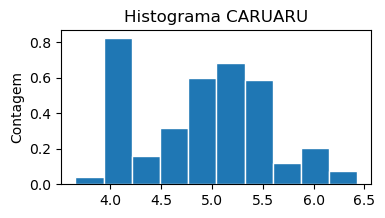


GARANHUNS
count    743.000000
mean       4.844724
std        0.607071
min        3.730000
25%        4.190000
50%        4.970000
75%        5.190000
max        6.770000
Name: Valor de Venda, dtype: float64


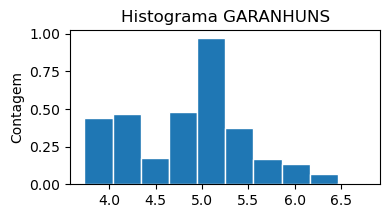


JABOATAO DOS GUARARAPES
count    1129.000000
mean        4.903392
std         0.752880
min         3.150000
25%         4.190000
50%         4.990000
75%         5.390000
max         6.790000
Name: Valor de Venda, dtype: float64


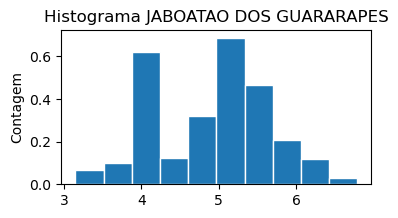


OLINDA
count    900.000000
mean       4.906856
std        0.711784
min        3.150000
25%        4.190000
50%        4.990000
75%        5.390000
max        6.990000
Name: Valor de Venda, dtype: float64


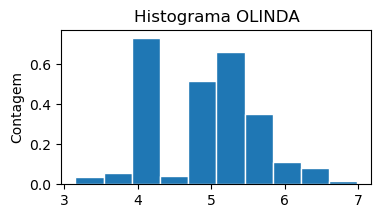


PAULISTA
count    1033.000000
mean        4.890958
std         0.750577
min         3.150000
25%         4.170000
50%         4.990000
75%         5.390000
max         6.900000
Name: Valor de Venda, dtype: float64


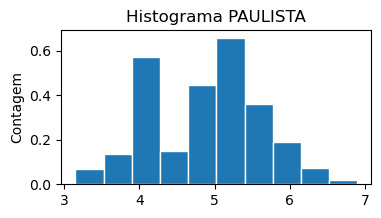


PETROLINA
count    792.000000
mean       5.656048
std        0.685785
min        4.140000
25%        5.140000
50%        5.790000
75%        6.205000
max        6.790000
Name: Valor de Venda, dtype: float64


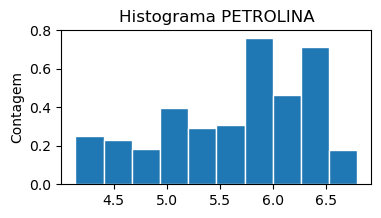


RECIFE
count    2731.000000
mean        4.931369
std         0.722552
min         3.150000
25%         4.190000
50%         5.030000
75%         5.470000
max         6.690000
Name: Valor de Venda, dtype: float64


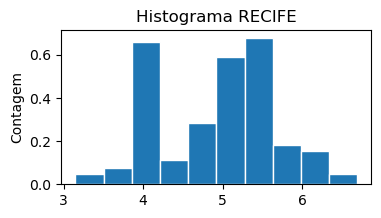


SANTA CRUZ DO CAPIBARIBE
count    410.000000
mean       5.133341
std        0.582032
min        3.790000
25%        4.590000
50%        5.290000
75%        5.470000
max        6.390000
Name: Valor de Venda, dtype: float64


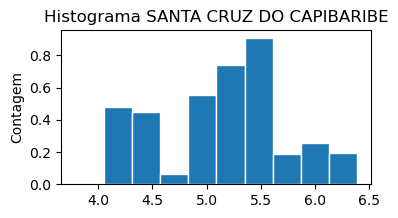


SERRA TALHADA
count    726.000000
mean       5.148168
std        0.621421
min        3.990000
25%        4.690000
50%        5.320000
75%        5.480000
max        6.690000
Name: Valor de Venda, dtype: float64


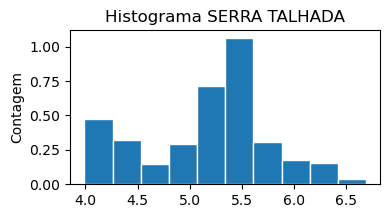


PICOS
count    971.000000
mean       5.538023
std        0.645414
min        3.990000
25%        5.190000
50%        5.530000
75%        6.015000
max        7.270000
Name: Valor de Venda, dtype: float64


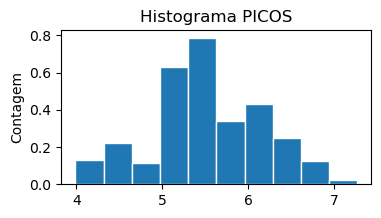


TERESINA
count    2670.000000
mean        5.362146
std         0.710106
min         3.690000
25%         4.890000
50%         5.480000
75%         5.890000
max         7.090000
Name: Valor de Venda, dtype: float64


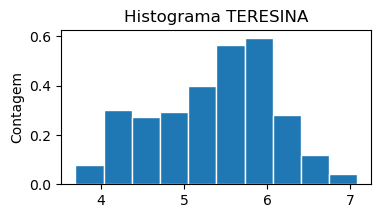


ARAPONGAS
count    887.000000
mean       5.041860
std        0.746148
min        3.490000
25%        4.390000
50%        5.190000
75%        5.525000
max        6.890000
Name: Valor de Venda, dtype: float64


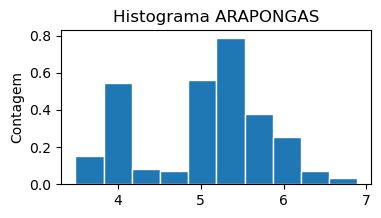


ARAUCARIA
count    733.000000
mean       5.285962
std        0.619501
min        3.990000
25%        4.890000
50%        5.490000
75%        5.750000
max        6.590000
Name: Valor de Venda, dtype: float64


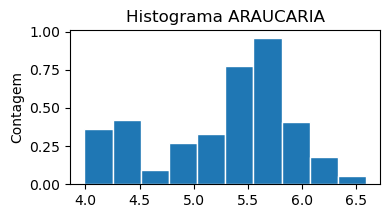


CASCAVEL
count    1306.000000
mean        5.127060
std         0.739344
min         3.570000
25%         4.770000
50%         5.340000
75%         5.660000
max         6.990000
Name: Valor de Venda, dtype: float64


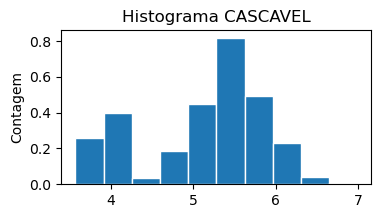


FOZ DO IGUACU
count    1310.000000
mean        5.138145
std         0.843985
min         3.390000
25%         4.970000
50%         5.290000
75%         5.590000
max         6.820000
Name: Valor de Venda, dtype: float64


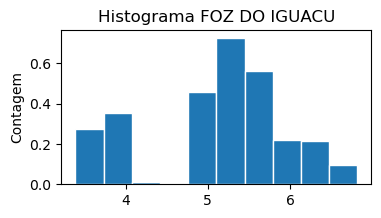


GUARAPUAVA
count    1529.000000
mean        4.982453
std         0.689070
min         3.640000
25%         4.790000
50%         5.090000
75%         5.390000
max         6.590000
Name: Valor de Venda, dtype: float64


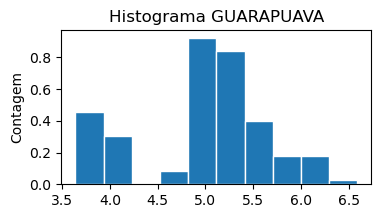


PARANAVAI
count    767.000000
mean       4.991734
std        0.803479
min        3.580000
25%        4.080000
50%        5.150000
75%        5.505000
max        6.890000
Name: Valor de Venda, dtype: float64


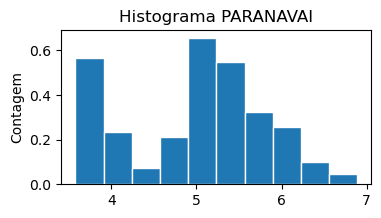


PONTA GROSSA
count    1756.000000
mean        5.055501
std         0.681385
min         3.590000
25%         4.740000
50%         5.190000
75%         5.490000
max         6.690000
Name: Valor de Venda, dtype: float64


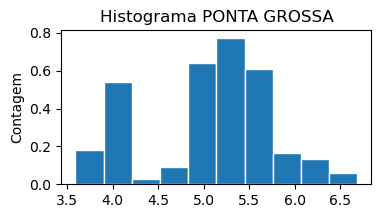


TOLEDO
count    751.000000
mean       4.941198
std        0.755189
min        3.390000
25%        4.090000
50%        5.090000
75%        5.490000
max        6.590000
Name: Valor de Venda, dtype: float64


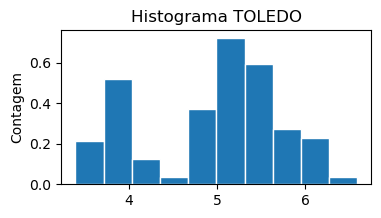


UMUARAMA
count    1333.000000
mean        5.054321
std         0.721216
min         3.700000
25%         4.650000
50%         5.250000
75%         5.510000
max         6.890000
Name: Valor de Venda, dtype: float64


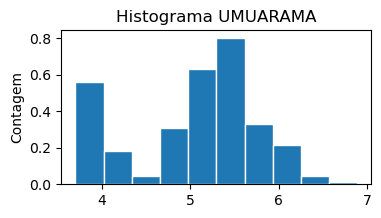


ANGRA DOS REIS
count    661.000000
mean       5.948502
std        0.591019
min        4.590000
25%        5.690000
50%        5.990000
75%        6.290000
max        7.690000
Name: Valor de Venda, dtype: float64


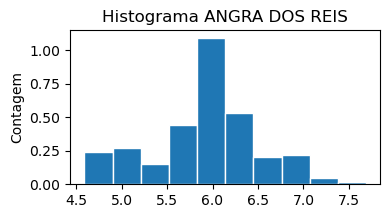


ARARUAMA
count    904.000000
mean       5.574624
std        0.662054
min        4.090000
25%        5.090000
50%        5.690000
75%        5.990000
max        6.980000
Name: Valor de Venda, dtype: float64


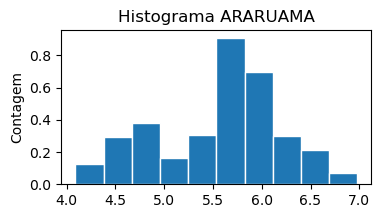


CAMPOS DOS GOYTACAZES
count    747.000000
mean       5.425047
std        0.610909
min        4.330000
25%        4.890000
50%        5.640000
75%        5.975000
max        6.850000
Name: Valor de Venda, dtype: float64


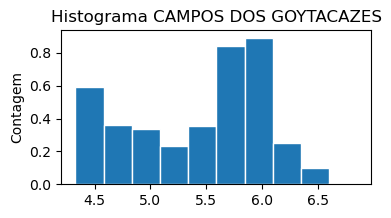


MARICA
count    842.000000
mean       5.159715
std        0.656277
min        3.890000
25%        4.790000
50%        5.200000
75%        5.590000
max        6.990000
Name: Valor de Venda, dtype: float64


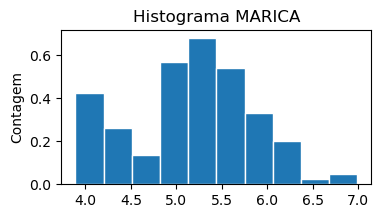


NITEROI
count    1534.000000
mean        5.113722
std         0.680894
min         3.690000
25%         4.490000
50%         5.190000
75%         5.590000
max         6.990000
Name: Valor de Venda, dtype: float64


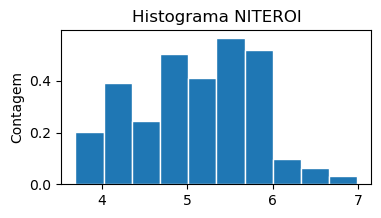


NOVA IGUACU
count    1695.000000
mean        5.122425
std         0.663749
min         3.850000
25%         4.490000
50%         5.190000
75%         5.580000
max         7.090000
Name: Valor de Venda, dtype: float64


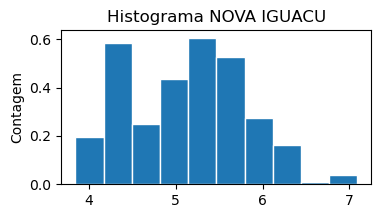


RIO BONITO
count    791.000000
mean       5.184172
std        0.636573
min        3.890000
25%        4.690000
50%        5.340000
75%        5.590000
max        6.690000
Name: Valor de Venda, dtype: float64


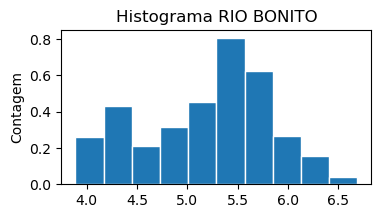


RIO DE JANEIRO
count    7886.000000
mean        5.073502
std         0.646954
min         3.760000
25%         4.490000
50%         5.180000
75%         5.570000
max         6.990000
Name: Valor de Venda, dtype: float64


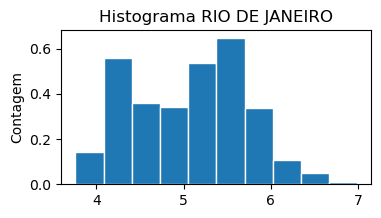


NILOPOLIS
count    586.000000
mean       5.005017
std        0.549855
min        3.940000
25%        4.490000
50%        5.085000
75%        5.390000
max        6.690000
Name: Valor de Venda, dtype: float64


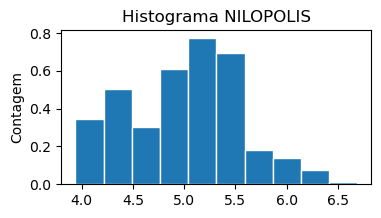


SAO GONCALO
count    1488.000000
mean        5.080914
std         0.680166
min         3.790000
25%         4.480000
50%         5.190000
75%         5.590000
max         6.990000
Name: Valor de Venda, dtype: float64


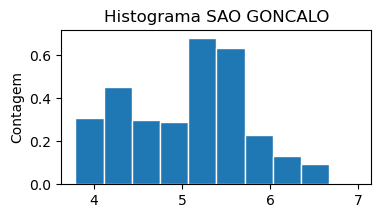


SAO JOAO DE MERITI
count    1014.000000
mean        5.025513
std         0.673709
min         3.790000
25%         4.390000
50%         5.070000
75%         5.485000
max         6.990000
Name: Valor de Venda, dtype: float64


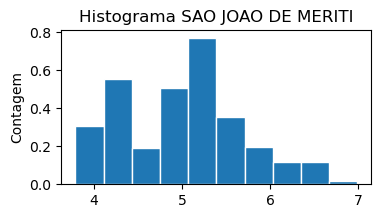


SAQUAREMA
count    845.000000
mean       5.682379
std        0.617767
min        4.490000
25%        5.390000
50%        5.790000
75%        6.090000
max        7.470000
Name: Valor de Venda, dtype: float64


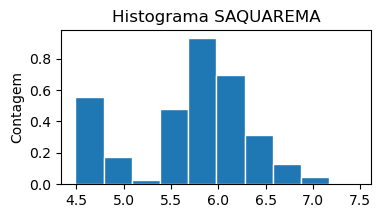


TERESOPOLIS
count    687.000000
mean       5.143508
std        0.701905
min        3.940000
25%        4.490000
50%        5.150000
75%        5.540000
max        7.090000
Name: Valor de Venda, dtype: float64


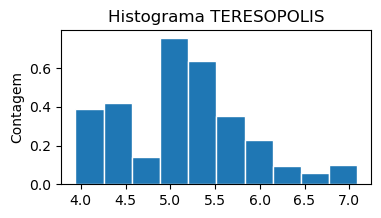


VOLTA REDONDA
count    1178.000000
mean        5.496418
std         0.556662
min         4.290000
25%         4.990000
50%         5.590000
75%         5.890000
max         6.790000
Name: Valor de Venda, dtype: float64


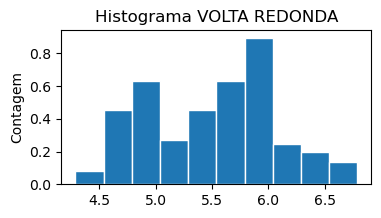


NATAL
count    1986.000000
mean        5.428948
std         0.774728
min         3.750000
25%         4.600000
50%         5.550000
75%         5.940000
max         7.190000
Name: Valor de Venda, dtype: float64


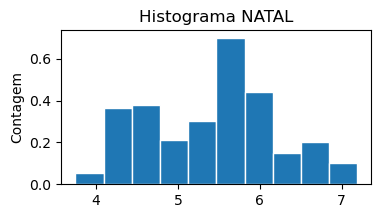


ARIQUEMES
count    887.000000
mean       5.980203
std        0.616860
min        4.690000
25%        5.480000
50%        5.940000
75%        6.330000
max        8.970000
Name: Valor de Venda, dtype: float64


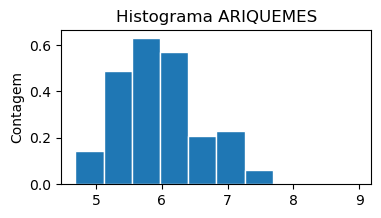


CACOAL
count    816.000000
mean       5.978407
std        0.606333
min        4.560000
25%        5.600000
50%        5.990000
75%        6.325000
max        7.490000
Name: Valor de Venda, dtype: float64


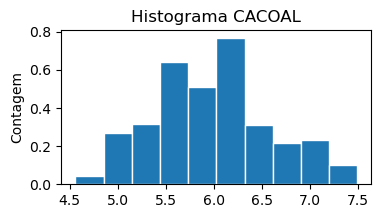


PORTO VELHO
count    1582.000000
mean        5.895278
std         0.688255
min         4.190000
25%         5.345000
50%         6.050000
75%         6.250000
max         7.990000
Name: Valor de Venda, dtype: float64


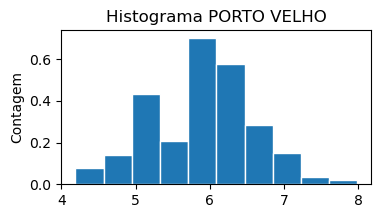


BOA VISTA
count    1664.000000
mean        6.184297
std         0.672083
min         4.790000
25%         5.690000
50%         6.090000
75%         6.950000
max         7.620000
Name: Valor de Venda, dtype: float64


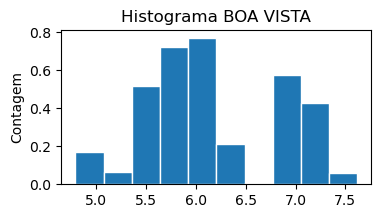


ALVORADA
count    693.000000
mean       5.474964
std        0.456024
min        4.590000
25%        5.090000
50%        5.450000
75%        5.620000
max        7.090000
Name: Valor de Venda, dtype: float64


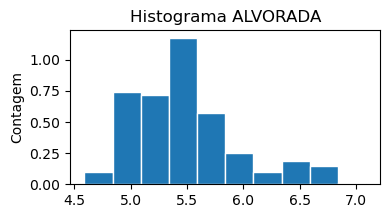


BAGE
count    780.000000
mean       6.158897
std        0.380610
min        4.940000
25%        5.890000
50%        6.190000
75%        6.370000
max        7.340000
Name: Valor de Venda, dtype: float64


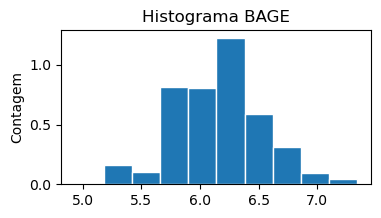


CANOAS
count    1453.000000
mean        5.270833
std         0.510339
min         3.990000
25%         4.890000
50%         5.250000
75%         5.490000
max         7.190000
Name: Valor de Venda, dtype: float64


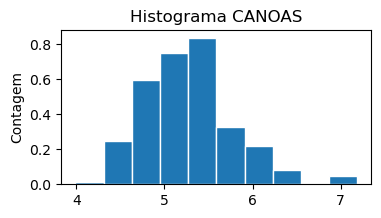


SAO LEOPOLDO
count    1073.000000
mean        5.204296
std         0.408157
min         4.190000
25%         4.890000
50%         5.190000
75%         5.490000
max         6.490000
Name: Valor de Venda, dtype: float64


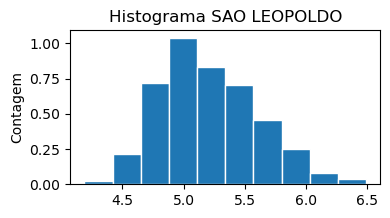


CAXIAS DO SUL
count    1601.000000
mean        5.460212
std         0.390166
min         4.660000
25%         5.180000
50%         5.490000
75%         5.690000
max         6.840000
Name: Valor de Venda, dtype: float64


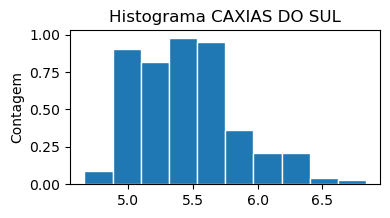


GRAMADO
count    680.000000
mean       5.927088
std        0.518173
min        4.790000
25%        5.490000
50%        5.890000
75%        6.190000
max        7.500000
Name: Valor de Venda, dtype: float64


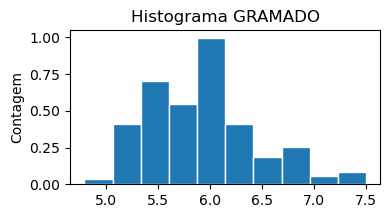


LAJEADO
count    1090.000000
mean        5.214578
std         0.412870
min         4.490000
25%         4.890000
50%         5.260000
75%         5.480000
max         6.590000
Name: Valor de Venda, dtype: float64


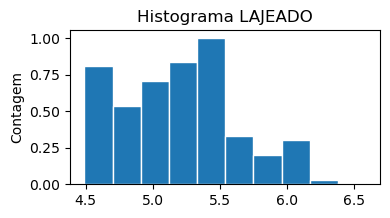


NOVO HAMBURGO
count    1239.000000
mean        5.095222
std         0.470247
min         3.990000
25%         4.750000
50%         5.080000
75%         5.390000
max         6.690000
Name: Valor de Venda, dtype: float64


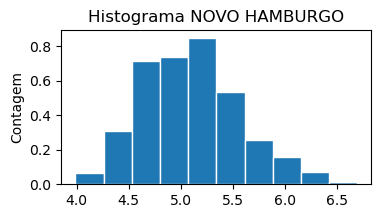


PASSO FUNDO
count    882.000000
mean       5.393776
std        0.445882
min        4.470000
25%        4.990000
50%        5.390000
75%        5.657500
max        6.790000
Name: Valor de Venda, dtype: float64


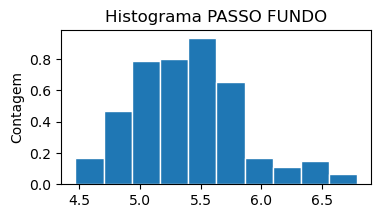


PELOTAS
count    1494.000000
mean        5.728735
std         0.512323
min         4.590000
25%         5.390000
50%         5.770000
75%         5.990000
max         7.490000
Name: Valor de Venda, dtype: float64


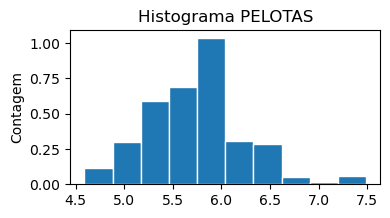


SANTA CRUZ DO SUL
count    1391.000000
mean        5.719454
std         0.428106
min         4.490000
25%         5.390000
50%         5.790000
75%         5.990000
max         6.890000
Name: Valor de Venda, dtype: float64


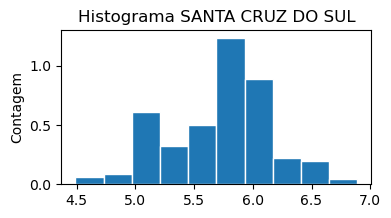


SANTA MARIA
count    1203.000000
mean        5.413724
std         0.468734
min         4.310000
25%         5.055000
50%         5.350000
75%         5.690000
max         6.990000
Name: Valor de Venda, dtype: float64


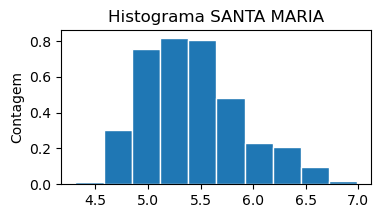


SANTA ROSA
count    692.000000
mean       5.541763
std        0.472967
min        4.540000
25%        5.190000
50%        5.470000
75%        5.880000
max        6.590000
Name: Valor de Venda, dtype: float64


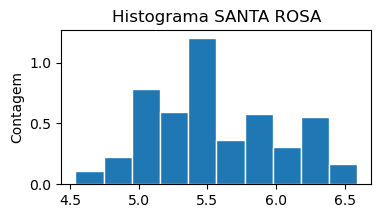


SAPIRANGA
count    743.000000
mean       5.205182
std        0.434177
min        3.990000
25%        4.890000
50%        5.190000
75%        5.440000
max        6.390000
Name: Valor de Venda, dtype: float64


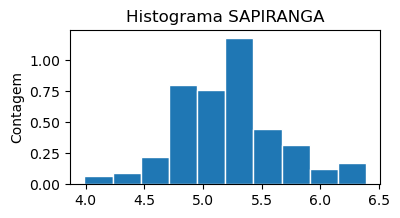


BLUMENAU
count    770.000000
mean       5.507571
std        0.431812
min        4.390000
25%        5.290000
50%        5.580000
75%        5.790000
max        6.990000
Name: Valor de Venda, dtype: float64


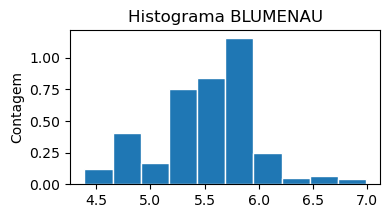


BRUSQUE
count    746.000000
mean       5.577989
std        0.529793
min        4.290000
25%        5.290000
50%        5.690000
75%        5.850000
max        6.990000
Name: Valor de Venda, dtype: float64


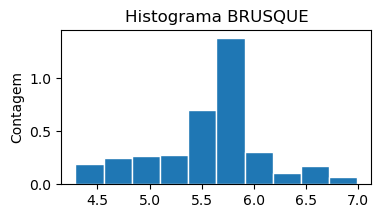


CRICIUMA
count    1387.00000
mean        5.40075
std         0.49478
min         3.99000
25%         4.99000
50%         5.36000
75%         5.65000
max         7.15000
Name: Valor de Venda, dtype: float64


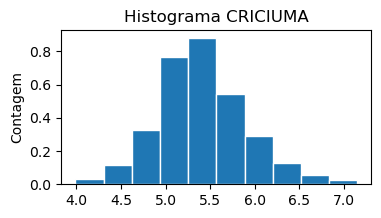


JARAGUA DO SUL
count    747.000000
mean       5.417818
std        0.520475
min        4.290000
25%        5.105000
50%        5.380000
75%        5.690000
max        7.040000
Name: Valor de Venda, dtype: float64


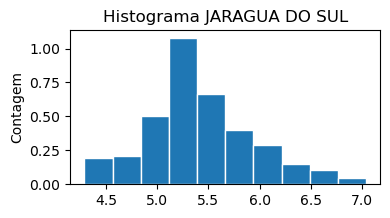


LAGES
count    782.000000
mean       5.608708
std        0.619036
min        3.890000
25%        5.242500
50%        5.620000
75%        5.990000
max        7.040000
Name: Valor de Venda, dtype: float64


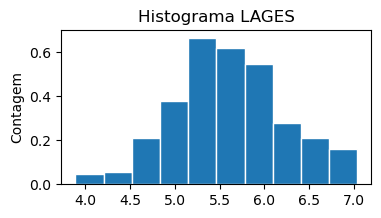


PALHOCA
count    828.000000
mean       5.418176
std        0.544349
min        3.990000
25%        5.127500
50%        5.490000
75%        5.790000
max        6.730000
Name: Valor de Venda, dtype: float64


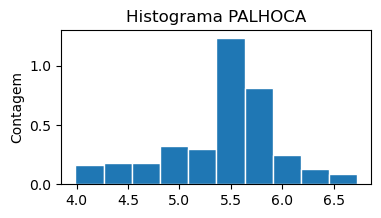


TUBARAO
count    1040.000000
mean        5.409481
std         0.473273
min         4.130000
25%         5.140000
50%         5.290000
75%         5.690000
max         6.890000
Name: Valor de Venda, dtype: float64


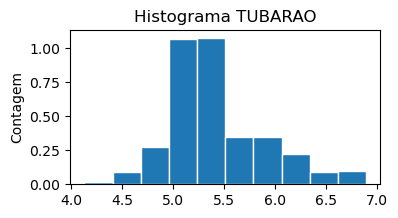


ARACAJU
count    1443.000000
mean        5.011954
std         0.598716
min         3.740000
25%         4.490000
50%         5.090000
75%         5.440000
max         6.890000
Name: Valor de Venda, dtype: float64


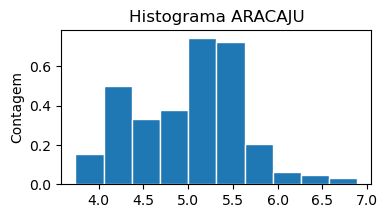


AMPARO
count    755.000000
mean       5.168185
std        0.832277
min        3.490000
25%        4.670000
50%        5.290000
75%        5.700000
max        6.890000
Name: Valor de Venda, dtype: float64


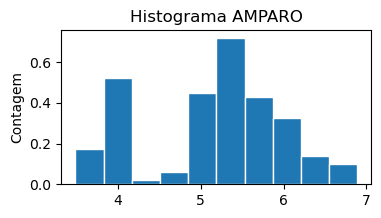


ARARAQUARA
count    1307.000000
mean        4.965455
std         0.953389
min         3.060000
25%         3.990000
50%         5.090000
75%         5.590000
max         7.840000
Name: Valor de Venda, dtype: float64


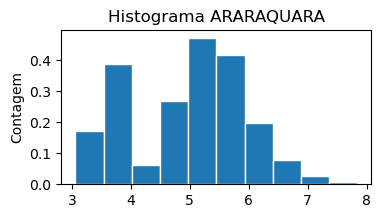


BAURU
count    1366.000000
mean        4.766889
std         0.882616
min         3.150000
25%         3.790000
50%         4.980000
75%         5.390000
max         6.790000
Name: Valor de Venda, dtype: float64


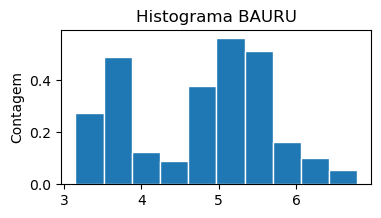


CACAPAVA
count    706.000000
mean       4.900467
std        0.902052
min        3.190000
25%        4.350000
50%        4.990000
75%        5.390000
max        7.240000
Name: Valor de Venda, dtype: float64


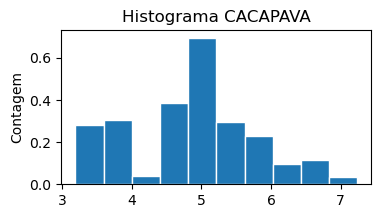


CATANDUVA
count    949.000000
mean       4.933098
std        0.895103
min        3.090000
25%        3.890000
50%        5.150000
75%        5.590000
max        6.690000
Name: Valor de Venda, dtype: float64


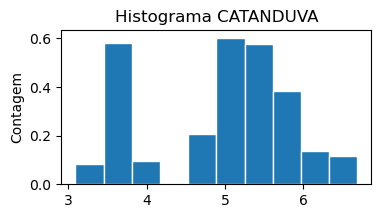


COSMOPOLIS
count    610.000000
mean       4.826754
std        0.856285
min        3.290000
25%        3.990000
50%        4.990000
75%        5.330000
max        6.990000
Name: Valor de Venda, dtype: float64


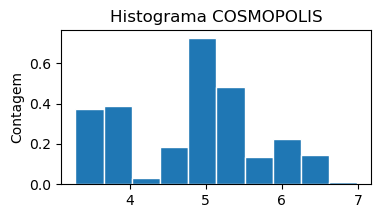


VOTUPORANGA
count    882.000000
mean       4.932075
std        0.922364
min        3.210000
25%        3.982500
50%        5.190000
75%        5.547500
max        7.990000
Name: Valor de Venda, dtype: float64


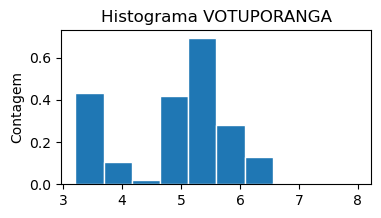


COTIA
count    1323.000000
mean        5.170824
std         0.839641
min         3.490000
25%         4.780000
50%         5.280000
75%         5.690000
max         7.440000
Name: Valor de Venda, dtype: float64


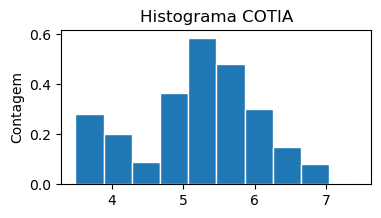


CUBATAO
count    706.000000
mean       5.501955
std        0.916868
min        3.520000
25%        4.800000
50%        5.680000
75%        6.190000
max        7.190000
Name: Valor de Venda, dtype: float64


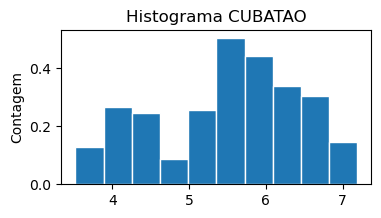


DIADEMA
count    1291.000000
mean        5.050573
std         0.898319
min         3.090000
25%         4.390000
50%         5.190000
75%         5.690000
max         6.990000
Name: Valor de Venda, dtype: float64


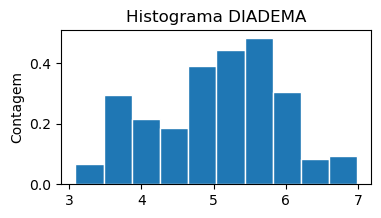


EMBU DAS ARTES
count    879.000000
mean       5.204164
std        0.824112
min        3.490000
25%        4.890000
50%        5.290000
75%        5.690000
max        7.460000
Name: Valor de Venda, dtype: float64


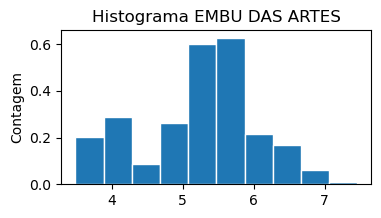


GUARATINGUETA
count    862.00000
mean       5.03522
std        0.82839
min        3.49000
25%        4.39000
50%        5.09000
75%        5.44000
max        7.68000
Name: Valor de Venda, dtype: float64


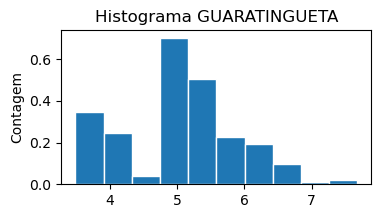


GUARULHOS
count    2443.000000
mean        4.951621
std         0.843537
min         3.120000
25%         4.270000
50%         5.070000
75%         5.590000
max         7.890000
Name: Valor de Venda, dtype: float64


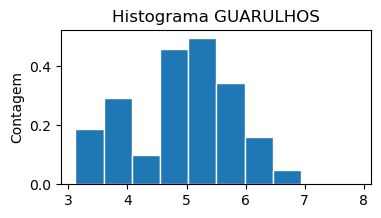


HORTOLANDIA
count    927.000000
mean       4.859525
std        0.820814
min        3.190000
25%        4.250000
50%        5.090000
75%        5.470000
max        6.690000
Name: Valor de Venda, dtype: float64


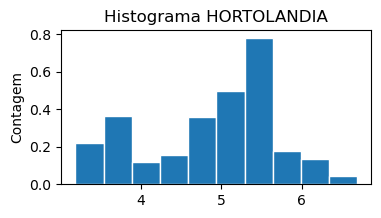


IBITINGA
count    591.000000
mean       5.013435
std        0.827973
min        3.360000
25%        4.705000
50%        5.190000
75%        5.490000
max        6.990000
Name: Valor de Venda, dtype: float64


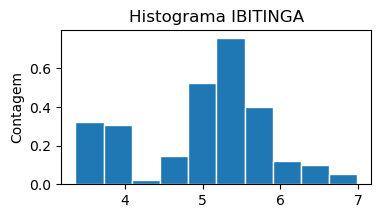


ITANHAEM
count    702.000000
mean       5.284074
std        0.860626
min        3.650000
25%        4.990000
50%        5.350000
75%        5.760000
max        7.440000
Name: Valor de Venda, dtype: float64


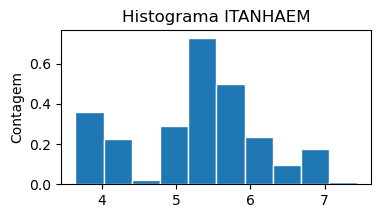


JALES
count    582.000000
mean       5.202749
std        0.751225
min        3.870000
25%        4.970000
50%        5.370000
75%        5.890000
max        6.440000
Name: Valor de Venda, dtype: float64


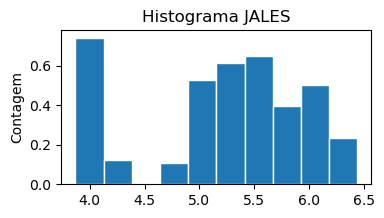


JUNDIAI
count    1717.000000
mean        5.070093
std         0.799422
min         3.460000
25%         4.290000
50%         5.270000
75%         5.640000
max         7.090000
Name: Valor de Venda, dtype: float64


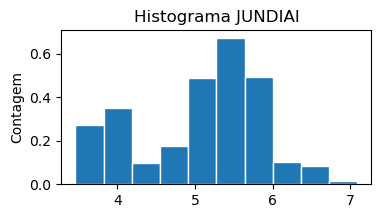


MARILIA
count    947.000000
mean       4.795132
std        0.945648
min        3.240000
25%        3.690000
50%        4.990000
75%        5.390000
max        6.990000
Name: Valor de Venda, dtype: float64


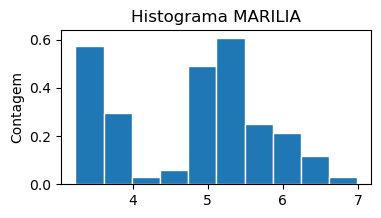


MATAO
count    600.000000
mean       5.039017
std        0.864162
min        2.990000
25%        4.190000
50%        5.190000
75%        5.590000
max        6.990000
Name: Valor de Venda, dtype: float64


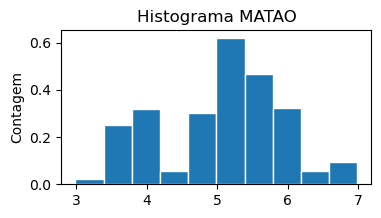


MAUA
count    986.000000
mean       5.072059
std        0.823927
min        3.240000
25%        4.632500
50%        5.190000
75%        5.590000
max        6.890000
Name: Valor de Venda, dtype: float64


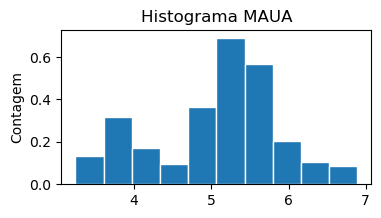


MIRASSOL
count    873.000000
mean       5.020985
std        0.876921
min        3.280000
25%        4.790000
50%        5.290000
75%        5.590000
max        6.760000
Name: Valor de Venda, dtype: float64


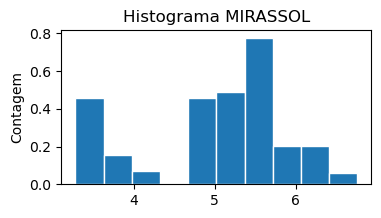


MOGI GUACU
count    935.000000
mean       5.163572
std        0.783642
min        3.490000
25%        4.790000
50%        5.290000
75%        5.610000
max        6.990000
Name: Valor de Venda, dtype: float64


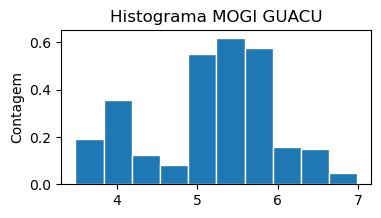


MOGI DAS CRUZES
count    1577.000000
mean        5.008985
std         0.841301
min         3.190000
25%         4.490000
50%         5.120000
75%         5.490000
max         6.990000
Name: Valor de Venda, dtype: float64


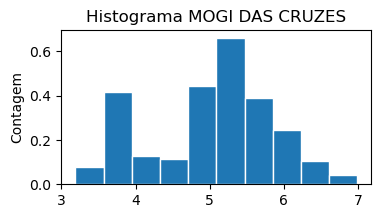


MOGI MIRIM
count    865.000000
mean       5.026150
std        0.831278
min        3.090000
25%        4.490000
50%        5.190000
75%        5.590000
max        7.240000
Name: Valor de Venda, dtype: float64


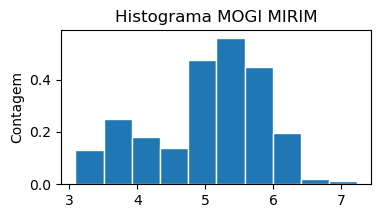


PAULINIA
count    720.000000
mean       4.896694
std        0.827605
min        3.090000
25%        3.990000
50%        5.090000
75%        5.490000
max        6.990000
Name: Valor de Venda, dtype: float64


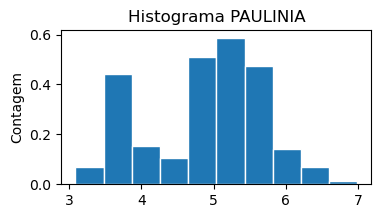


POA
count    603.000000
mean       4.876600
std        0.905858
min        3.090000
25%        3.990000
50%        5.090000
75%        5.490000
max        7.090000
Name: Valor de Venda, dtype: float64


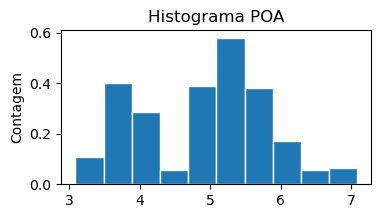


RIBEIRAO PIRES
count    786.000000
mean       5.110433
std        0.841918
min        3.290000
25%        4.600000
50%        5.290000
75%        5.690000
max        6.790000
Name: Valor de Venda, dtype: float64


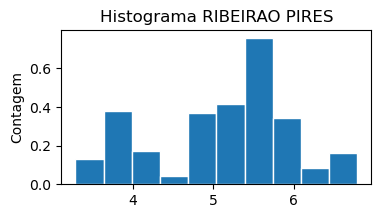


RIBEIRAO PRETO
count    2172.000000
mean        4.954001
std         0.896206
min         3.090000
25%         3.890000
50%         5.270000
75%         5.590000
max         7.370000
Name: Valor de Venda, dtype: float64


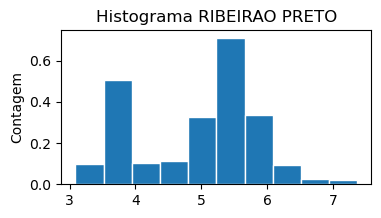


RIO CLARO
count    1235.000000
mean        4.972024
std         0.817879
min         3.290000
25%         4.490000
50%         5.090000
75%         5.490000
max         6.990000
Name: Valor de Venda, dtype: float64


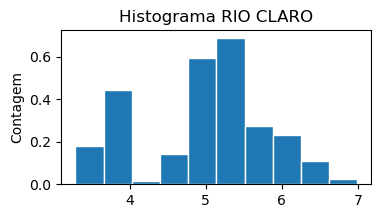


SALTO
count    587.000000
mean       4.935877
std        0.936587
min        3.250000
25%        3.890000
50%        5.090000
75%        5.600000
max        6.800000
Name: Valor de Venda, dtype: float64


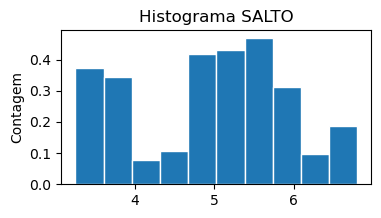


SANTA BARBARA D'OESTE
count    810.000000
mean       4.851049
std        0.835906
min        3.160000
25%        3.890000
50%        4.990000
75%        5.390000
max        6.590000
Name: Valor de Venda, dtype: float64


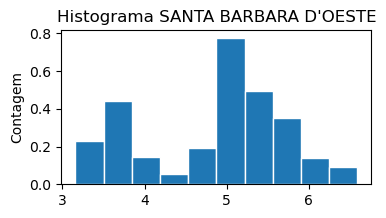


SANTO ANDRE
count    1816.000000
mean        5.182065
std         0.878317
min         3.290000
25%         4.690000
50%         5.290000
75%         5.690000
max         7.890000
Name: Valor de Venda, dtype: float64


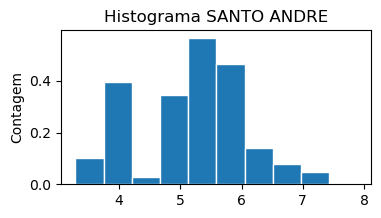


SANTOS
count    1232.000000
mean        5.128369
std         0.912813
min         3.240000
25%         4.490000
50%         5.190000
75%         5.690000
max         7.790000
Name: Valor de Venda, dtype: float64


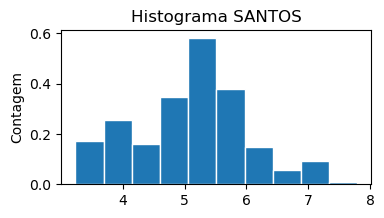


SAO CAETANO DO SUL
count    1065.000000
mean        4.964798
std         0.865424
min         3.090000
25%         4.290000
50%         4.990000
75%         5.590000
max         7.290000
Name: Valor de Venda, dtype: float64


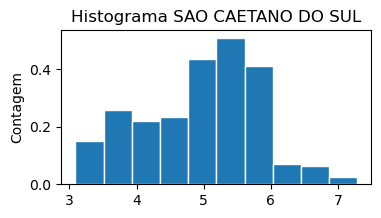


SAO JOAO DA BOA VISTA
count    703.000000
mean       4.932034
std        0.745558
min        3.370000
25%        4.670000
50%        5.080000
75%        5.390000
max        6.690000
Name: Valor de Venda, dtype: float64


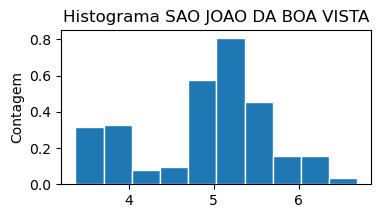


SAO JOSE DO RIO PRETO
count    1760.000000
mean        4.957153
std         0.896368
min         3.190000
25%         4.290000
50%         5.190000
75%         5.590000
max         6.890000
Name: Valor de Venda, dtype: float64


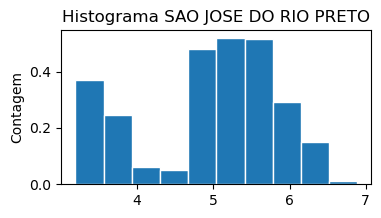


SAO PAULO
count    19466.000000
mean         5.054212
std          0.971877
min          2.990000
25%          4.390000
50%          5.090000
75%          5.590000
max          8.490000
Name: Valor de Venda, dtype: float64


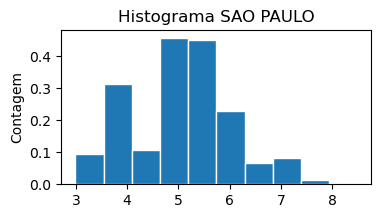


SAO VICENTE
count    930.000000
mean       5.030043
std        0.756535
min        3.490000
25%        4.590000
50%        5.190000
75%        5.590000
max        6.680000
Name: Valor de Venda, dtype: float64


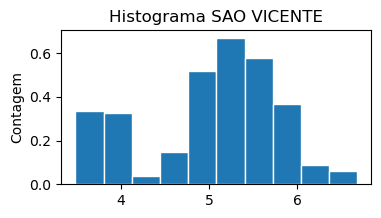


SERTAOZINHO
count    881.000000
mean       5.014200
std        0.841522
min        3.440000
25%        4.520000
50%        5.270000
75%        5.590000
max        6.590000
Name: Valor de Venda, dtype: float64


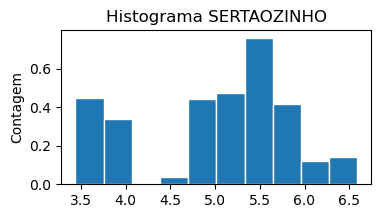


SUZANO
count    1056.000000
mean        5.035199
std         0.806573
min         3.290000
25%         4.670000
50%         5.190000
75%         5.590000
max         6.990000
Name: Valor de Venda, dtype: float64


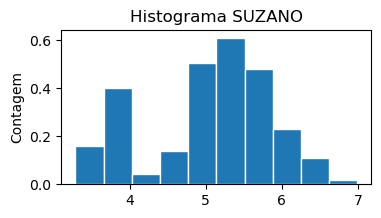


TABOAO DA SERRA
count    784.000000
mean       5.127577
std        0.948475
min        3.370000
25%        4.690000
50%        5.090000
75%        5.780000
max        7.290000
Name: Valor de Venda, dtype: float64


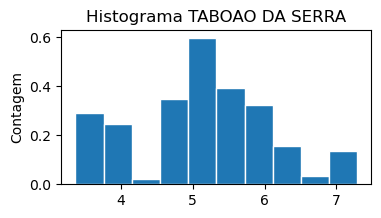


TAUBATE
count    1462.000000
mean        4.902435
std         0.801819
min         3.140000
25%         4.590000
50%         4.970000
75%         5.420000
max         7.040000
Name: Valor de Venda, dtype: float64


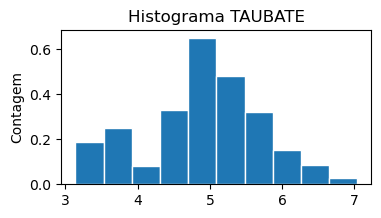


VALINHOS
count    1014.000000
mean        4.954901
std         0.842034
min         3.190000
25%         4.010000
50%         5.170000
75%         5.490000
max         7.590000
Name: Valor de Venda, dtype: float64


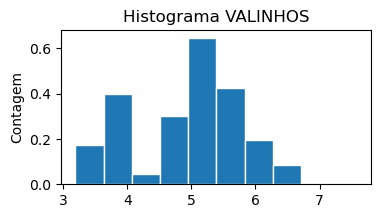


PARAUAPEBAS
count    1180.000000
mean        6.286500
std         0.690695
min         4.750000
25%         5.790000
50%         6.250000
75%         6.962500
max         7.990000
Name: Valor de Venda, dtype: float64


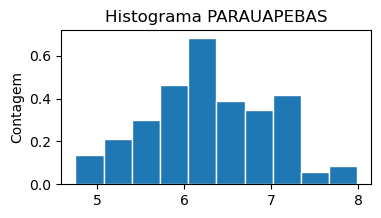


MACEIO
count    1776.000000
mean        5.083694
std         0.788554
min         3.590000
25%         4.490000
50%         5.120000
75%         5.610000
max         7.670000
Name: Valor de Venda, dtype: float64


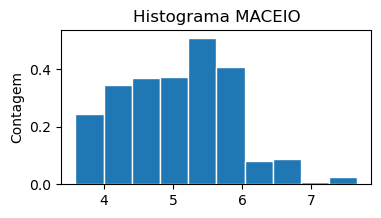


MANAUS
count    4062.000000
mean        5.640963
std         0.877055
min         3.590000
25%         4.980000
50%         5.990000
75%         6.490000
max         6.990000
Name: Valor de Venda, dtype: float64


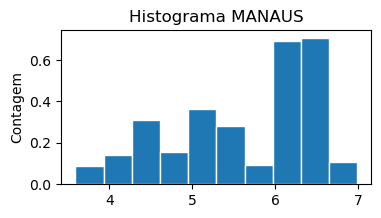


FEIRA DE SANTANA
count    2146.000000
mean        5.232008
std         0.681893
min         3.760000
25%         4.620000
50%         5.340000
75%         5.690000
max         7.900000
Name: Valor de Venda, dtype: float64


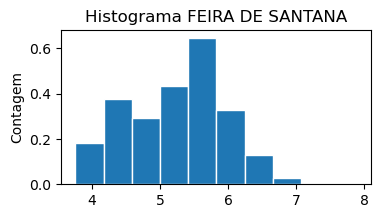


GUANAMBI
count    727.000000
mean       5.437304
std        0.763710
min        3.840000
25%        5.090000
50%        5.690000
75%        5.890000
max        6.890000
Name: Valor de Venda, dtype: float64


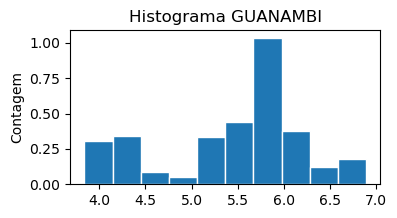


JUAZEIRO
count    499.000000
mean       5.658858
std        0.681539
min        3.790000
25%        4.970000
50%        5.850000
75%        5.990000
max        6.990000
Name: Valor de Venda, dtype: float64


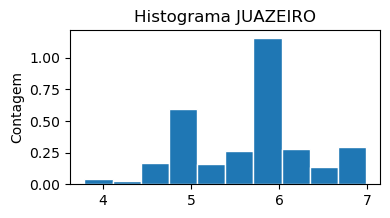


LAURO DE FREITAS
count    499.000000
mean       5.186593
std        0.680610
min        3.840000
25%        4.590000
50%        5.290000
75%        5.640000
max        6.790000
Name: Valor de Venda, dtype: float64


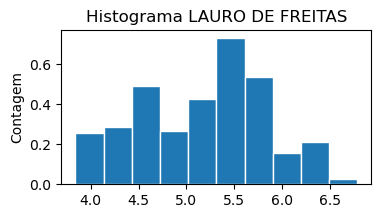


TEIXEIRA DE FREITAS
count    909.000000
mean       5.483663
std        0.724131
min        3.990000
25%        4.740000
50%        5.590000
75%        5.990000
max        7.390000
Name: Valor de Venda, dtype: float64


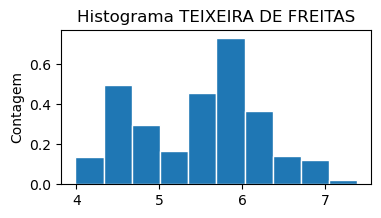


CAUCAIA
count    1417.000000
mean        5.427276
std         0.660486
min         4.170000
25%         4.770000
50%         5.590000
75%         5.890000
max         6.990000
Name: Valor de Venda, dtype: float64


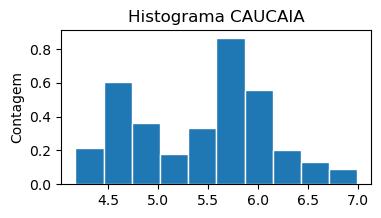


CARIACICA
count    1275.000000
mean        5.209443
std         0.517953
min         3.890000
25%         4.925000
50%         5.290000
75%         5.520000
max         6.590000
Name: Valor de Venda, dtype: float64


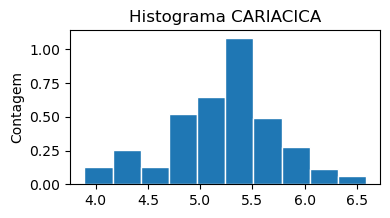


GURUPI
count    705.000000
mean       5.373234
std        0.586689
min        4.050000
25%        5.090000
50%        5.490000
75%        5.790000
max        6.770000
Name: Valor de Venda, dtype: float64


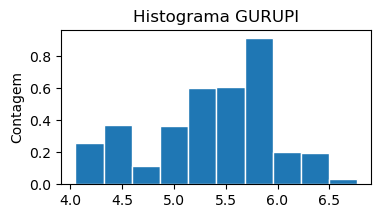


JATAI
count    663.000000
mean       5.162157
std        0.795805
min        3.440000
25%        4.390000
50%        5.240000
75%        5.715000
max        6.590000
Name: Valor de Venda, dtype: float64


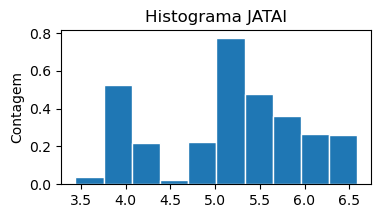


LUZIANIA
count    1085.000000
mean        5.124627
std         0.834971
min         3.400000
25%         4.760000
50%         5.290000
75%         5.660000
max         6.990000
Name: Valor de Venda, dtype: float64


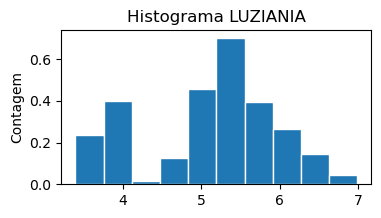


ACAILANDIA
count    934.000000
mean       5.448919
std        0.502918
min        3.570000
25%        5.080000
50%        5.530000
75%        5.780000
max        7.550000
Name: Valor de Venda, dtype: float64


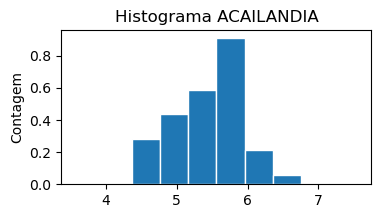


BALSAS
count    855.000000
mean       5.736292
std        0.524165
min        4.190000
25%        5.450000
50%        5.790000
75%        6.075000
max        7.290000
Name: Valor de Venda, dtype: float64


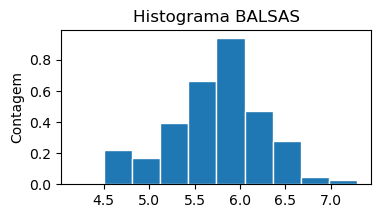


IMPERATRIZ
count    1368.000000
mean        5.341213
std         0.591284
min         4.190000
25%         4.890000
50%         5.290000
75%         5.720000
max         6.950000
Name: Valor de Venda, dtype: float64


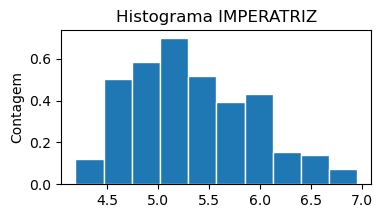


SAO JOSE DE RIBAMAR
count    932.000000
mean       5.088970
std        0.510133
min        4.080000
25%        4.680000
50%        4.990000
75%        5.480000
max        6.590000
Name: Valor de Venda, dtype: float64


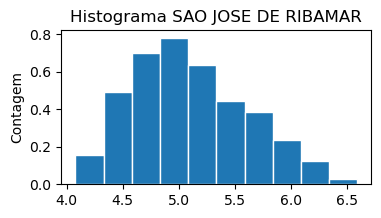


ARAGUARI
count    854.000000
mean       4.944005
std        0.817497
min        3.390000
25%        4.580000
50%        5.015000
75%        5.490000
max        6.590000
Name: Valor de Venda, dtype: float64


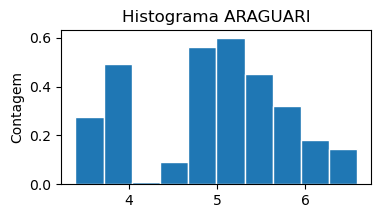


ARAXA
count    1127.000000
mean        5.264064
std         0.739710
min         3.890000
25%         4.890000
50%         5.450000
75%         5.850000
max         6.690000
Name: Valor de Venda, dtype: float64


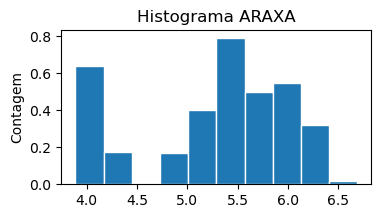


BELO HORIZONTE
count    3477.000000
mean        4.822307
std         0.761192
min         3.390000
25%         3.990000
50%         4.990000
75%         5.370000
max         7.190000
Name: Valor de Venda, dtype: float64


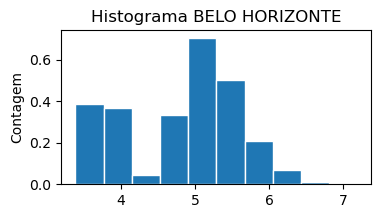


CAMPO BELO
count    546.000000
mean       4.929634
std        0.784719
min        3.590000
25%        3.990000
50%        5.090000
75%        5.390000
max        6.690000
Name: Valor de Venda, dtype: float64


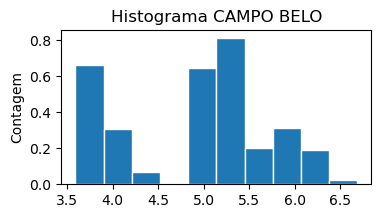


CORONEL FABRICIANO
count    679.000000
mean       4.948748
std        0.741936
min        3.640000
25%        4.090000
50%        5.090000
75%        5.490000
max        6.940000
Name: Valor de Venda, dtype: float64


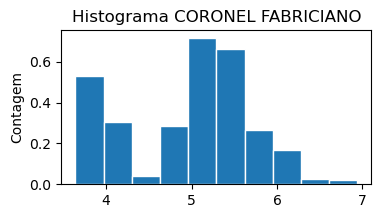


MANHUACU
count    382.000000
mean       5.275026
std        0.734030
min        3.950000
25%        4.960000
50%        5.480000
75%        5.780000
max        6.780000
Name: Valor de Venda, dtype: float64


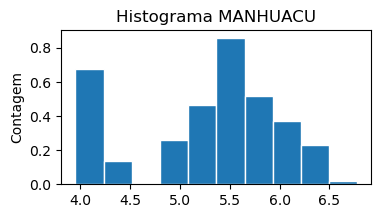


MONTE CARMELO
count    512.000000
mean       4.809922
std        0.834714
min        3.390000
25%        3.960000
50%        4.980000
75%        5.290000
max        6.630000
Name: Valor de Venda, dtype: float64


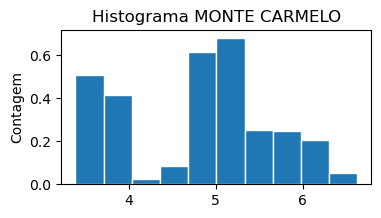


MURIAE
count    841.000000
mean       5.295684
std        0.698860
min        3.980000
25%        4.940000
50%        5.490000
75%        5.740000
max        6.790000
Name: Valor de Venda, dtype: float64


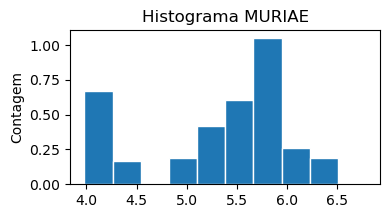


NOVA LIMA
count    700.000000
mean       5.136157
std        0.810451
min        3.570000
25%        4.190000
50%        5.350000
75%        5.690000
max        6.990000
Name: Valor de Venda, dtype: float64


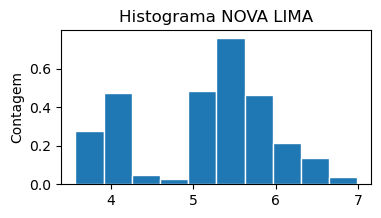


UBERABA
count    1466.000000
mean        4.967319
std         0.867945
min         3.290000
25%         3.990000
50%         5.190000
75%         5.590000
max         6.990000
Name: Valor de Venda, dtype: float64


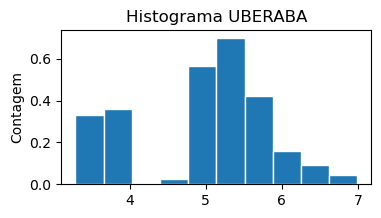


RONDONOPOLIS
count    789.000000
mean       5.287224
std        0.990367
min        3.230000
25%        5.090000
50%        5.390000
75%        5.740000
max        7.260000
Name: Valor de Venda, dtype: float64


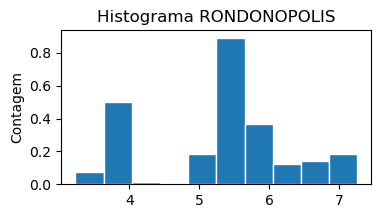


VARZEA GRANDE
count    1750.000000
mean        4.980343
std         0.985381
min         3.070000
25%         4.080000
50%         5.190000
75%         5.690000
max         6.990000
Name: Valor de Venda, dtype: float64


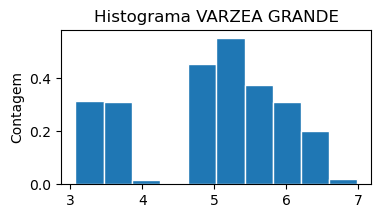


REDENCAO
count    225.000000
mean       5.613200
std        0.515557
min        4.790000
25%        5.190000
50%        5.610000
75%        5.810000
max        6.980000
Name: Valor de Venda, dtype: float64


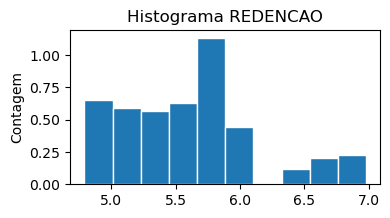


SANTAREM
count    1425.000000
mean        5.733712
std         0.618089
min         4.480000
25%         5.290000
50%         5.570000
75%         6.250000
max         7.290000
Name: Valor de Venda, dtype: float64


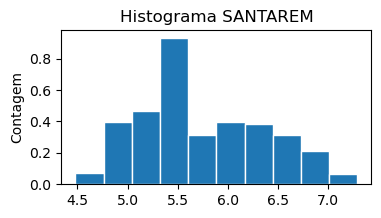


JOAO PESSOA
count    1729.000000
mean        4.882556
std         0.737913
min         3.560000
25%         4.090000
50%         4.990000
75%         5.370000
max         6.690000
Name: Valor de Venda, dtype: float64


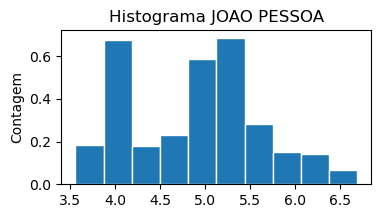


PATOS
count    673.000000
mean       5.380208
std        0.752940
min        3.840000
25%        4.990000
50%        5.390000
75%        5.990000
max        6.990000
Name: Valor de Venda, dtype: float64


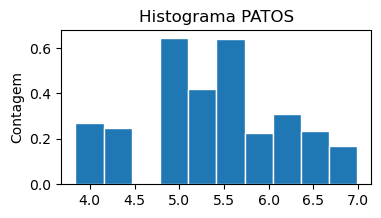


IGARASSU
count    749.000000
mean       4.810948
std        0.778364
min        3.150000
25%        4.140000
50%        4.990000
75%        5.390000
max        6.490000
Name: Valor de Venda, dtype: float64


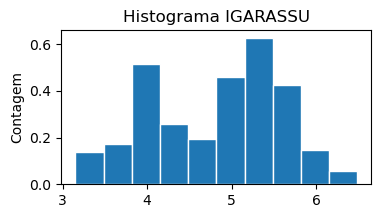


PARNAIBA
count    1207.000000
mean        5.416272
std         0.793493
min         3.990000
25%         4.990000
50%         5.450000
75%         5.890000
max         7.690000
Name: Valor de Venda, dtype: float64


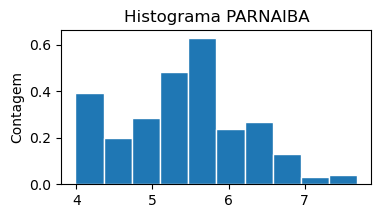


APUCARANA
count    811.000000
mean       5.414291
std        0.775997
min        3.790000
25%        4.990000
50%        5.590000
75%        5.970000
max        7.040000
Name: Valor de Venda, dtype: float64


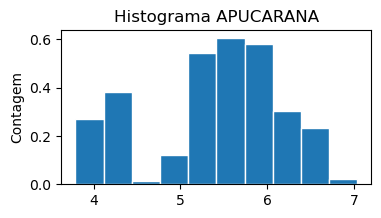


CAMBE
count    796.000000
mean       5.145704
std        0.917439
min        3.490000
25%        4.290000
50%        5.290000
75%        5.760000
max        6.990000
Name: Valor de Venda, dtype: float64


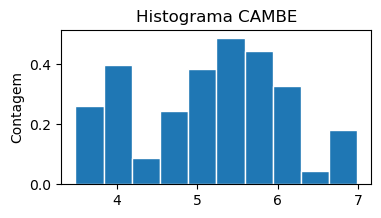


CAMPO LARGO
count    734.000000
mean       5.235014
std        0.644768
min        3.990000
25%        4.662500
50%        5.350000
75%        5.790000
max        6.590000
Name: Valor de Venda, dtype: float64


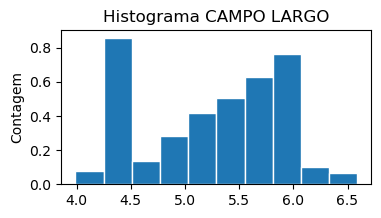


COLOMBO
count    1029.000000
mean        5.316259
std         0.662470
min         3.990000
25%         4.790000
50%         5.490000
75%         5.850000
max         6.690000
Name: Valor de Venda, dtype: float64


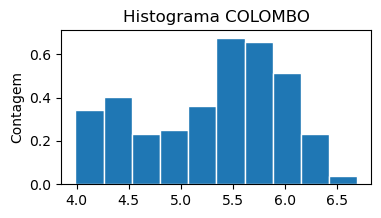


CURITIBA
count    4400.000000
mean        5.332686
std         0.718350
min         3.910000
25%         4.697500
50%         5.490000
75%         5.870000
max         7.640000
Name: Valor de Venda, dtype: float64


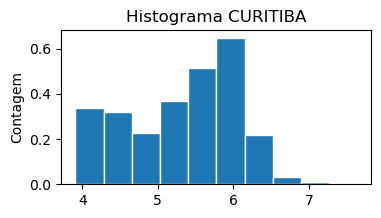


LONDRINA
count    1949.000000
mean        5.087989
std         0.795898
min         3.590000
25%         4.570000
50%         5.250000
75%         5.590000
max         7.290000
Name: Valor de Venda, dtype: float64


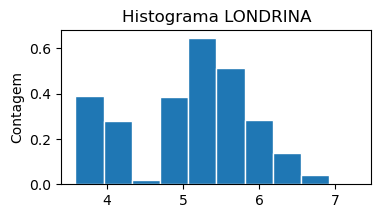


MARINGA
count    1694.000000
mean        5.315956
std         0.781787
min         3.690000
25%         4.490000
50%         5.490000
75%         5.955000
max         7.690000
Name: Valor de Venda, dtype: float64


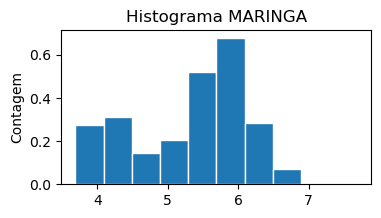


PARANAGUA
count    483.000000
mean       5.412091
std        0.747849
min        3.890000
25%        5.040000
50%        5.490000
75%        5.890000
max        6.980000
Name: Valor de Venda, dtype: float64


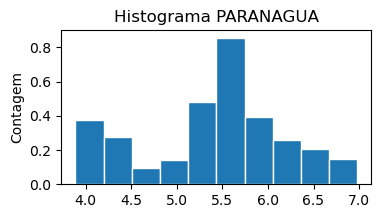


BARRA MANSA
count    1138.000000
mean        5.470545
std         0.567865
min         4.290000
25%         4.990000
50%         5.550000
75%         5.890000
max         6.860000
Name: Valor de Venda, dtype: float64


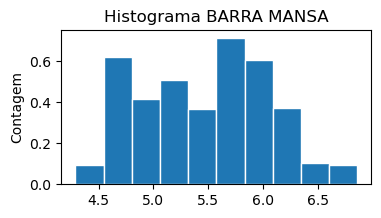


BELFORD ROXO
count    829.000000
mean       5.045621
std        0.621843
min        3.780000
25%        4.490000
50%        5.090000
75%        5.490000
max        6.790000
Name: Valor de Venda, dtype: float64


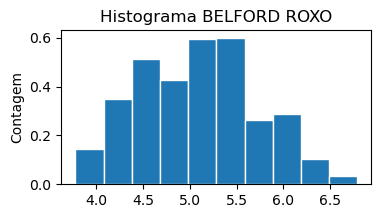


CABO FRIO
count    937.000000
mean       5.402199
std        0.578576
min        4.470000
25%        4.780000
50%        5.490000
75%        5.870000
max        6.890000
Name: Valor de Venda, dtype: float64


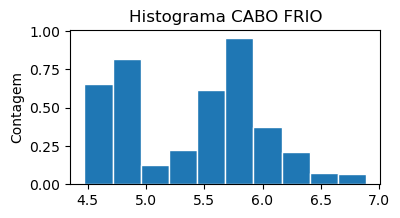


DUQUE DE CAXIAS
count    1960.000000
mean        5.032638
std         0.618917
min         3.790000
25%         4.490000
50%         5.090000
75%         5.470000
max         6.990000
Name: Valor de Venda, dtype: float64


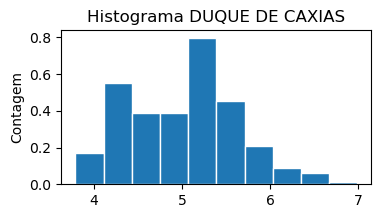


ITABORAI
count    1244.000000
mean        5.112822
std         0.624921
min         3.790000
25%         4.590000
50%         5.190000
75%         5.542500
max         7.570000
Name: Valor de Venda, dtype: float64


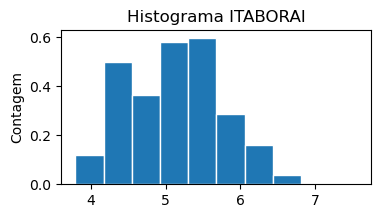


NOVA FRIBURGO
count    1039.000000
mean        5.243763
std         0.629973
min         3.790000
25%         4.590000
50%         5.290000
75%         5.690000
max         6.690000
Name: Valor de Venda, dtype: float64


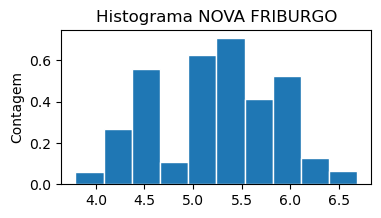


PETROPOLIS
count    1440.000000
mean        5.681493
std         0.548887
min         4.790000
25%         5.090000
50%         5.790000
75%         6.190000
max         6.990000
Name: Valor de Venda, dtype: float64


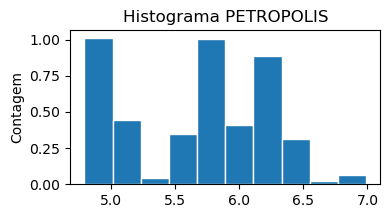


PARNAMIRIM
count    1061.000000
mean        5.293666
std         0.751319
min         3.760000
25%         4.490000
50%         5.460000
75%         5.790000
max         7.190000
Name: Valor de Venda, dtype: float64


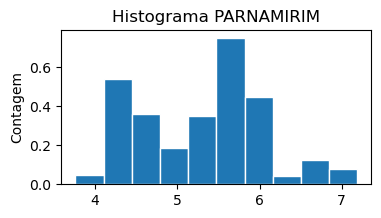


MOSSORO
count    1730.000000
mean        5.511936
std         0.709260
min         3.850000
25%         4.990000
50%         5.660000
75%         5.990000
max         8.970000
Name: Valor de Venda, dtype: float64


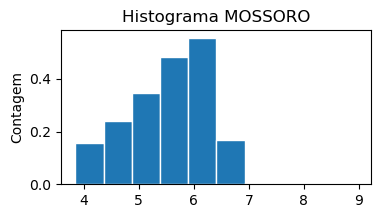


JI-PARANA
count    1046.000000
mean        6.054493
std         0.715056
min         4.340000
25%         5.550000
50%         5.840000
75%         6.690000
max         7.600000
Name: Valor de Venda, dtype: float64


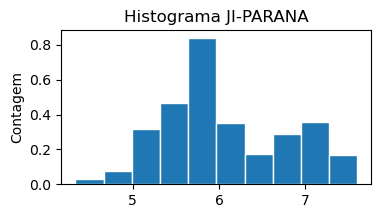


VILHENA
count    719.000000
mean       5.946662
std        0.754995
min        4.290000
25%        5.465000
50%        5.800000
75%        6.495000
max        7.400000
Name: Valor de Venda, dtype: float64


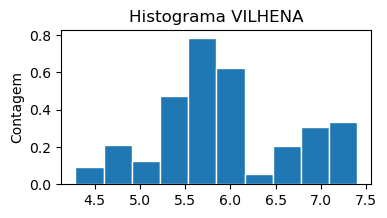


BENTO GONCALVES
count    804.000000
mean       5.455261
std        0.408057
min        4.390000
25%        5.090000
50%        5.490000
75%        5.690000
max        6.590000
Name: Valor de Venda, dtype: float64


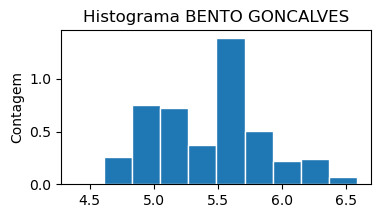


CACHOEIRINHA
count    693.000000
mean       5.309177
std        0.468855
min        4.050000
25%        4.990000
50%        5.290000
75%        5.490000
max        7.190000
Name: Valor de Venda, dtype: float64


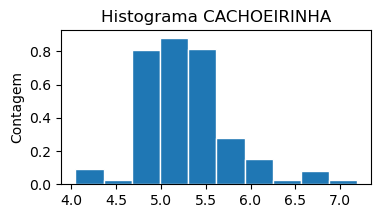


ERECHIM
count    960.000000
mean       5.452687
std        0.388843
min        4.390000
25%        5.190000
50%        5.410000
75%        5.690000
max        6.790000
Name: Valor de Venda, dtype: float64


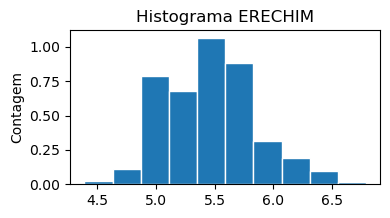


ESTEIO
count    748.000000
mean       5.278262
std        0.461150
min        4.190000
25%        4.990000
50%        5.260000
75%        5.590000
max        6.690000
Name: Valor de Venda, dtype: float64


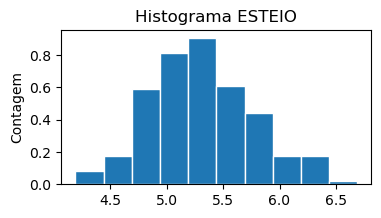


GRAVATAI
count    1251.000000
mean        5.172982
std         0.430956
min         3.690000
25%         4.890000
50%         5.190000
75%         5.460000
max         6.290000
Name: Valor de Venda, dtype: float64


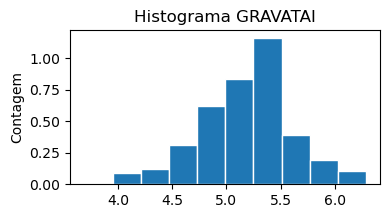


PORTO ALEGRE
count    3138.000000
mean        5.317014
std         0.482813
min         3.980000
25%         4.990000
50%         5.290000
75%         5.590000
max         7.190000
Name: Valor de Venda, dtype: float64


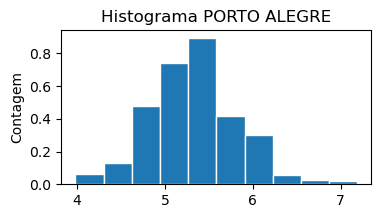


SAO GABRIEL
count    607.000000
mean       5.802290
std        0.419083
min        4.840000
25%        5.490000
50%        5.830000
75%        6.060000
max        6.890000
Name: Valor de Venda, dtype: float64


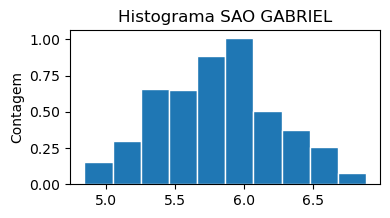


SAPUCAIA DO SUL
count    789.000000
mean       5.107490
std        0.431996
min        3.990000
25%        4.790000
50%        5.120000
75%        5.360000
max        6.490000
Name: Valor de Venda, dtype: float64


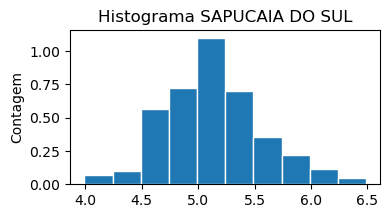


BALNEARIO CAMBORIU
count    723.000000
mean       5.521577
std        0.509685
min        3.990000
25%        5.270000
50%        5.520000
75%        5.840000
max        7.990000
Name: Valor de Venda, dtype: float64


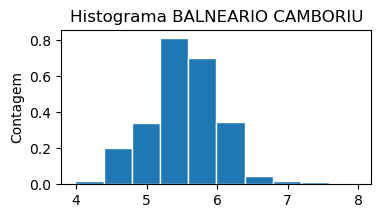


BIGUACU
count    766.000000
mean       5.449713
std        0.606163
min        3.990000
25%        5.260000
50%        5.540000
75%        5.870000
max        6.990000
Name: Valor de Venda, dtype: float64


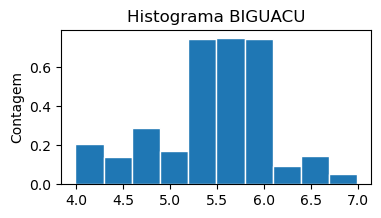


CHAPECO
count    1369.000000
mean        5.337611
std         0.507139
min         4.290000
25%         4.950000
50%         5.400000
75%         5.650000
max         6.690000
Name: Valor de Venda, dtype: float64


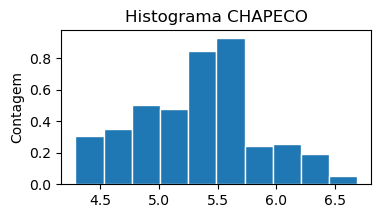


FLORIANOPOLIS
count    1401.000000
mean        5.460528
std         0.587039
min         3.990000
25%         4.990000
50%         5.490000
75%         5.890000
max         7.880000
Name: Valor de Venda, dtype: float64


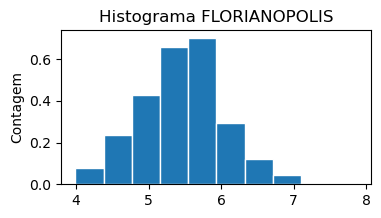


ITAJAI
count    1251.000000
mean        5.407058
std         0.536700
min         3.840000
25%         5.190000
50%         5.490000
75%         5.710000
max         6.690000
Name: Valor de Venda, dtype: float64


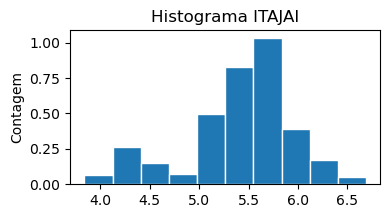


JOINVILLE
count    1646.000000
mean        5.385936
std         0.532932
min         3.990000
25%         5.090000
50%         5.470000
75%         5.740000
max         6.840000
Name: Valor de Venda, dtype: float64


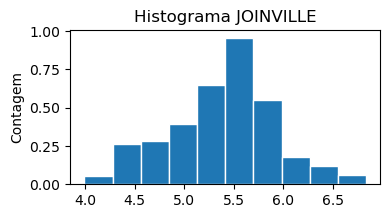


LAGUNA
count    726.000000
mean       5.462397
std        0.482956
min        4.190000
25%        5.180000
50%        5.390000
75%        5.787500
max        6.940000
Name: Valor de Venda, dtype: float64


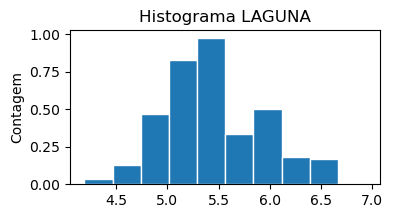


SAO JOSE
count    1257.000000
mean        5.417303
std         0.569083
min         3.890000
25%         5.090000
50%         5.460000
75%         5.860000
max         6.990000
Name: Valor de Venda, dtype: float64


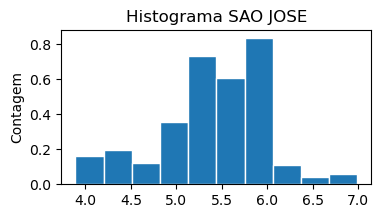


AMERICANA
count    1217.000000
mean        4.976278
std         0.901665
min         3.090000
25%         3.990000
50%         5.100000
75%         5.490000
max         6.990000
Name: Valor de Venda, dtype: float64


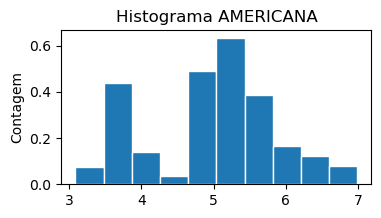


ARACATUBA
count    1255.000000
mean        4.974669
std         1.000692
min         3.090000
25%         3.890000
50%         5.190000
75%         5.690000
max         6.990000
Name: Valor de Venda, dtype: float64


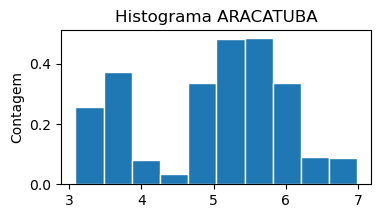


ARARAS
count    763.000000
mean       5.018729
std        0.856923
min        3.290000
25%        4.090000
50%        5.090000
75%        5.540000
max        7.190000
Name: Valor de Venda, dtype: float64


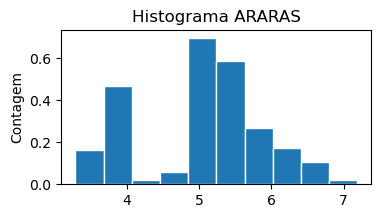


ASSIS
count    836.000000
mean       5.225120
std        0.893756
min        3.370000
25%        4.465000
50%        5.390000
75%        5.855000
max        7.190000
Name: Valor de Venda, dtype: float64


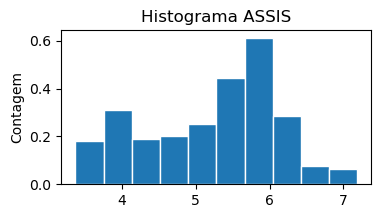


BARUERI
count    1257.000000
mean        5.463866
std         1.012543
min         3.290000
25%         4.890000
50%         5.490000
75%         6.250000
max         6.990000
Name: Valor de Venda, dtype: float64


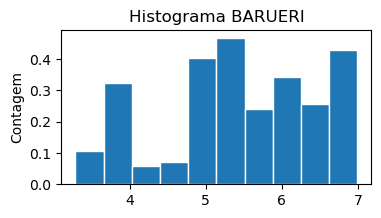


BIRIGUI
count    571.000000
mean       5.054273
std        0.946380
min        3.170000
25%        4.780000
50%        5.290000
75%        5.690000
max        6.890000
Name: Valor de Venda, dtype: float64


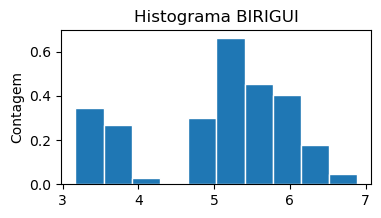


BOTUCATU
count    1006.000000
mean        5.022505
std         0.756264
min         3.490000
25%         4.780000
50%         5.230000
75%         5.512500
max         6.600000
Name: Valor de Venda, dtype: float64


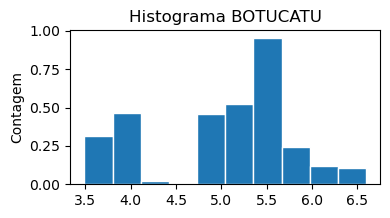


CAMPINAS
count    2492.000000
mean        5.161144
std         0.898936
min         3.290000
25%         4.490000
50%         5.290000
75%         5.690000
max         7.490000
Name: Valor de Venda, dtype: float64


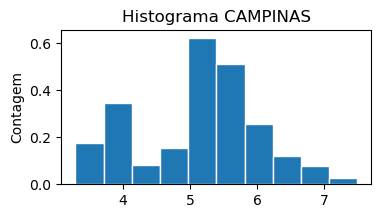


CARAPICUIBA
count    886.000000
mean       4.955959
std        0.819606
min        3.270000
25%        4.190000
50%        5.090000
75%        5.490000
max        6.690000
Name: Valor de Venda, dtype: float64


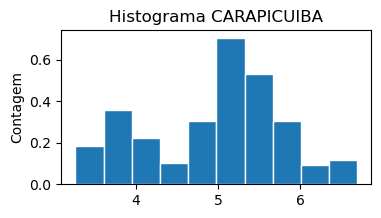


FRANCA
count    1801.00000
mean        4.91794
std         0.85907
min         3.34000
25%         3.94000
50%         5.14000
75%         5.49000
max         6.49000
Name: Valor de Venda, dtype: float64


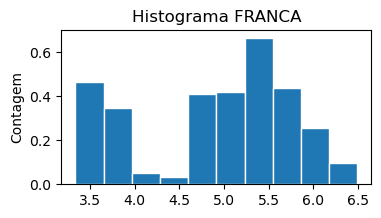


INDAIATUBA
count    1137.000000
mean        5.067792
std         0.815153
min         3.220000
25%         4.690000
50%         5.190000
75%         5.590000
max         7.890000
Name: Valor de Venda, dtype: float64


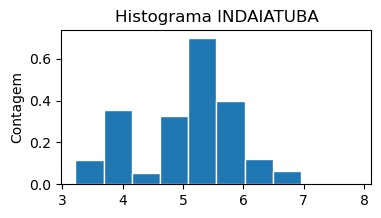


ITAPECERICA DA SERRA
count    803.000000
mean       5.057808
std        0.830840
min        3.390000
25%        4.590000
50%        5.190000
75%        5.590000
max        6.790000
Name: Valor de Venda, dtype: float64


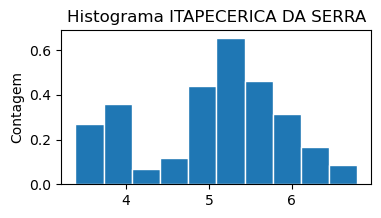


ITAPEVA
count    143.000000
mean       5.188042
std        0.878843
min        3.390000
25%        4.490000
50%        5.330000
75%        5.790000
max        7.050000
Name: Valor de Venda, dtype: float64


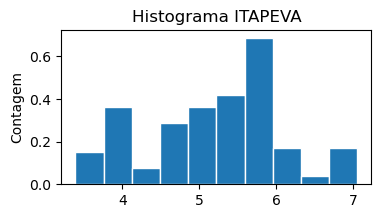


ITAPIRA
count    572.000000
mean       5.134843
std        0.742819
min        3.490000
25%        4.890000
50%        5.290000
75%        5.690000
max        6.690000
Name: Valor de Venda, dtype: float64


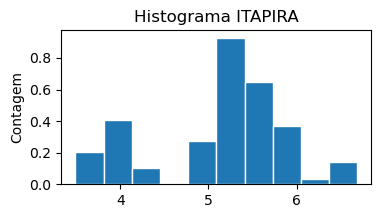


ITAQUAQUECETUBA
count    976.000000
mean       5.005451
std        0.857446
min        3.170000
25%        4.490000
50%        5.170000
75%        5.670000
max        6.790000
Name: Valor de Venda, dtype: float64


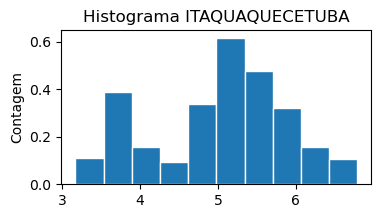


ITU
count    878.000000
mean       4.952608
std        0.868253
min        3.190000
25%        4.370000
50%        5.070000
75%        5.470000
max        7.390000
Name: Valor de Venda, dtype: float64


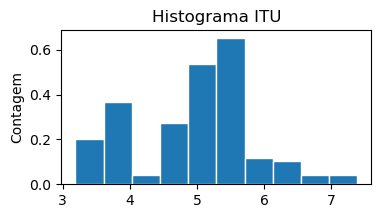


JACAREI
count    1271.000000
mean        4.784587
std         0.740067
min         3.310000
25%         3.990000
50%         4.970000
75%         5.240000
max         6.690000
Name: Valor de Venda, dtype: float64


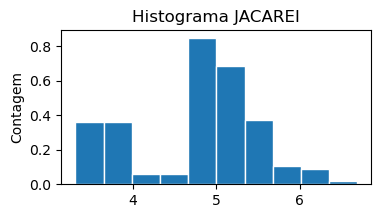


LEME
count    590.000000
mean       4.782017
std        0.746523
min        3.390000
25%        3.990000
50%        4.990000
75%        5.247500
max        6.750000
Name: Valor de Venda, dtype: float64


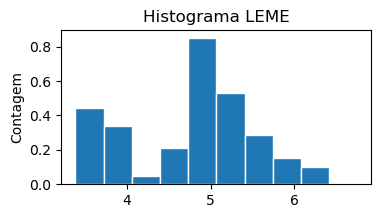


LINS
count    765.000000
mean       4.959542
std        0.922395
min        3.140000
25%        3.890000
50%        5.190000
75%        5.590000
max        6.990000
Name: Valor de Venda, dtype: float64


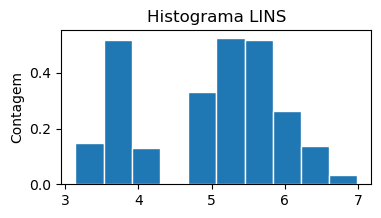


LORENA
count    653.000000
mean       4.883446
std        0.716721
min        3.570000
25%        4.090000
50%        5.090000
75%        5.390000
max        6.590000
Name: Valor de Venda, dtype: float64


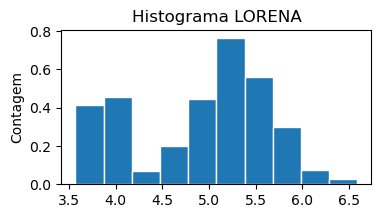


OSASCO
count    1608.000000
mean        5.069981
std         0.858543
min         3.290000
25%         4.490000
50%         5.190000
75%         5.590000
max         7.490000
Name: Valor de Venda, dtype: float64


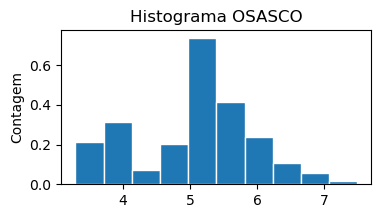


PINDAMONHANGABA
count    1007.000000
mean        4.941351
std         0.761724
min         3.460000
25%         4.665000
50%         5.070000
75%         5.390000
max         6.920000
Name: Valor de Venda, dtype: float64


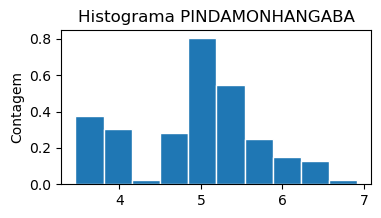


PIRASSUNUNGA
count    618.000000
mean       4.925146
std        0.809750
min        3.290000
25%        3.990000
50%        5.110000
75%        5.490000
max        6.990000
Name: Valor de Venda, dtype: float64


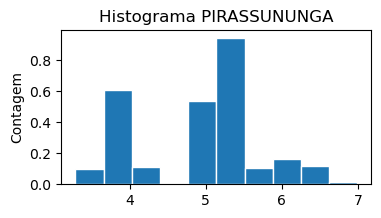


PRAIA GRANDE
count    1318.000000
mean        5.129924
std         0.832300
min         3.390000
25%         4.690000
50%         5.265000
75%         5.690000
max         7.490000
Name: Valor de Venda, dtype: float64


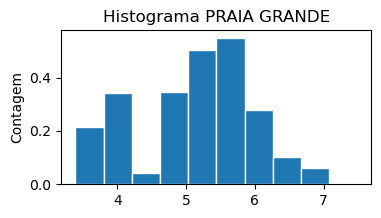


PRESIDENTE PRUDENTE
count    1438.000000
mean        4.985535
std         1.005903
min         3.060000
25%         3.790000
50%         5.190000
75%         5.790000
max         6.990000
Name: Valor de Venda, dtype: float64


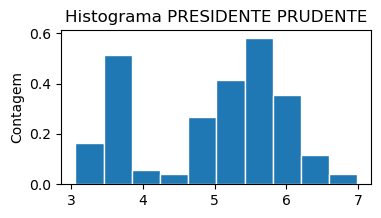


SAO BERNARDO DO CAMPO
count    1953.000000
mean        5.171982
std         0.911334
min         3.350000
25%         4.390000
50%         5.340000
75%         5.790000
max         7.990000
Name: Valor de Venda, dtype: float64


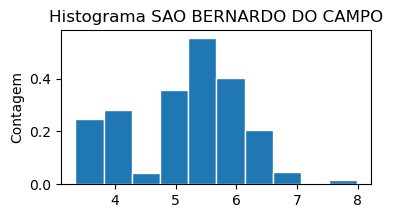


SAO CARLOS
count    1146.000000
mean        5.003010
std         0.833506
min         3.070000
25%         4.690000
50%         5.190000
75%         5.540000
max         6.700000
Name: Valor de Venda, dtype: float64


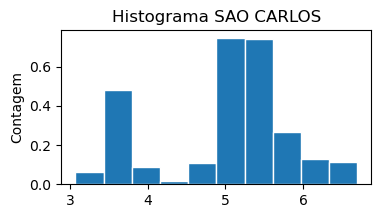


SAO JOSE DOS CAMPOS
count    1718.000000
mean        4.782969
std         0.788353
min         3.240000
25%         4.250000
50%         4.890000
75%         5.270000
max         7.490000
Name: Valor de Venda, dtype: float64


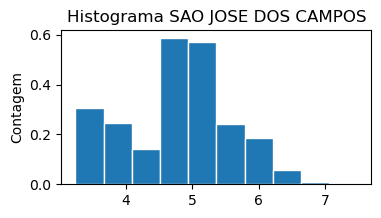


SUMARE
count    1461.000000
mean        4.967817
std         0.820850
min         3.170000
25%         4.590000
50%         5.090000
75%         5.490000
max         7.290000
Name: Valor de Venda, dtype: float64


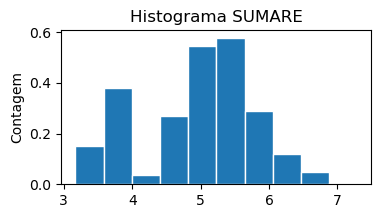


VARZEA PAULISTA
count    306.000000
mean       5.020882
std        0.732685
min        3.590000
25%        4.890000
50%        5.145000
75%        5.390000
max        6.940000
Name: Valor de Venda, dtype: float64


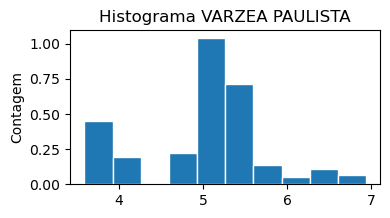


VINHEDO
count    745.000000
mean       5.149987
std        0.925924
min        3.280000
25%        4.460000
50%        5.290000
75%        5.790000
max        6.990000
Name: Valor de Venda, dtype: float64


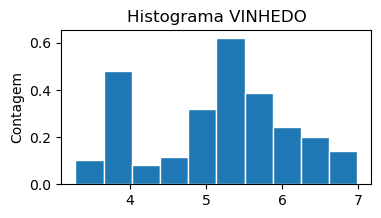


VOTORANTIM
count    211.000000
mean       5.040142
std        0.950322
min        3.250000
25%        4.190000
50%        5.290000
75%        5.900000
max        6.790000
Name: Valor de Venda, dtype: float64


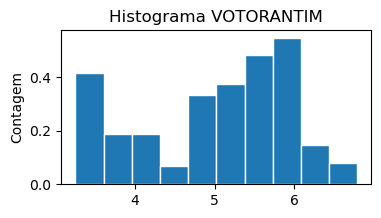


PALMAS
count    1608.000000
mean        5.477811
std         0.635234
min         3.990000
25%         5.080000
50%         5.680000
75%         5.890000
max         7.690000
Name: Valor de Venda, dtype: float64


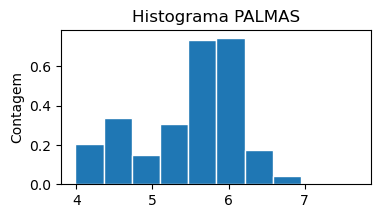


AGUAS LINDAS DE GOIAS
count    855.000000
mean       5.181649
std        0.867325
min        3.450000
25%        4.650000
50%        5.390000
75%        5.790000
max        7.490000
Name: Valor de Venda, dtype: float64


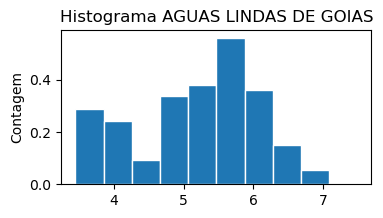


GOIATUBA
count    333.000000
mean       4.880871
std        0.752168
min        3.470000
25%        4.090000
50%        5.080000
75%        5.350000
max        6.290000
Name: Valor de Venda, dtype: float64


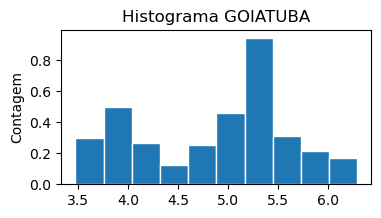


VALPARAISO DE GOIAS
count    797.000000
mean       5.055684
std        0.817377
min        3.490000
25%        4.090000
50%        5.290000
75%        5.590000
max        6.590000
Name: Valor de Venda, dtype: float64


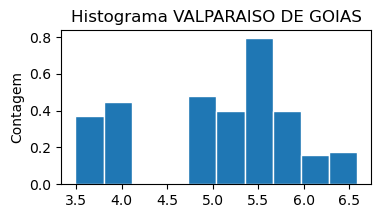


CONCEICAO DO ARAGUAIA
count    456.000000
mean       6.276250
std        0.522324
min        5.000000
25%        5.890000
50%        6.120000
75%        6.755000
max        7.390000
Name: Valor de Venda, dtype: float64


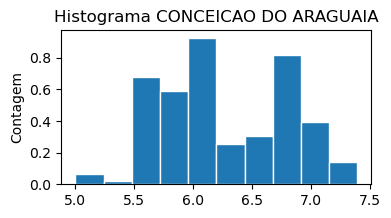


TEOFILO OTONI
count    456.000000
mean       4.996557
std        0.774576
min        3.480000
25%        4.090000
50%        5.190000
75%        5.590000
max        6.570000
Name: Valor de Venda, dtype: float64


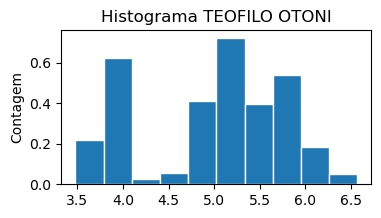


RIO BRANCO
count    1322.000000
mean        5.958245
std         0.790671
min         4.150000
25%         5.390000
50%         5.990000
75%         6.590000
max         7.750000
Name: Valor de Venda, dtype: float64


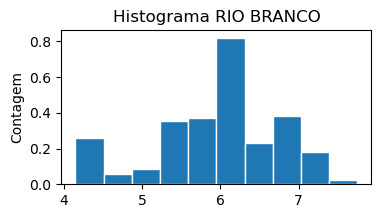


PALMEIRA DOS INDIOS
count    612.000000
mean       5.691699
std        0.685812
min        3.990000
25%        5.300000
50%        5.810000
75%        6.080000
max        6.990000
Name: Valor de Venda, dtype: float64


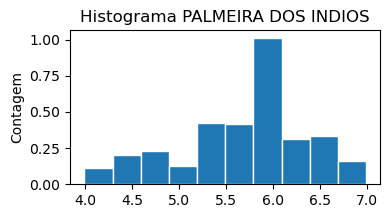


ALAGOINHAS
count    918.000000
mean       5.138791
std        0.674983
min        3.890000
25%        4.560000
50%        5.240000
75%        5.597500
max        7.190000
Name: Valor de Venda, dtype: float64


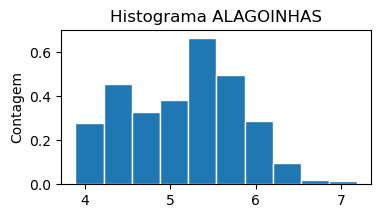


JACOBINA
count    785.000000
mean       5.486866
std        0.650794
min        4.170000
25%        5.260000
50%        5.620000
75%        5.840000
max        7.190000
Name: Valor de Venda, dtype: float64


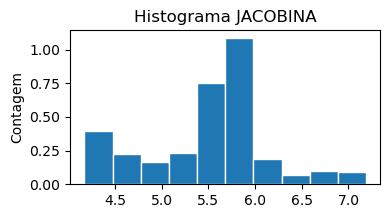


SIMOES FILHO
count    168.000000
mean       5.125238
std        0.644982
min        3.790000
25%        4.562500
50%        5.290000
75%        5.512500
max        6.850000
Name: Valor de Venda, dtype: float64


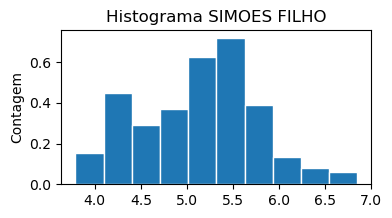


CAMACARI
count    588.000000
mean       5.189660
std        0.693254
min        3.920000
25%        4.490000
50%        5.330000
75%        5.660000
max        6.990000
Name: Valor de Venda, dtype: float64


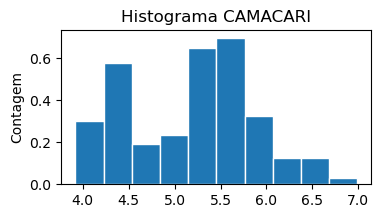


QUIXADA
count    534.000000
mean       5.477547
std        0.612427
min        4.550000
25%        4.780000
50%        5.580000
75%        5.970000
max        6.950000
Name: Valor de Venda, dtype: float64


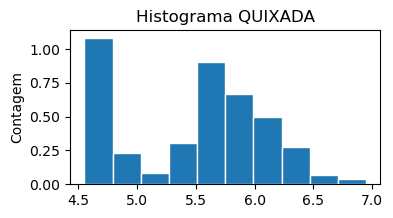


SERRA
count    1402.000000
mean        5.289729
std         0.523015
min         3.990000
25%         4.950000
50%         5.380000
75%         5.650000
max         6.590000
Name: Valor de Venda, dtype: float64


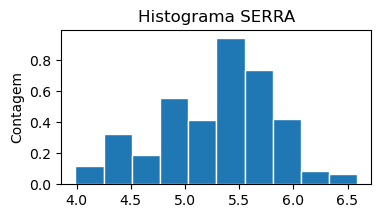


GOIANIA
count    2936.000000
mean        5.098539
std         0.804980
min         3.220000
25%         4.350000
50%         5.290000
75%         5.740000
max         8.040000
Name: Valor de Venda, dtype: float64


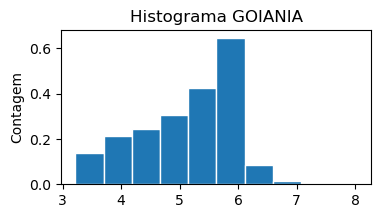


PORANGATU
count    616.000000
mean       5.239432
std        0.867214
min        3.090000
25%        4.190000
50%        5.490000
75%        5.790000
max        6.950000
Name: Valor de Venda, dtype: float64


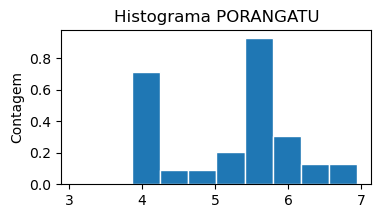


GUAXUPE
count    663.000000
mean       4.994329
std        0.792553
min        3.450000
25%        4.775000
50%        5.140000
75%        5.490000
max        6.490000
Name: Valor de Venda, dtype: float64


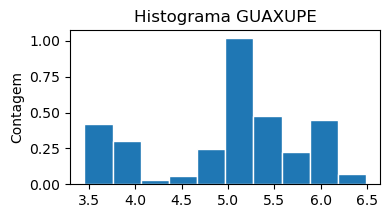


JUIZ DE FORA
count    1603.000000
mean        5.168721
std         0.719589
min         3.640000
25%         4.510000
50%         5.360000
75%         5.670000
max         7.190000
Name: Valor de Venda, dtype: float64


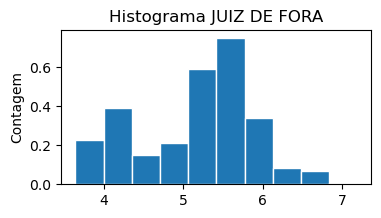


PASSOS
count    984.000000
mean       5.088445
std        0.829814
min        3.550000
25%        4.680000
50%        5.185000
75%        5.750000
max        8.990000
Name: Valor de Venda, dtype: float64


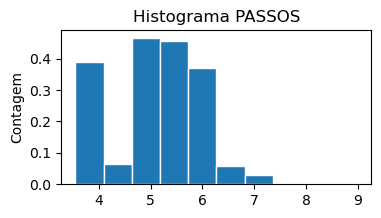


POUSO ALEGRE
count    623.00000
mean       5.05825
std        0.84537
min        3.54000
25%        4.09000
50%        5.24000
75%        5.79000
max        6.49000
Name: Valor de Venda, dtype: float64


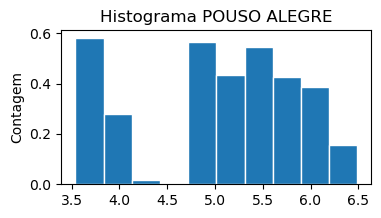


SAO SEBASTIAO DO PARAISO
count    761.000000
mean       5.342760
std        0.824606
min        3.900000
25%        4.940000
50%        5.500000
75%        5.890000
max        7.890000
Name: Valor de Venda, dtype: float64


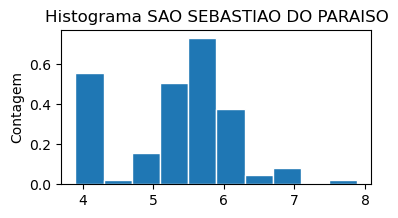


CABO DE SANTO AGOSTINHO
count    431.000000
mean       4.953619
std        0.679316
min        3.150000
25%        4.290000
50%        5.090000
75%        5.490000
max        6.390000
Name: Valor de Venda, dtype: float64


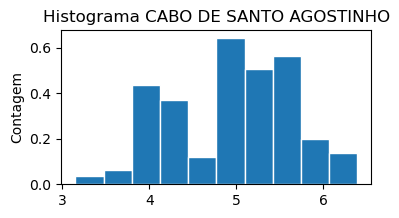


GOIANA
count    185.000000
mean       4.769135
std        0.687790
min        3.150000
25%        4.180000
50%        4.880000
75%        5.170000
max        6.490000
Name: Valor de Venda, dtype: float64


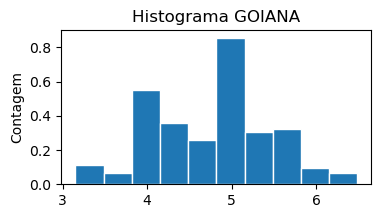


CAMPO MOURAO
count    574.000000
mean       4.872561
std        0.781566
min        3.390000
25%        4.590000
50%        5.040000
75%        5.390000
max        6.990000
Name: Valor de Venda, dtype: float64


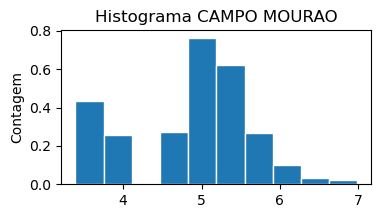


CIANORTE
count    715.000000
mean       5.030937
std        0.713424
min        3.870000
25%        4.190000
50%        5.290000
75%        5.590000
max        6.590000
Name: Valor de Venda, dtype: float64


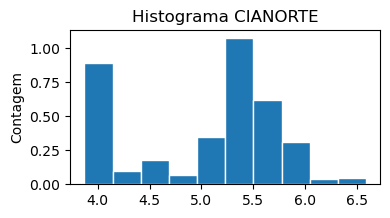


PATO BRANCO
count    677.000000
mean       5.143693
std        0.708556
min        3.900000
25%        4.290000
50%        5.330000
75%        5.590000
max        6.790000
Name: Valor de Venda, dtype: float64


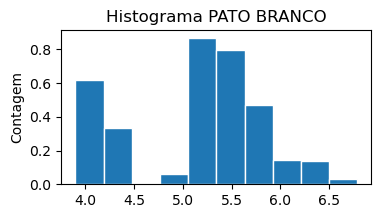


PINHAIS
count    661.000000
mean       5.237731
std        0.694184
min        3.990000
25%        4.490000
50%        5.390000
75%        5.790000
max        6.550000
Name: Valor de Venda, dtype: float64


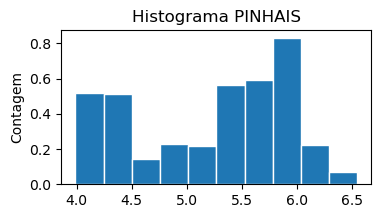


SANTO ANTONIO DE PADUA
count    896.000000
mean       5.265770
std        0.635843
min        3.780000
25%        4.860000
50%        5.350000
75%        5.620000
max        6.690000
Name: Valor de Venda, dtype: float64


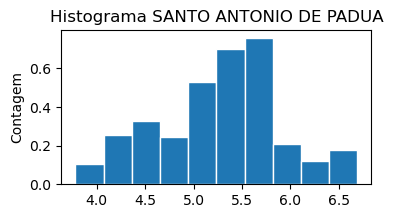


VIAMAO
count    807.000000
mean       5.393928
std        0.364619
min        4.250000
25%        5.190000
50%        5.400000
75%        5.590000
max        6.790000
Name: Valor de Venda, dtype: float64


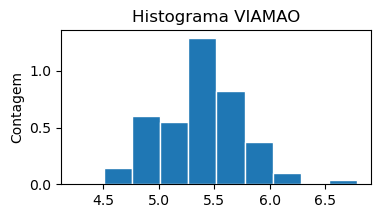


LAGARTO
count    637.000000
mean       5.063658
std        0.555380
min        3.750000
25%        4.780000
50%        5.140000
75%        5.430000
max        6.250000
Name: Valor de Venda, dtype: float64


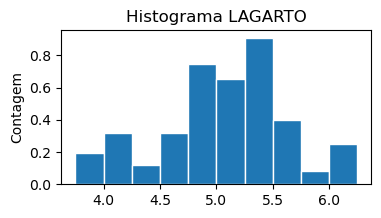


NOSSA SENHORA DO SOCORRO
count    739.000000
mean       5.187429
std        0.669719
min        3.990000
25%        4.680000
50%        5.190000
75%        5.590000
max        6.980000
Name: Valor de Venda, dtype: float64


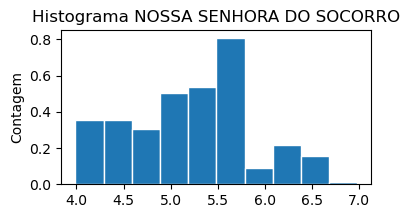


ATIBAIA
count    1371.000000
mean        5.095945
std         0.786175
min         3.390000
25%         4.680000
50%         5.190000
75%         5.590000
max         6.990000
Name: Valor de Venda, dtype: float64


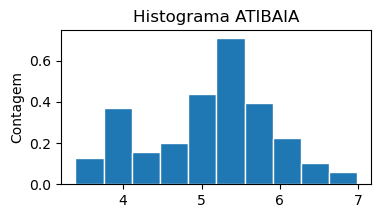


CARAGUATATUBA
count    960.000000
mean       5.232010
std        0.751905
min        3.670000
25%        4.990000
50%        5.435000
75%        5.690000
max        6.880000
Name: Valor de Venda, dtype: float64


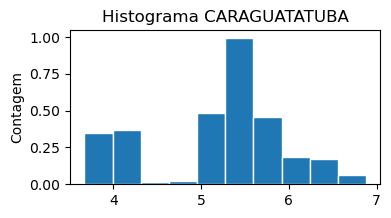


JAU
count    815.000000
mean       4.999730
std        0.885613
min        3.390000
25%        3.990000
50%        5.190000
75%        5.540000
max        6.970000
Name: Valor de Venda, dtype: float64


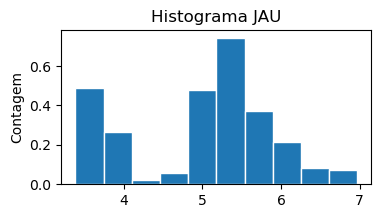


PIRACICABA
count    1675.000000
mean        5.063809
std         0.805333
min         3.090000
25%         4.790000
50%         5.220000
75%         5.590000
max         7.190000
Name: Valor de Venda, dtype: float64


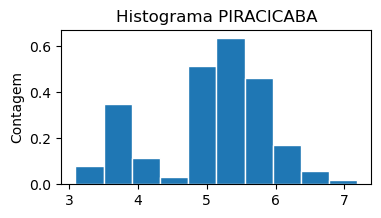


SANTO ANTONIO DE JESUS
count    846.000000
mean       5.292695
std        0.634238
min        3.890000
25%        4.780000
50%        5.490000
75%        5.790000
max        6.520000
Name: Valor de Venda, dtype: float64


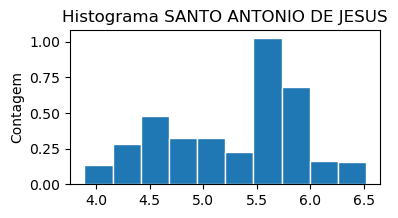


CACHOEIRO DE ITAPEMIRIM
count    817.000000
mean       5.647099
std        0.613627
min        3.990000
25%        5.350000
50%        5.720000
75%        6.090000
max        6.990000
Name: Valor de Venda, dtype: float64


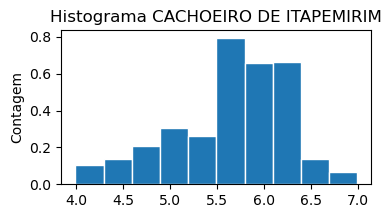


SAO JOSE DOS PINHAIS
count    1237.000000
mean        5.297890
std         0.677465
min         4.010000
25%         4.790000
50%         5.490000
75%         5.850000
max         6.490000
Name: Valor de Venda, dtype: float64


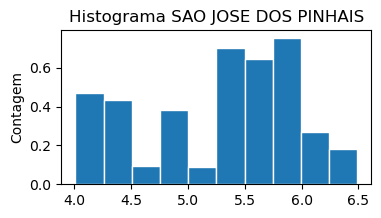


ITAGUAI
count    746.000000
mean       5.061408
std        0.661211
min        3.880000
25%        4.390000
50%        5.190000
75%        5.490000
max        7.890000
Name: Valor de Venda, dtype: float64


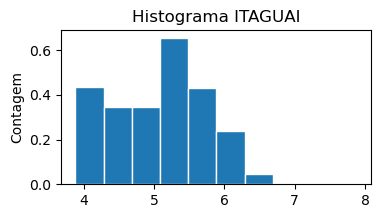


OSORIO
count    279.000000
mean       5.222294
std        0.498977
min        3.990000
25%        4.880000
50%        5.190000
75%        5.490000
max        6.990000
Name: Valor de Venda, dtype: float64


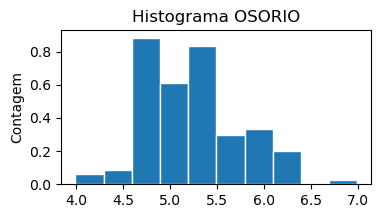


ITABAIANA
count    521.000000
mean       5.138944
std        0.444935
min        3.900000
25%        4.930000
50%        5.190000
75%        5.400000
max        6.320000
Name: Valor de Venda, dtype: float64


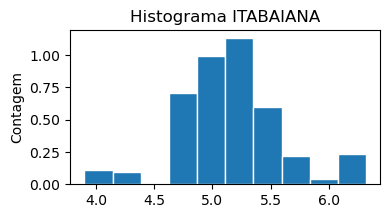


BARRETOS
count    625.000000
mean       5.146720
std        0.964887
min        2.970000
25%        4.090000
50%        5.400000
75%        5.890000
max        7.290000
Name: Valor de Venda, dtype: float64


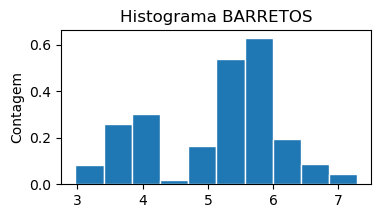


BRAGANCA PAULISTA
count    992.000000
mean       5.083911
std        0.859975
min        3.390000
25%        4.660000
50%        5.190000
75%        5.590000
max        7.070000
Name: Valor de Venda, dtype: float64


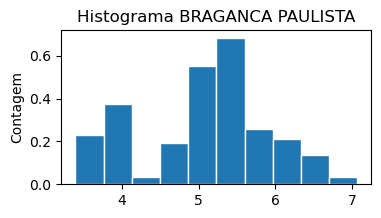


ITATIBA
count    968.000000
mean       5.078874
std        0.881840
min        3.090000
25%        4.460000
50%        5.240000
75%        5.690000
max        8.190000
Name: Valor de Venda, dtype: float64


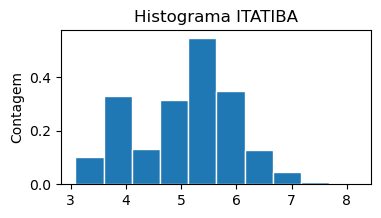


LIMEIRA
count    1322.000000
mean        4.899592
std         0.835241
min         2.990000
25%         3.990000
50%         5.090000
75%         5.490000
max         7.590000
Name: Valor de Venda, dtype: float64


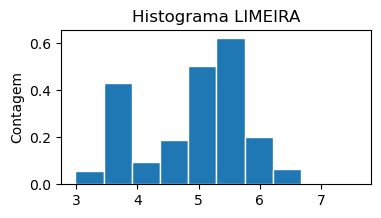


TATUI
count    557.000000
mean       5.349569
std        0.875300
min        3.490000
25%        4.950000
50%        5.490000
75%        5.990000
max        7.140000
Name: Valor de Venda, dtype: float64


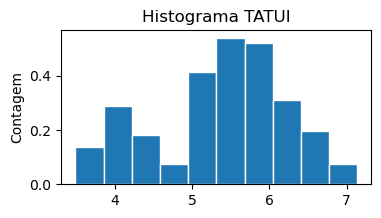


VITORIA DE SANTO ANTAO
count    709.000000
mean       4.794118
std        0.664846
min        3.150000
25%        4.190000
50%        4.890000
75%        5.280000
max        6.390000
Name: Valor de Venda, dtype: float64


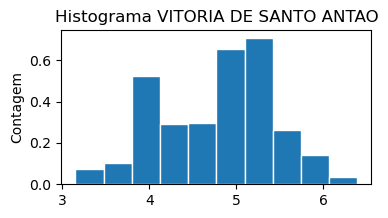


AMARANTE DO MARANHAO
count    16.000000
mean      4.663750
std       0.299664
min       4.290000
25%       4.515000
50%       4.620000
75%       4.785000
max       5.190000
Name: Valor de Venda, dtype: float64


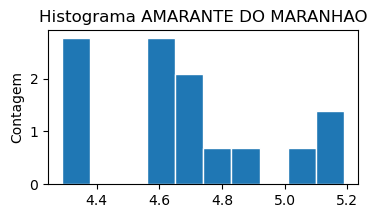


JEQUIE
count    1024.000000
mean        5.554336
std         0.734329
min         4.150000
25%         4.797500
50%         5.650000
75%         5.990000
max         7.900000
Name: Valor de Venda, dtype: float64


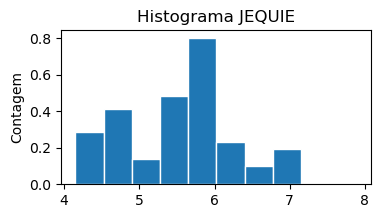


VALENCA
count    978.000000
mean       5.497791
std        0.611895
min        4.240000
25%        4.990000
50%        5.620000
75%        5.970000
max        7.090000
Name: Valor de Venda, dtype: float64


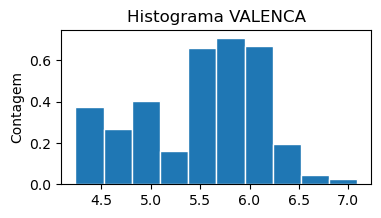


MORRINHOS
count    425.000000
mean       4.952565
std        0.797559
min        3.490000
25%        4.090000
50%        5.090000
75%        5.580000
max        6.240000
Name: Valor de Venda, dtype: float64


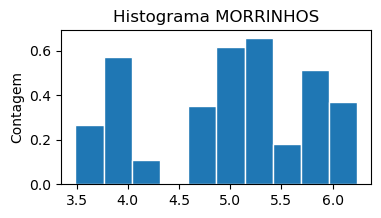


PORTO NACIONAL
count    732.000000
mean       5.298497
std        0.500467
min        4.300000
25%        4.920000
50%        5.390000
75%        5.640000
max        6.490000
Name: Valor de Venda, dtype: float64


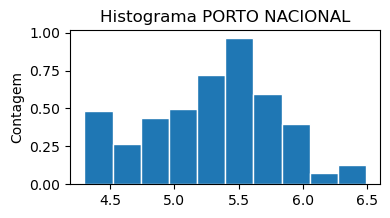


JOAO PINHEIRO
count    777.000000
mean       5.102291
std        0.764058
min        3.630000
25%        4.840000
50%        5.330000
75%        5.690000
max        6.490000
Name: Valor de Venda, dtype: float64


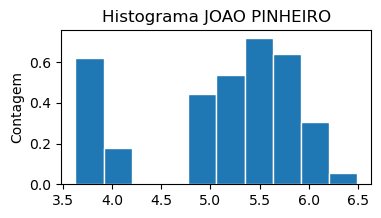


ARCOVERDE
count    556.000000
mean       5.048183
std        0.499466
min        3.990000
25%        4.690000
50%        5.180000
75%        5.390000
max        6.100000
Name: Valor de Venda, dtype: float64


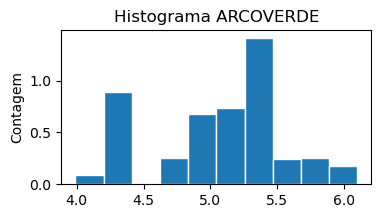


XANXERE
count    664.000000
mean       5.519127
std        0.434031
min        4.490000
25%        5.147500
50%        5.570000
75%        5.750000
max        6.990000
Name: Valor de Venda, dtype: float64


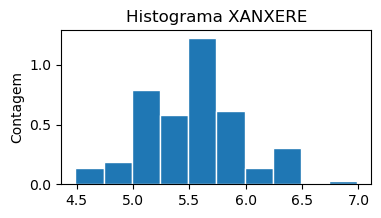


AVARE
count    705.000000
mean       4.989603
std        0.897294
min        3.290000
25%        3.990000
50%        5.190000
75%        5.490000
max        6.990000
Name: Valor de Venda, dtype: float64


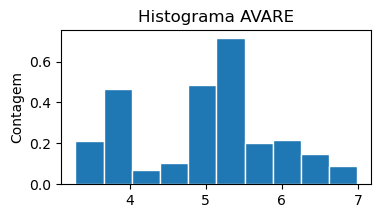


OURINHOS
count    686.000000
mean       5.168673
std        0.994401
min        3.390000
25%        4.290000
50%        5.390000
75%        5.840000
max        9.000000
Name: Valor de Venda, dtype: float64


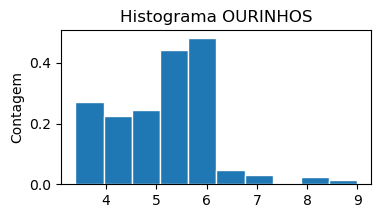


SERRINHA
count    721.000000
mean       5.304799
std        0.624102
min        3.990000
25%        4.890000
50%        5.290000
75%        5.780000
max        8.880000
Name: Valor de Venda, dtype: float64


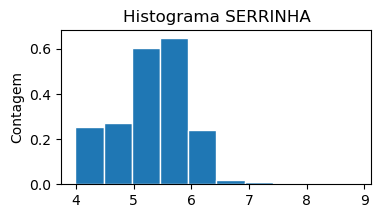


MINEIROS
count    754.000000
mean       5.362626
std        0.767553
min        3.790000
25%        5.090000
50%        5.500000
75%        5.890000
max        6.840000
Name: Valor de Venda, dtype: float64


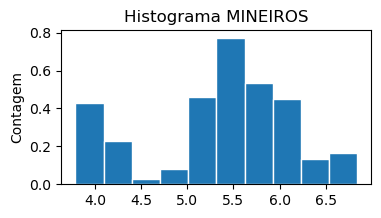


BACABAL
count    464.000000
mean       5.311509
std        0.443819
min        4.350000
25%        4.950000
50%        5.290000
75%        5.527500
max        7.980000
Name: Valor de Venda, dtype: float64


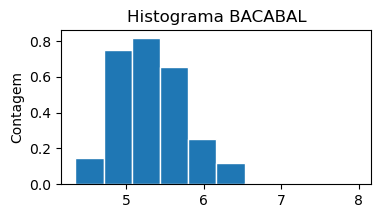


CORUMBA
count    546.000000
mean       6.061502
std        0.702296
min        4.490000
25%        5.730000
50%        6.190000
75%        6.350000
max        7.570000
Name: Valor de Venda, dtype: float64


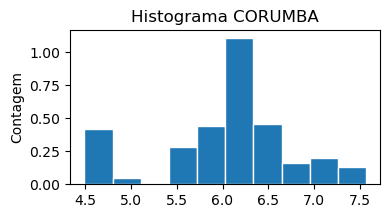


CASTRO
count    751.000000
mean       5.267603
std        0.646054
min        3.770000
25%        4.950000
50%        5.390000
75%        5.690000
max        6.790000
Name: Valor de Venda, dtype: float64


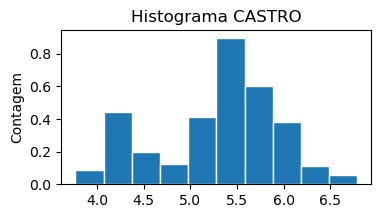


IJUI
count    822.000000
mean       5.532774
std        0.397706
min        4.650000
25%        5.240000
50%        5.460000
75%        5.790000
max        6.590000
Name: Valor de Venda, dtype: float64


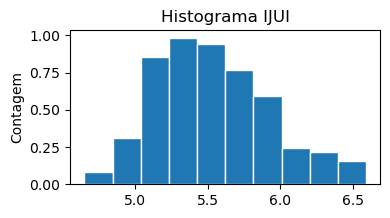


CAXIAS
count    384.000000
mean       5.172057
std        0.476793
min        4.390000
25%        4.850000
50%        5.135000
75%        5.430000
max        6.790000
Name: Valor de Venda, dtype: float64


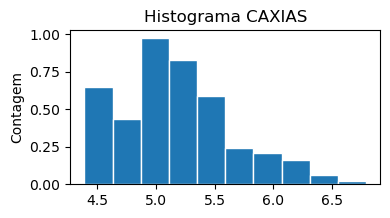


SAO MATEUS
count    507.000000
mean       5.366312
std        0.497299
min        3.990000
25%        4.990000
50%        5.390000
75%        5.790000
max        6.590000
Name: Valor de Venda, dtype: float64


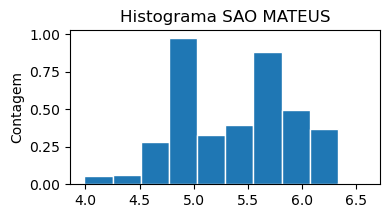


JAGUAQUARA
count    258.000000
mean       5.373450
std        0.630115
min        4.280000
25%        4.790000
50%        5.495000
75%        5.780000
max        6.940000
Name: Valor de Venda, dtype: float64


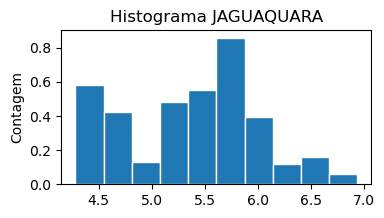


DELMIRO GOUVEIA
count    824.000000
mean       6.204187
std        0.760128
min        4.650000
25%        5.790000
50%        6.280000
75%        6.740000
max        7.690000
Name: Valor de Venda, dtype: float64


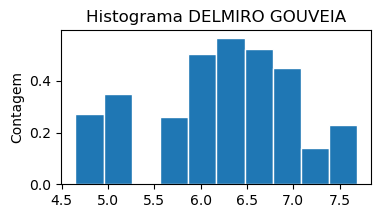


ITACOATIARA
count    95.000000
mean      6.416526
std       0.631854
min       5.290000
25%       6.065000
50%       6.250000
75%       6.565000
max       8.150000
Name: Valor de Venda, dtype: float64


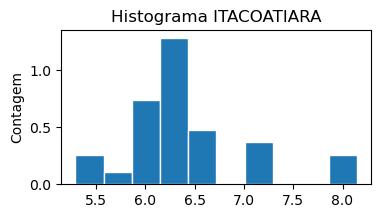


APARECIDA DE GOIANIA
count    1631.000000
mean        5.093378
std         0.782438
min         3.290000
25%         4.470000
50%         5.270000
75%         5.770000
max         6.390000
Name: Valor de Venda, dtype: float64


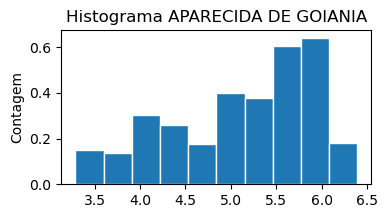


PARACATU
count    745.000000
mean       5.207289
std        0.856478
min        3.540000
25%        4.850000
50%        5.440000
75%        5.890000
max        6.790000
Name: Valor de Venda, dtype: float64


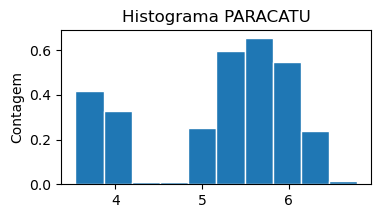


VARGINHA
count    451.000000
mean       4.896984
std        0.825676
min        3.450000
25%        3.975000
50%        5.090000
75%        5.450000
max        6.590000
Name: Valor de Venda, dtype: float64


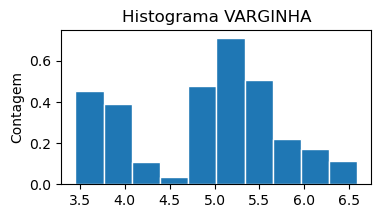


TRES RIOS
count    569.000000
mean       5.681775
std        0.533685
min        4.690000
25%        5.190000
50%        5.690000
75%        6.190000
max        7.390000
Name: Valor de Venda, dtype: float64


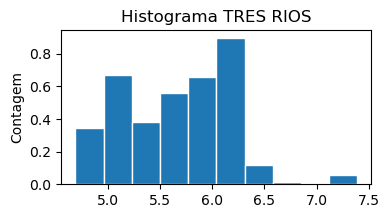


CACHOEIRA DO SUL
count    606.000000
mean       5.285215
std        0.368172
min        4.350000
25%        5.050000
50%        5.250000
75%        5.420000
max        6.590000
Name: Valor de Venda, dtype: float64


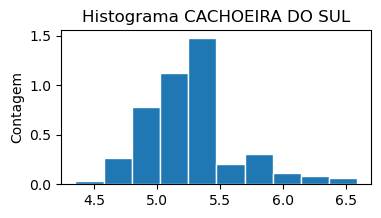


URUGUAIANA
count    505.000000
mean       5.701505
std        0.332481
min        4.630000
25%        5.470000
50%        5.710000
75%        5.950000
max        6.570000
Name: Valor de Venda, dtype: float64


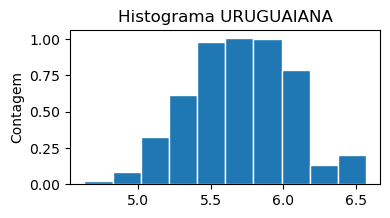


JABOTICABAL
count    752.000000
mean       5.117234
std        0.861714
min        3.290000
25%        4.800000
50%        5.400000
75%        5.790000
max        6.990000
Name: Valor de Venda, dtype: float64


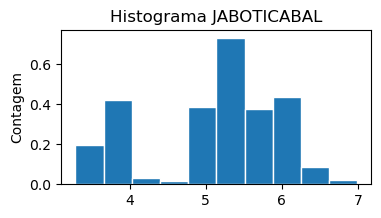


VITORIA DA CONQUISTA
count    1235.000000
mean        5.599320
std         0.596404
min         4.620000
25%         4.920000
50%         5.780000
75%         6.090000
max         6.940000
Name: Valor de Venda, dtype: float64


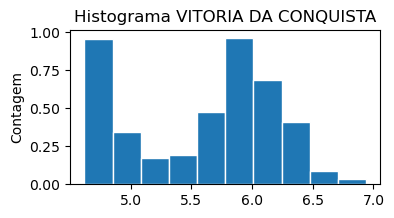


ALEGRETE
count    585.000000
mean       5.710137
std        0.313443
min        4.890000
25%        5.490000
50%        5.750000
75%        5.890000
max        6.790000
Name: Valor de Venda, dtype: float64


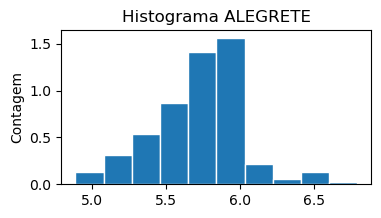


PARAGUACU PAULISTA
count    457.000000
mean       4.864508
std        0.839402
min        3.290000
25%        3.890000
50%        5.150000
75%        5.490000
max        6.640000
Name: Valor de Venda, dtype: float64


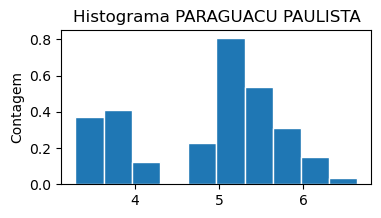


TUPA
count    470.000000
mean       5.023553
std        0.911532
min        2.990000
25%        3.990000
50%        5.190000
75%        5.650000
max        6.850000
Name: Valor de Venda, dtype: float64


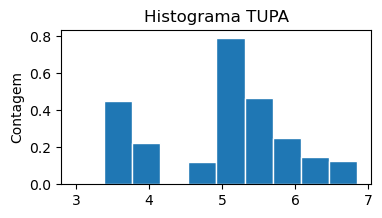


UBATUBA
count    569.000000
mean       5.201265
std        0.800790
min        3.570000
25%        4.390000
50%        5.290000
75%        5.690000
max        6.990000
Name: Valor de Venda, dtype: float64


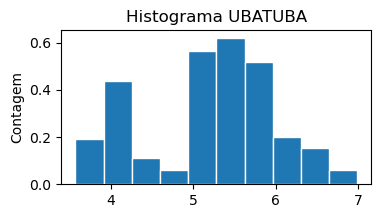


ITAPERUNA
count    279.000000
mean       5.539427
std        0.632990
min        4.090000
25%        5.190000
50%        5.890000
75%        5.990000
max        6.700000
Name: Valor de Venda, dtype: float64


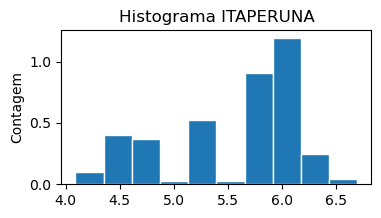


IRECE
count    317.000000
mean       5.301293
std        0.641243
min        4.100000
25%        4.950000
50%        5.350000
75%        5.650000
max        6.940000
Name: Valor de Venda, dtype: float64


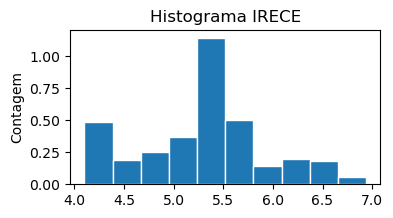


SANTA INES
count    507.000000
mean       5.345562
std        0.495468
min        4.290000
25%        4.950000
50%        5.350000
75%        5.725000
max        6.920000
Name: Valor de Venda, dtype: float64


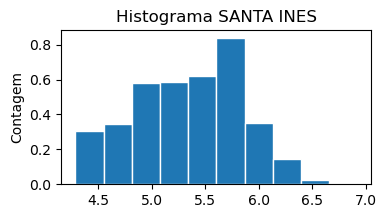


JOAO MONLEVADE
count    630.000000
mean       5.148016
std        0.698103
min        3.590000
25%        4.890000
50%        5.290000
75%        5.650000
max        6.650000
Name: Valor de Venda, dtype: float64


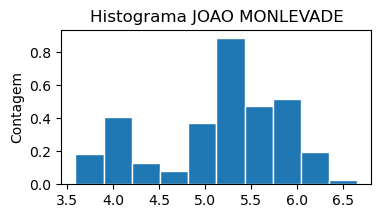


OLIVEIRA
count    584.000000
mean       5.052671
std        0.707209
min        3.590000
25%        4.490000
50%        5.250000
75%        5.580000
max        6.490000
Name: Valor de Venda, dtype: float64


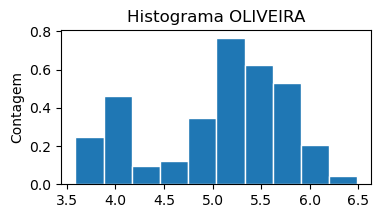


PATROCINIO
count    670.000000
mean       5.259940
std        0.790757
min        3.680000
25%        4.535000
50%        5.455000
75%        5.790000
max        6.790000
Name: Valor de Venda, dtype: float64


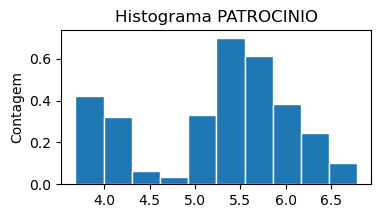


BRAGANCA
count    506.000000
mean       5.718261
std        0.582935
min        4.400000
25%        5.380000
50%        5.590000
75%        6.140000
max        6.920000
Name: Valor de Venda, dtype: float64


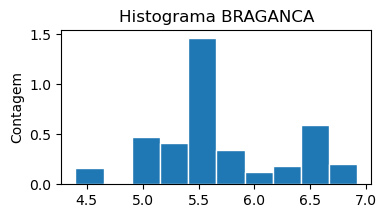


XINGUARA
count    464.000000
mean       6.153815
std        0.564152
min        5.050000
25%        5.920000
50%        6.200000
75%        6.505000
max        8.910000
Name: Valor de Venda, dtype: float64


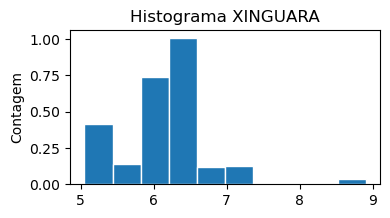


BELO JARDIM
count    398.000000
mean       4.925251
std        0.512912
min        3.890000
25%        4.690000
50%        5.070000
75%        5.270000
max        6.170000
Name: Valor de Venda, dtype: float64


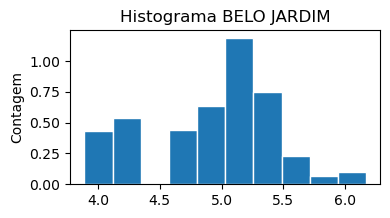


UNIAO DA VITORIA
count    570.000000
mean       5.311474
std        0.665219
min        3.970000
25%        4.940000
50%        5.560000
75%        5.790000
max        6.440000
Name: Valor de Venda, dtype: float64


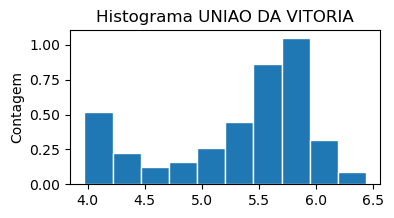


BARRA DO PIRAI
count    571.000000
mean       5.625972
std        0.575376
min        4.450000
25%        4.990000
50%        5.790000
75%        5.990000
max        6.890000
Name: Valor de Venda, dtype: float64


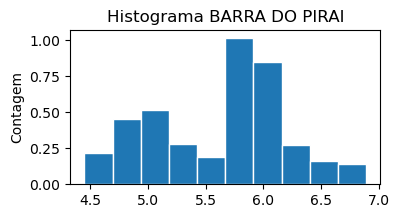


CAICO
count    645.000000
mean       5.726899
std        0.617257
min        4.190000
25%        5.290000
50%        5.790000
75%        6.090000
max        7.390000
Name: Valor de Venda, dtype: float64


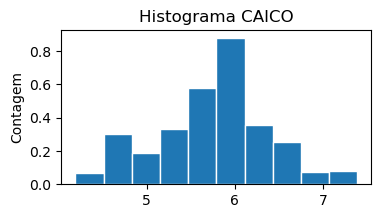


DRACENA
count    538.000000
mean       4.929275
std        0.757466
min        3.490000
25%        4.117500
50%        5.200000
75%        5.460000
max        6.390000
Name: Valor de Venda, dtype: float64


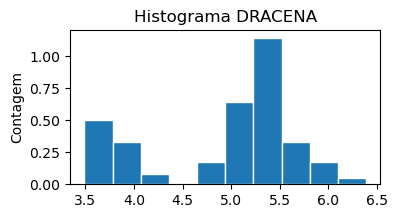


PRESIDENTE VENCESLAU
count    549.000000
mean       5.086412
std        0.852474
min        3.490000
25%        4.080000
50%        5.340000
75%        5.680000
max        6.790000
Name: Valor de Venda, dtype: float64


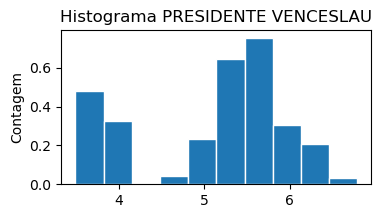


SANTA CRUZ DO RIO PARDO
count    505.000000
mean       5.199307
std        0.813264
min        3.390000
25%        4.890000
50%        5.390000
75%        5.690000
max        7.330000
Name: Valor de Venda, dtype: float64


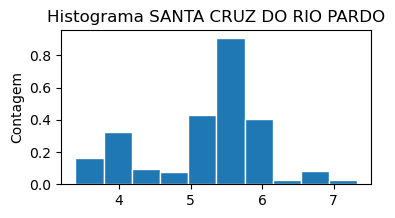


MANACAPURU
count    396.000000
mean       5.589949
std        0.830547
min        3.750000
25%        5.150000
50%        5.850000
75%        6.290000
max        6.930000
Name: Valor de Venda, dtype: float64


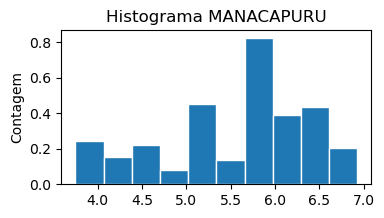


SABARA
count    633.000000
mean       4.985940
std        0.731633
min        3.490000
25%        4.570000
50%        5.190000
75%        5.540000
max        6.790000
Name: Valor de Venda, dtype: float64


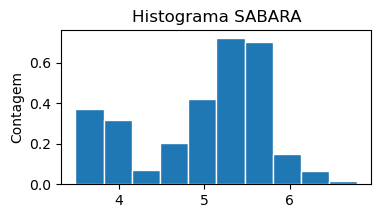


TRES CORACOES
count    704.000000
mean       5.496761
std        0.787009
min        3.850000
25%        5.090000
50%        5.700000
75%        6.090000
max        6.890000
Name: Valor de Venda, dtype: float64


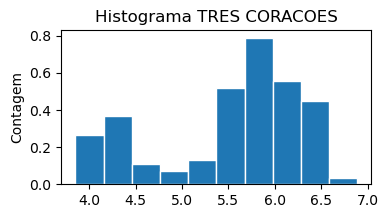


UNAI
count    410.00000
mean       5.49461
std        0.82452
min        3.79000
25%        5.17500
50%        5.79000
75%        6.09000
max        6.86000
Name: Valor de Venda, dtype: float64


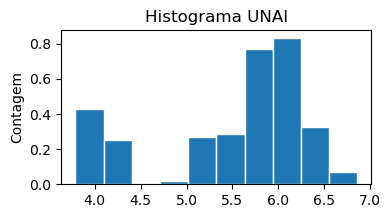


VIDEIRA
count    572.000000
mean       5.765455
std        0.389244
min        3.830000
25%        5.490000
50%        5.790000
75%        5.990000
max        6.790000
Name: Valor de Venda, dtype: float64


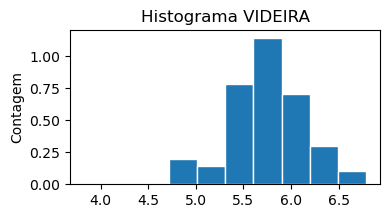


BEBEDOURO
count    419.000000
mean       4.902076
std        0.738156
min        3.470000
25%        4.550000
50%        5.190000
75%        5.420000
max        6.500000
Name: Valor de Venda, dtype: float64


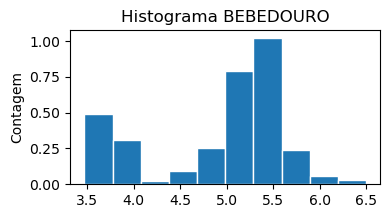


CALDAS NOVAS
count    477.000000
mean       5.217379
std        0.722159
min        3.790000
25%        4.850000
50%        5.450000
75%        5.870000
max        6.390000
Name: Valor de Venda, dtype: float64


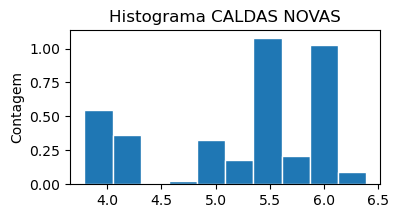


JANAUBA
count    500.000000
mean       5.352060
std        0.901224
min        3.560000
25%        5.050000
50%        5.610000
75%        5.970000
max        6.890000
Name: Valor de Venda, dtype: float64


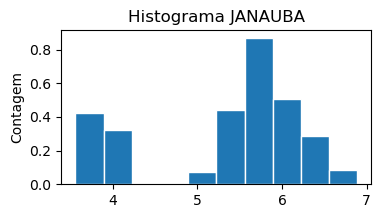


JANUARIA
count    528.000000
mean       5.122689
std        0.859005
min        3.390000
25%        4.790000
50%        5.350000
75%        5.712500
max        6.550000
Name: Valor de Venda, dtype: float64


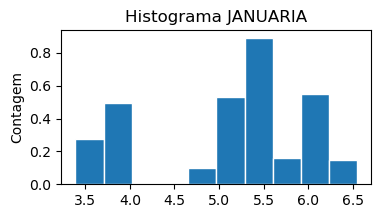


SOUSA
count    367.000000
mean       5.385804
std        0.588595
min        3.990000
25%        5.050000
50%        5.390000
75%        5.690000
max        6.990000
Name: Valor de Venda, dtype: float64


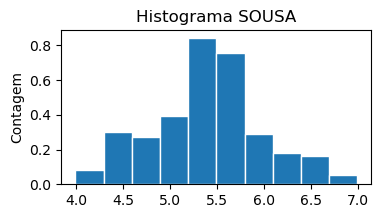


PIMENTA BUENO
count    631.000000
mean       5.919715
std        0.530042
min        4.090000
25%        5.660000
50%        6.140000
75%        6.230000
max        7.260000
Name: Valor de Venda, dtype: float64


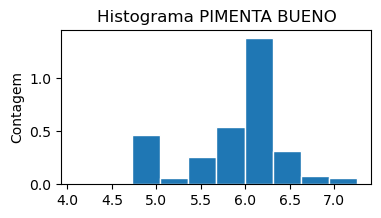


JOSE BONIFACIO
count    538.000000
mean       5.104796
std        0.931378
min        3.240000
25%        4.740000
50%        5.390000
75%        5.790000
max        6.790000
Name: Valor de Venda, dtype: float64


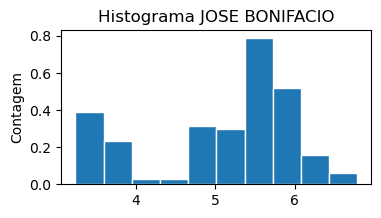


BOM DESPACHO
count    434.000000
mean       4.975806
std        0.676736
min        3.090000
25%        4.675000
50%        5.150000
75%        5.440000
max        6.290000
Name: Valor de Venda, dtype: float64


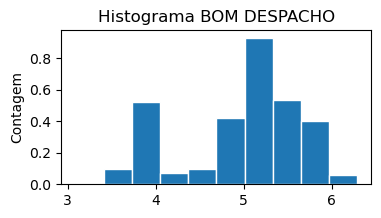


ITAITUBA
count    155.000000
mean       5.538000
std        0.438248
min        4.070000
25%        5.350000
50%        5.490000
75%        5.890000
max        6.290000
Name: Valor de Venda, dtype: float64


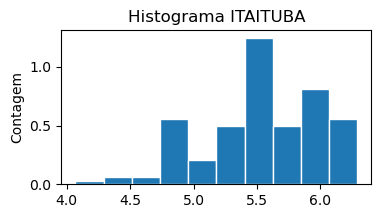


CACADOR
count    644.000000
mean       5.536180
std        0.439268
min        4.490000
25%        5.300000
50%        5.550000
75%        5.790000
max        6.870000
Name: Valor de Venda, dtype: float64


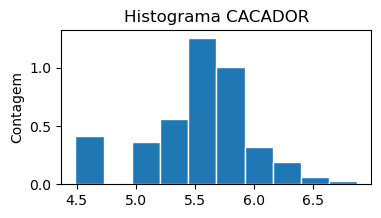


GUARUJA
count    807.000000
mean       5.268550
std        0.834101
min        3.490000
25%        4.670000
50%        5.390000
75%        5.890000
max        7.130000
Name: Valor de Venda, dtype: float64


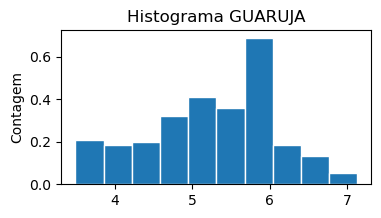


ITAPOLIS
count    592.000000
mean       4.871453
std        0.805765
min        3.290000
25%        3.990000
50%        5.090000
75%        5.390000
max        6.090000
Name: Valor de Venda, dtype: float64


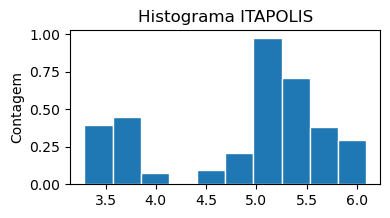


CAMETA
count    284.000000
mean       5.905528
std        0.461374
min        5.080000
25%        5.590000
50%        5.800000
75%        6.300000
max        7.190000
Name: Valor de Venda, dtype: float64


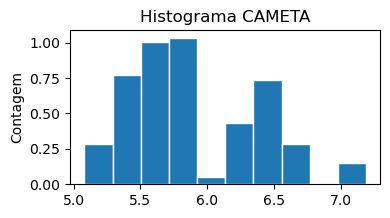


PINHEIRO
count    193.000000
mean       5.385492
std        0.382729
min        4.640000
25%        5.190000
50%        5.440000
75%        5.490000
max        7.190000
Name: Valor de Venda, dtype: float64


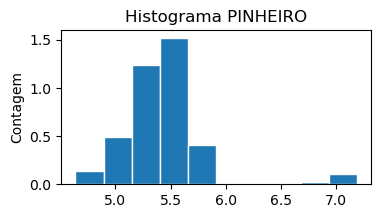


NOVA ANDRADINA
count    340.000000
mean       5.562176
std        0.690398
min        4.090000
25%        5.472500
50%        5.800000
75%        5.990000
max        6.470000
Name: Valor de Venda, dtype: float64


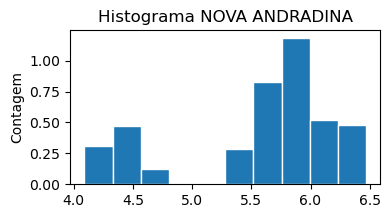


SALGUEIRO
count    292.000000
mean       5.634555
std        0.644649
min        4.370000
25%        4.990000
50%        5.890000
75%        6.180000
max        6.920000
Name: Valor de Venda, dtype: float64


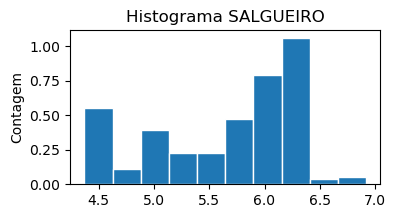


SANTO ANGELO
count    543.000000
mean       5.512541
std        0.425884
min        4.480000
25%        5.250000
50%        5.540000
75%        5.790000
max        6.490000
Name: Valor de Venda, dtype: float64


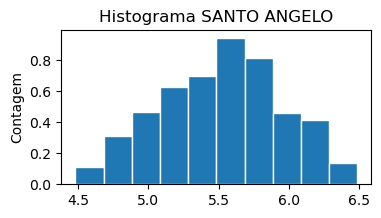


CRUZEIRO
count    545.000000
mean       5.164128
std        0.699340
min        3.550000
25%        4.920000
50%        5.370000
75%        5.570000
max        6.590000
Name: Valor de Venda, dtype: float64


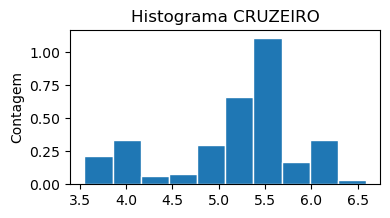


MOCOCA
count    451.000000
mean       5.088803
std        0.804198
min        3.090000
25%        4.590000
50%        5.390000
75%        5.690000
max        6.240000
Name: Valor de Venda, dtype: float64


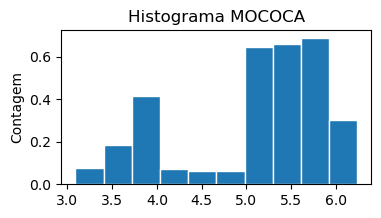


OLIMPIA
count    554.000000
mean       5.136119
std        0.818015
min        3.490000
25%        4.860000
50%        5.390000
75%        5.640000
max        6.780000
Name: Valor de Venda, dtype: float64


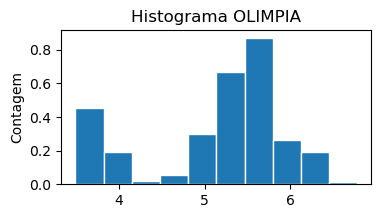


GARCA
count    592.000000
mean       4.857483
std        0.753098
min        3.190000
25%        4.680000
50%        4.990000
75%        5.390000
max        6.390000
Name: Valor de Venda, dtype: float64


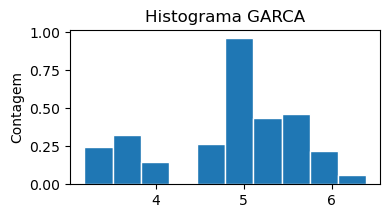


CRUZEIRO DO SUL
count    133.000000
mean       6.728571
std        0.575318
min        5.350000
25%        6.430000
50%        6.730000
75%        6.970000
max        7.590000
Name: Valor de Venda, dtype: float64


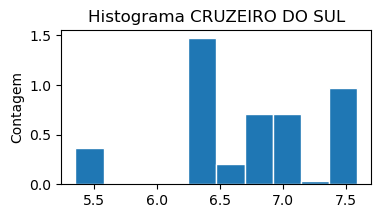


COLATINA
count    603.000000
mean       5.499950
std        0.510109
min        3.990000
25%        5.270000
50%        5.690000
75%        5.850000
max        6.350000
Name: Valor de Venda, dtype: float64


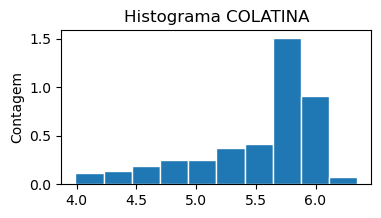


RIO LARGO
count    411.000000
mean       5.200803
std        0.597600
min        3.990000
25%        4.650000
50%        5.290000
75%        5.675000
max        6.490000
Name: Valor de Venda, dtype: float64


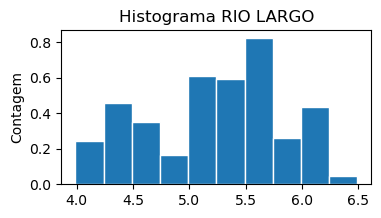


PRESIDENTE DUTRA
count    81.000000
mean      5.188272
std       0.461500
min       3.800000
25%       4.710000
50%       5.150000
75%       5.490000
max       6.180000
Name: Valor de Venda, dtype: float64


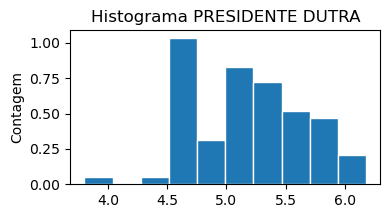


ITABIRA
count    364.000000
mean       5.617418
std        0.700524
min        4.040000
25%        5.490000
50%        5.850000
75%        6.090000
max        6.540000
Name: Valor de Venda, dtype: float64


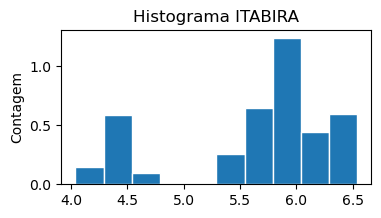


ABAETETUBA
count    171.000000
mean       5.606959
std        0.365298
min        4.800000
25%        5.350000
50%        5.450000
75%        5.870000
max        6.500000
Name: Valor de Venda, dtype: float64


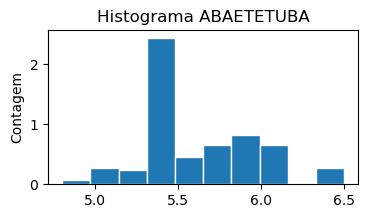


SAO FRANCISCO DE ITABAPOANA
count    457.000000
mean       5.466586
std        0.592736
min        4.330000
25%        4.790000
50%        5.680000
75%        5.950000
max        6.190000
Name: Valor de Venda, dtype: float64


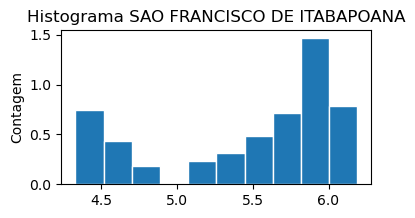


FORMOSA
count    708.000000
mean       5.268093
std        0.748299
min        3.750000
25%        4.490000
50%        5.490000
75%        5.790000
max        6.590000
Name: Valor de Venda, dtype: float64


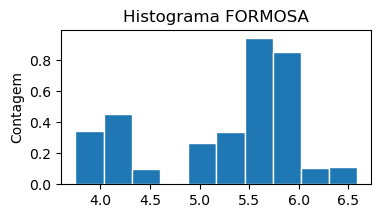


ITAJUBA
count    288.000000
mean       5.154861
std        0.705947
min        3.740000
25%        5.027500
50%        5.390000
75%        5.522500
max        6.490000
Name: Valor de Venda, dtype: float64


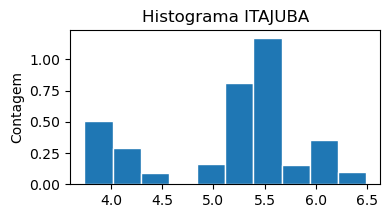


MACAE
count    657.000000
mean       5.570928
std        0.533704
min        4.490000
25%        4.990000
50%        5.790000
75%        5.970000
max        6.490000
Name: Valor de Venda, dtype: float64


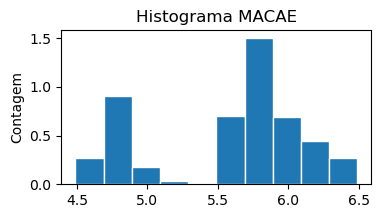


RESENDE
count    599.000000
mean       5.134007
std        0.623776
min        3.850000
25%        4.590000
50%        5.290000
75%        5.590000
max        6.650000
Name: Valor de Venda, dtype: float64


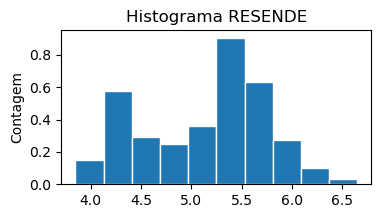


CONCORDIA
count    233.000000
mean       5.759485
std        0.401531
min        4.410000
25%        5.570000
50%        5.910000
75%        5.990000
max        6.490000
Name: Valor de Venda, dtype: float64


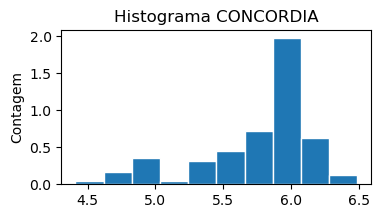


ADAMANTINA
count    419.000000
mean       4.809690
std        0.865047
min        3.170000
25%        3.775000
50%        5.190000
75%        5.390000
max        5.990000
Name: Valor de Venda, dtype: float64


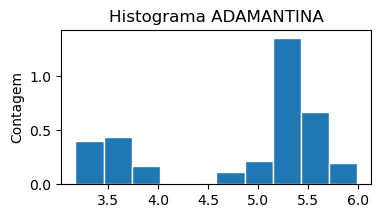


EUNAPOLIS
count    511.000000
mean       5.864325
std        0.675681
min        4.440000
25%        5.315000
50%        5.990000
75%        6.440000
max        6.880000
Name: Valor de Venda, dtype: float64


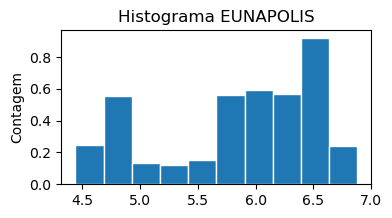


PORTO FERREIRA
count    388.000000
mean       5.090052
std        0.784623
min        3.490000
25%        4.530000
50%        5.290000
75%        5.690000
max        6.890000
Name: Valor de Venda, dtype: float64


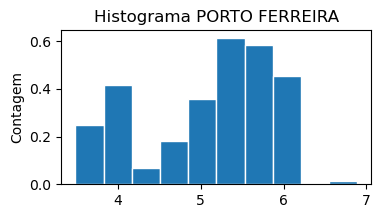


GUAIBA
count    58.000000
mean      5.426207
std       0.351687
min       4.890000
25%       5.190000
50%       5.440000
75%       5.590000
max       5.950000
Name: Valor de Venda, dtype: float64


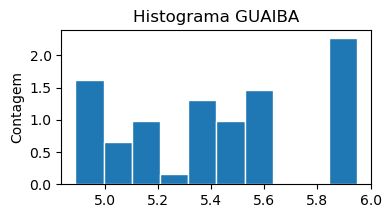


ITAPETININGA
count    287.000000
mean       5.272474
std        0.987163
min        3.220000
25%        4.420000
50%        5.590000
75%        5.990000
max        6.990000
Name: Valor de Venda, dtype: float64


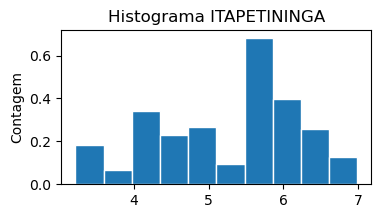


COXIM
count    427.000000
mean       5.191616
std        0.661426
min        3.850000
25%        4.870000
50%        5.450000
75%        5.640000
max        6.390000
Name: Valor de Venda, dtype: float64


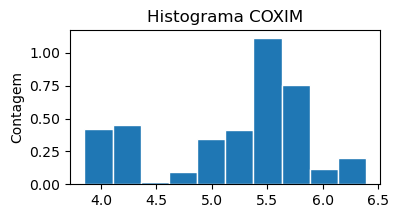


ARACRUZ
count    408.000000
mean       5.353627
std        0.494302
min        4.180000
25%        4.990000
50%        5.490000
75%        5.780000
max        6.290000
Name: Valor de Venda, dtype: float64


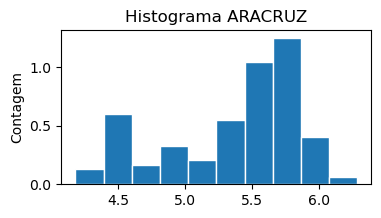


RIO GRANDE
count    278.000000
mean       5.496079
std        0.332758
min        4.540000
25%        5.290000
50%        5.490000
75%        5.777500
max        6.500000
Name: Valor de Venda, dtype: float64


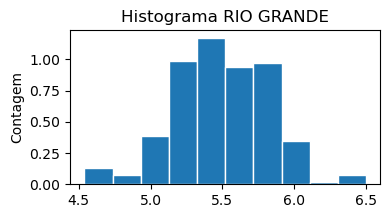


TORRES
count    386.000000
mean       5.241658
std        0.265248
min        4.490000
25%        4.990000
50%        5.290000
75%        5.457500
max        5.800000
Name: Valor de Venda, dtype: float64


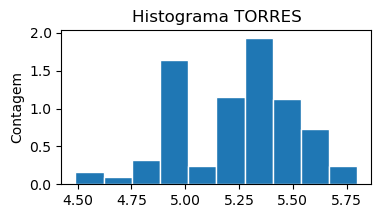


SANTANA
count    196.000000
mean       5.435969
std        0.417619
min        4.740000
25%        5.160000
50%        5.305000
75%        5.582500
max        6.990000
Name: Valor de Venda, dtype: float64


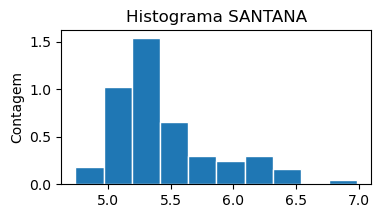


CRATEUS
count    379.000000
mean       5.683456
std        0.405300
min        4.750000
25%        5.350000
50%        5.780000
75%        5.985000
max        6.390000
Name: Valor de Venda, dtype: float64


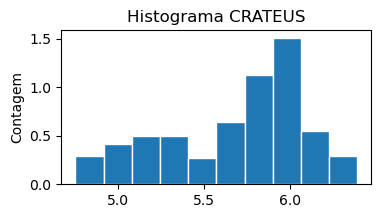


ALFENAS
count    470.000000
mean       4.977979
std        0.764010
min        3.480000
25%        4.272500
50%        5.090000
75%        5.490000
max        6.290000
Name: Valor de Venda, dtype: float64


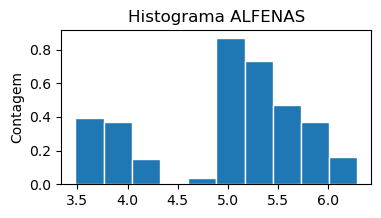


PIRIPIRI
count    364.000000
mean       5.454423
std        0.563173
min        4.190000
25%        5.150000
50%        5.590000
75%        5.790000
max        6.690000
Name: Valor de Venda, dtype: float64


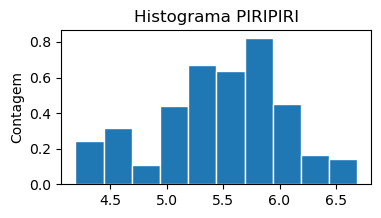


CRUZ ALTA
count    262.000000
mean       5.617443
std        0.285755
min        4.850000
25%        5.490000
50%        5.630000
75%        5.790000
max        6.360000
Name: Valor de Venda, dtype: float64


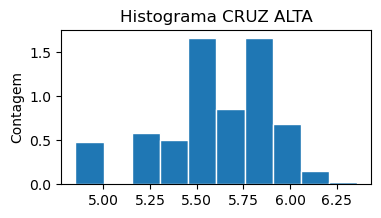


ARARANGUA
count    215.000000
mean       5.116651
std        0.295692
min        4.490000
25%        4.920000
50%        5.140000
75%        5.305000
max        5.690000
Name: Valor de Venda, dtype: float64


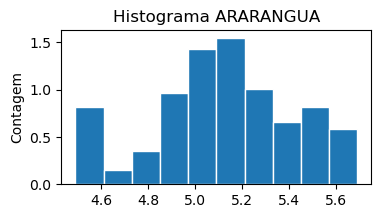


PAULO AFONSO
count    335.000000
mean       5.490806
std        0.517710
min        4.400000
25%        5.090000
50%        5.630000
75%        5.950000
max        6.270000
Name: Valor de Venda, dtype: float64


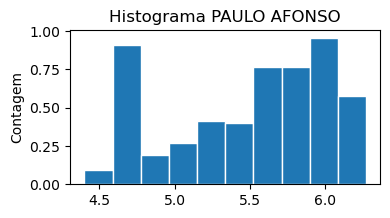


SORRISO
count    72.000000
mean      5.477222
std       1.036707
min       3.460000
25%       4.977500
50%       5.890000
75%       6.090000
max       6.690000
Name: Valor de Venda, dtype: float64


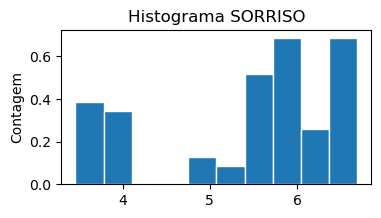


SANTO ANTONIO DA PLATINA
count    341.000000
mean       5.140587
std        0.619041
min        4.040000
25%        4.640000
50%        5.350000
75%        5.640000
max        5.990000
Name: Valor de Venda, dtype: float64


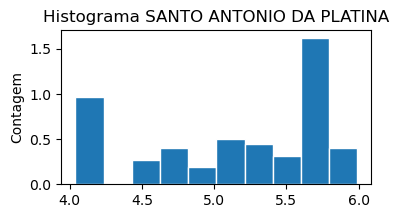


MAFRA
count    95.000000
mean      5.428737
std       0.452017
min       4.290000
25%       5.190000
50%       5.490000
75%       5.790000
max       6.240000
Name: Valor de Venda, dtype: float64


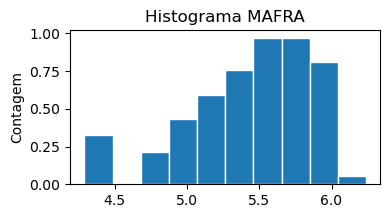


PORTO SEGURO
count    323.000000
mean       5.850464
std        0.654180
min        4.480000
25%        5.680000
50%        6.090000
75%        6.335000
max        6.990000
Name: Valor de Venda, dtype: float64


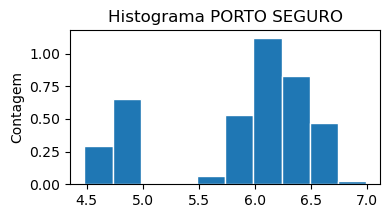


ICO
count    466.000000
mean       5.496760
std        0.548654
min        4.370000
25%        5.167500
50%        5.660000
75%        5.890000
max        6.590000
Name: Valor de Venda, dtype: float64


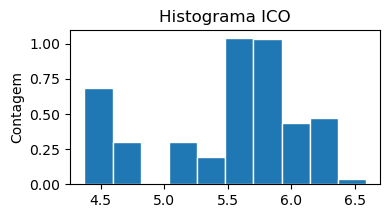


PONTA PORA
count    199.000000
mean       5.369849
std        0.703984
min        3.990000
25%        5.280000
50%        5.490000
75%        5.865000
max        6.760000
Name: Valor de Venda, dtype: float64


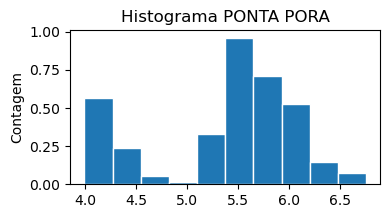


ALTA FLORESTA
count    218.000000
mean       5.565046
std        0.947242
min        3.640000
25%        5.587500
50%        5.890000
75%        6.090000
max        6.810000
Name: Valor de Venda, dtype: float64


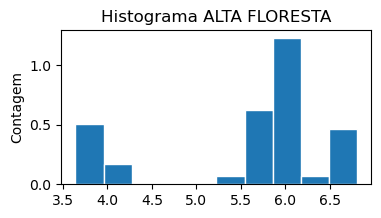


CORNELIO PROCOPIO
count    257.000000
mean       5.341946
std        0.766866
min        3.870000
25%        4.390000
50%        5.690000
75%        5.880000
max        7.090000
Name: Valor de Venda, dtype: float64


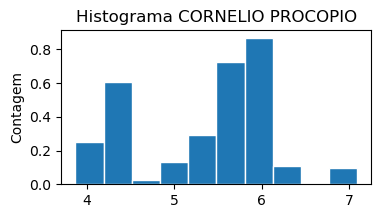


FRANCISCO BELTRAO
count    355.000000
mean       5.073718
std        0.580085
min        3.090000
25%        4.990000
50%        5.280000
75%        5.460000
max        5.950000
Name: Valor de Venda, dtype: float64


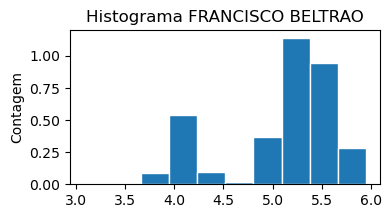


MARECHAL CANDIDO RONDON
count    151.000000
mean       4.991391
std        0.710328
min        3.490000
25%        4.870000
50%        5.190000
75%        5.490000
max        7.590000
Name: Valor de Venda, dtype: float64


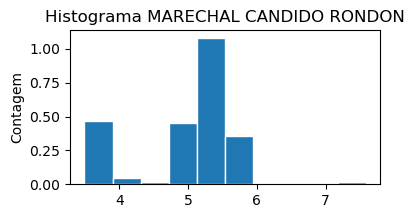


VACARIA
count    396.000000
mean       5.361944
std        0.371194
min        4.650000
25%        5.090000
50%        5.350000
75%        5.590000
max        6.590000
Name: Valor de Venda, dtype: float64


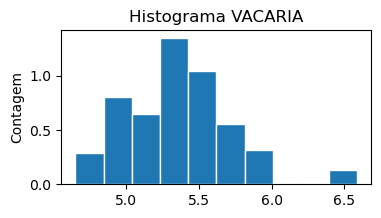


IGUATU
count    287.000000
mean       5.589756
std        0.511087
min        4.390000
25%        5.320000
50%        5.590000
75%        5.890000
max        6.590000
Name: Valor de Venda, dtype: float64


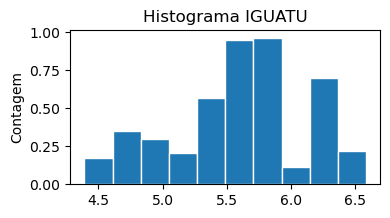


VICOSA
count    291.000000
mean       5.179347
std        0.676102
min        3.900000
25%        4.390000
50%        5.480000
75%        5.640000
max        6.230000
Name: Valor de Venda, dtype: float64


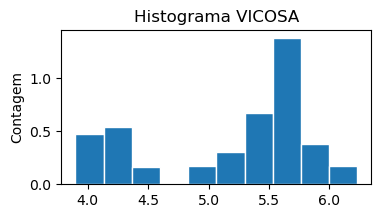


PARAGOMINAS
count    158.000000
mean       5.887975
std        0.438146
min        4.250000
25%        5.675000
50%        5.930000
75%        6.220000
max        6.640000
Name: Valor de Venda, dtype: float64


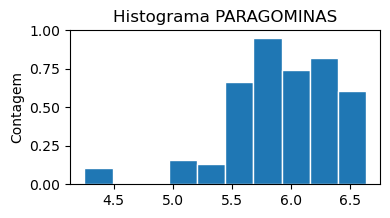


SANTANA DO LIVRAMENTO
count    348.000000
mean       5.795833
std        0.330865
min        4.590000
25%        5.512500
50%        5.890000
75%        5.990000
max        6.440000
Name: Valor de Venda, dtype: float64


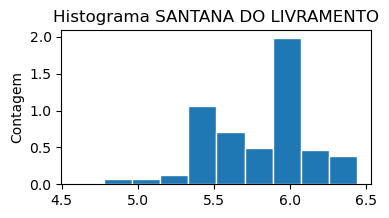


MONTE ALTO
count    249.000000
mean       4.940040
std        0.802878
min        3.450000
25%        4.090000
50%        5.190000
75%        5.490000
max        6.190000
Name: Valor de Venda, dtype: float64


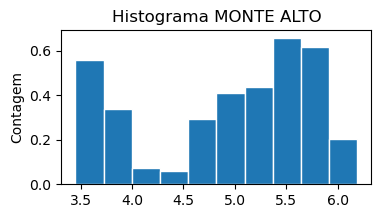


TEFE
count    130.000000
mean       6.987769
std        0.211676
min        6.490000
25%        6.890000
50%        6.990000
75%        7.000000
max        7.350000
Name: Valor de Venda, dtype: float64


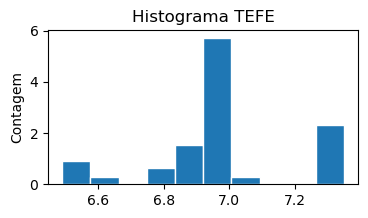


BRUMADO
count    635.000000
mean       5.148756
std        0.577439
min        3.990000
25%        4.790000
50%        5.160000
75%        5.590000
max        6.590000
Name: Valor de Venda, dtype: float64


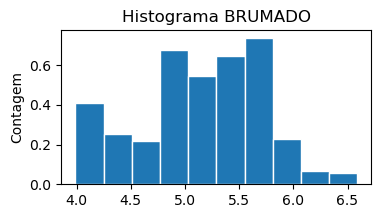


UBA
count    231.000000
mean       4.934502
std        0.671336
min        3.490000
25%        4.095000
50%        5.150000
75%        5.420000
max        5.990000
Name: Valor de Venda, dtype: float64


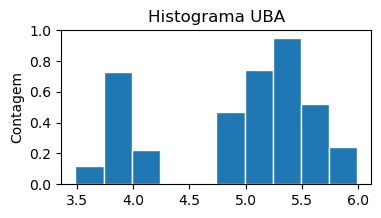


LAJEDO
count    276.000000
mean       4.782536
std        0.391626
min        3.990000
25%        4.390000
50%        4.970000
75%        5.090000
max        5.690000
Name: Valor de Venda, dtype: float64


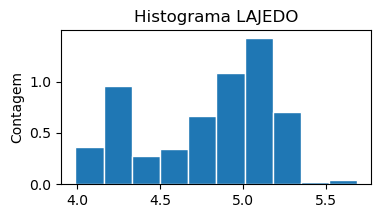


SAO ROQUE
count    302.000000
mean       4.994338
std        0.734087
min        3.190000
25%        4.315000
50%        5.190000
75%        5.480000
max        6.690000
Name: Valor de Venda, dtype: float64


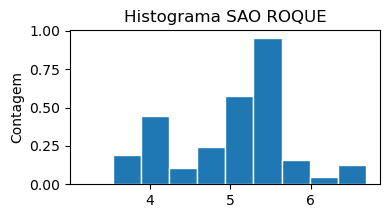


ASSIS CHATEAUBRIAND
count    81.000000
mean      4.878642
std       0.733348
min       3.450000
25%       4.190000
50%       5.090000
75%       5.430000
max       5.990000
Name: Valor de Venda, dtype: float64


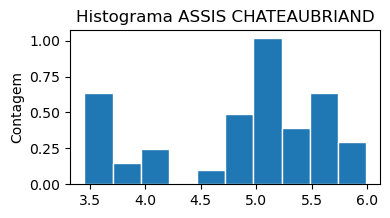


IPIRA
count    163.000000
mean       4.853926
std        0.524999
min        3.910000
25%        4.405000
50%        4.790000
75%        5.270000
max        6.950000
Name: Valor de Venda, dtype: float64


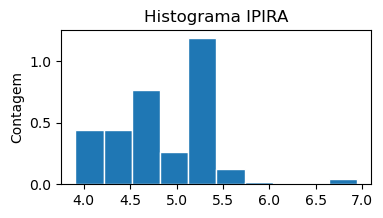


OURO PRETO
count    121.000000
mean       4.678347
std        0.690594
min        3.390000
25%        3.890000
50%        4.890000
75%        5.090000
max        5.990000
Name: Valor de Venda, dtype: float64


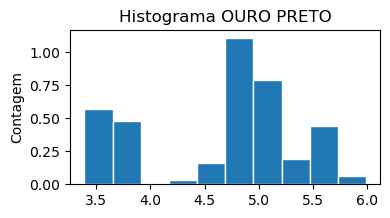


SAO LUIZ GONZAGA
count    238.000000
mean       5.374454
std        0.246199
min        4.990000
25%        5.140000
50%        5.440000
75%        5.550000
max        6.090000
Name: Valor de Venda, dtype: float64


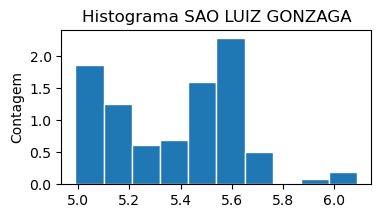


ALENQUER
count    131.000000
mean       6.523435
std        0.522092
min        5.750000
25%        6.100000
50%        6.650000
75%        6.920000
max        7.460000
Name: Valor de Venda, dtype: float64


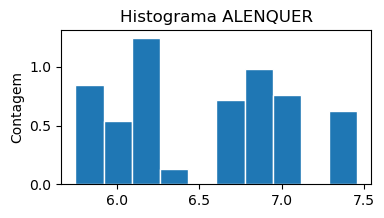


BARRA DO CORDA
count    153.000000
mean       5.386993
std        0.330811
min        4.750000
25%        5.150000
50%        5.450000
75%        5.590000
max        6.200000
Name: Valor de Venda, dtype: float64


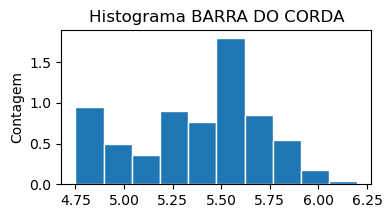


SENHOR DO BONFIM
count    272.000000
mean       5.327574
std        0.599374
min        4.270000
25%        4.840000
50%        5.390000
75%        5.750000
max        7.900000
Name: Valor de Venda, dtype: float64


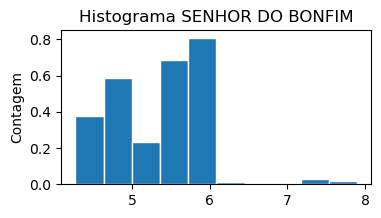


MAGE
count    92.000000
mean      5.048696
std       0.430219
min       3.990000
25%       4.690000
50%       5.190000
75%       5.390000
max       5.590000
Name: Valor de Venda, dtype: float64


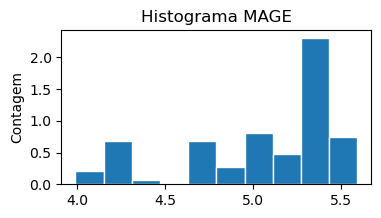


LIVRAMENTO DE NOSSA SENHORA
count    92.000000
mean      5.241196
std       0.588083
min       4.490000
25%       4.860000
50%       4.990000
75%       5.965000
max       6.100000
Name: Valor de Venda, dtype: float64


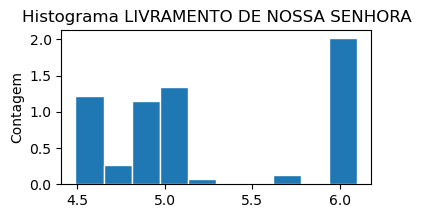


SAPUCAIA
count    39.000000
mean      5.004615
std       0.442147
min       4.270000
25%       4.720000
50%       4.900000
75%       5.270000
max       5.690000
Name: Valor de Venda, dtype: float64


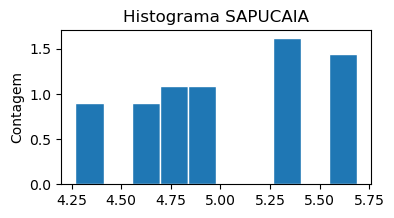


VERA CRUZ
count    9.000000
mean     5.036667
std      0.408534
min      4.590000
25%      4.590000
50%      4.990000
75%      5.530000
max      5.530000
Name: Valor de Venda, dtype: float64


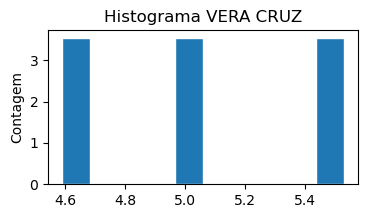


CONGONHAS
count    68.000000
mean      4.677206
std       0.606615
min       3.570000
25%       4.490000
50%       4.815000
75%       5.115000
max       5.690000
Name: Valor de Venda, dtype: float64


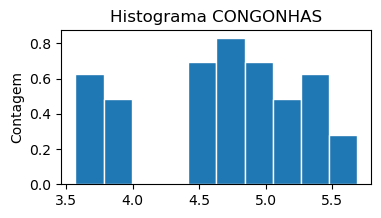


LEOPOLDINA
count    42.000000
mean      4.967857
std       0.618766
min       3.930000
25%       4.715000
50%       4.965000
75%       5.490000
max       5.850000
Name: Valor de Venda, dtype: float64


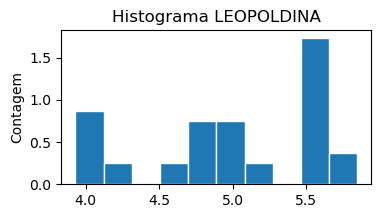


CAETITE
count    14.000000
mean      5.798571
std       0.760009
min       4.690000
25%       5.020000
50%       6.330000
75%       6.415000
max       6.440000
Name: Valor de Venda, dtype: float64


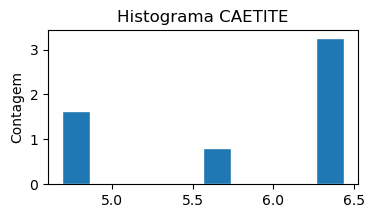

In [25]:
for cidade in lista_cidades:
    
    print(cidade)
    
    # Identifica o estado e realiza um describe da mesma
    
    infos_cidades = dados.loc[dados["Municipio"] == cidade]
    
    print(infos_cidades["Valor de Venda"].describe())
    
    # Cria um Histograma dos Preços 
    
    plt.figure(figsize=(4, 2))
    
    plt.hist(infos_cidades["Valor de Venda"], edgecolor='white', density = True)
    plt.title(f"Histograma {cidade}")
    plt.ylabel("Contagem")
    plt.show()
    
    print()